# Lead Score Case Study 
#### By Deepansh Jha And Chayanika Maiti

### Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. There are a lot of leads generated in the initial stage but only a few of them come out as paying customers. The company needs to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc.) in order to get a higher lead conversion. <br>

The problem is to help the comapany select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around **80%**.

#### Data
Leads.csv : The dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted.

In [1]:
# Importing required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# To ignore warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
#Just to make Big Data set easier to read.

pd.set_option("display.max_columns",None)
pd.set_option("display.max_colwidth",200)

## Importing And Understanding Dataset.

In [4]:
# importing dataset

leads_df = pd.read_csv('D://Upgrad/Lead Score Case Study/Lead Scoring Assignment/Leads.csv')

In [5]:
leads_df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [6]:
leads_df.size #Checking dataset size

341880

In [7]:
leads_df.shape #Checking dataset shape

(9240, 37)

In [8]:
leads_df.info() #checking info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [9]:
leads_df.describe() #checking spread of numerical variables

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

#### Total Null Percentage

In [10]:
percentage_null = np.round((leads_df.isnull().sum().sum()/leads_df.size)*100,2) # using np.round to take decimal upto 2 places.
print(percentage_null,'%')

#This is the total number of null values present in the dataset.

12.0 %


#### Checking Data Types

In [11]:
leads_df.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [12]:
leads_df.head() #sanity check

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [13]:
leads_df.isna().sum() # Number Of Null Values in DataSet with each columns

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

#### Checking Percentage Of Null Values In Different Columns

In [14]:
np.round((leads_df.isna().sum().sort_values(ascending=False)/len(leads_df))*100,2)

# Would Be dropping columns with null values more than 40% and would be imputing the columns with null values less than 40%. 

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

#### Checking Duplicates

In [15]:
leads_df[leads_df.duplicated()] # Their Are No Duplicates In The Dataset.

Empty DataFrame
Columns: [Prospect ID, Lead Number, Lead Origin, Lead Source, Do Not Email, Do Not Call, Converted, TotalVisits, Total Time Spent on Website, Page Views Per Visit, Last Activity, Country, Specialization, How did you hear about X Education, What is your current occupation, What matters most to you in choosing a course, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Tags, Lead Quality, Update me on Supply Chain Content, Get updates on DM Content, Lead Profile, City, Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Profile Score, I agree to pay the amount through cheque, A free copy of Mastering The Interview, Last Notable Activity]
Index: []

In [16]:
leads_df.head() #sanity check

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [17]:
leads_df[['TotalVisits','Page Views Per Visit','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score']].head()

#just having a look as some variables whose value seem a bit unsatisfactory.

TotalVisits  Page Views Per Visit Asymmetrique Activity Index  \
0          0.0                   0.0                   02.Medium   
1          5.0                   2.5                   02.Medium   
2          2.0                   2.0                   02.Medium   
3          1.0                   1.0                   02.Medium   
4          2.0                   1.0                   02.Medium   

  Asymmetrique Profile Index  Asymmetrique Activity Score  \
0                  02.Medium                         15.0   
1                  02.Medium                         15.0   
2                    01.High                         14.0   
3                    01.High                         13.0   
4                    01.High                         15.0   

   Asymmetrique Profile Score  
0                        15.0  
1                        15.0  
2                        20.0  
3                        17.0  
4                        18.0

## Data Cleaning

#### a) Handling Delimiters

In [18]:
# Handling the delimiters

leads_df['Asymmetrique Activity Index'] = leads_df["Asymmetrique Activity Index"].fillna('').str.split(".").str[1]
leads_df['Asymmetrique Profile Index'] = leads_df["Asymmetrique Profile Index"].fillna('').str.split(".").str[1]
leads_df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

#### b) Dropping unecessary columns. 

In [19]:
# Dropping columns that have only one unique values for all the leads

cols11 = []
for i in leads_df.columns:
    if leads_df[i].nunique() == 1:
        cols11.append(i)
leads_df.drop(cols11, axis = 1,inplace = True)
leads_df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Newspaper Article  \
0                       Better Career Prospects     No                No   
1                       Better Career Prospects     No                No   
2                       Better Career Prospects     No                No   
3                       Better Career Prospects     No                No   
4                       Better Career Prospects     No                No   

  X Education Forums Newspaper Digital Advertisement Through Recommendations  \
0                 No        No                    No                      No   
1                 No        No                    No                      No   
2                 No        No                    No                      No   
3                 No        No                    No                      No   
4                 No        No                    No                      No   

                                  Tags      Lead Quality    Lead Profile  \
0          Interested in other courses  Low in Relevance          Select   
1                              Ringing               NaN          Select   
2  Will revert after reading the email          Might be  Potential Lead   
3                              Ringing          Not Sure          Select   
4  Will revert after reading the email          Might be          Select   

     City Asymmetrique Activity Index Asymmetrique Profile Index  \
0  Select                      Medium                     Medium   
1  Select                      Medium                     Medium   
2  Mumbai                      Medium                       High   
3  Mumbai                      Medium                       High   
4  Mumbai                      Medium                       High   

   Asymmetrique Activity Score  Asymmetrique Profile Score  \
0                         15.0                        15.0   
1                         15.0             

In [20]:
# Dropping Prospect ID as these are just indicative of the ID number of the Contacted People.
# Lead Number & Prospect ID have all unique values. We will keep Lead Number for identification of the lead.

leads_df = leads_df.drop(['Prospect ID'], 1)
leads_df.head()

Lead Number              Lead Origin     Lead Source Do Not Email  \
0       660737                      API      Olark Chat           No   
1       660728                      API  Organic Search           No   
2       660727  Landing Page Submission  Direct Traffic           No   
3       660719  Landing Page Submission  Direct Traffic           No   
4       660681  Landing Page Submission          Google           No   

  Do Not Call  Converted  TotalVisits  Total Time Spent on Website  \
0          No          0          0.0                            0   
1          No          0          5.0                          674   
2          No          1          2.0                         1532   
3          No          0          1.0                          305   
4          No          1          2.0                         1428   

   Page Views Per Visit            Last Activity Country  \
0                   0.0  Page Visited on Website     NaN   
1                   2.5             Email Opened   India   
2                   2.0             Email Opened   India   
3                   1.0              Unreachable   India   
4                   1.0        Converted to Lead   India   

            Specialization How did you hear about X Education  \
0                   Select                             Select   
1                   Select                             Select   
2  Business Administration                             Select   
3    Media and Advertising                      Word Of Mouth   
4                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Newspaper Article  \
0                       Better Career Prospects     No                No   
1                       Better Career Prospects     No                No   
2                       Better Career Prospects     No                No   
3                       Better Career Prospects     No                No   
4                       Better Career Prospects     No                No   

  X Education Forums Newspaper Digital Advertisement Through Recommendations  \
0                 No        No                    No                      No   
1                 No        No                    No                      No   
2                 No        No                    No                      No   
3                 No        No                    No                      No   
4                 No        No                    No                      No   

                                  Tags      Lead Quality    Lead Profile  \
0          Interested in other courses  Low in Relevance          Select   
1                              Ringing               NaN          Select   
2  Will revert after reading the email          Might be  Potential Lead   
3                              Ringing          Not Sure          Select   
4  Will revert after reading the email          Might be          Select   

     City Asymmetrique Activity Index Asymmetrique Profile Index  \
0  Select                      Medium                     Medium   
1  Select                      Medium                     Medium   
2  Mumbai                      Medium                       High   
3  Mumbai                      Medium                       High   
4  Mumbai                      Medium                       High   

   Asymmetrique Activity Score  Asymmetrique Profile Score  \
0                         15.0                        15.0   
1                         15.0                        15.0   
2                         14.0                        20.0   
3                         13.0                        17.0   
4                         15.0                        18.0  

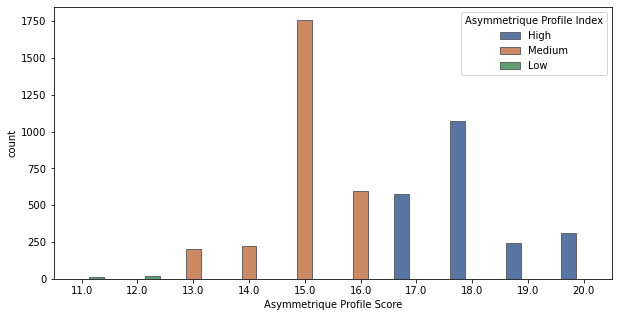

In [21]:
## Let us now observe the index and score assigned to each customer based on their activity and their profile

plt.figure(figsize = (10,5))
# sns.set(style="darkgrid")
sns.countplot(x = 'Asymmetrique Profile Score', hue ='Asymmetrique Profile Index',data = leads_df, palette="deep", edgecolor=".4",hue_order=['High','Medium','Low'])
plt.show()

<a> From the above plot we can observe following points:
 - Leads with `Asymmetrique Profile Score` of 11 & 12 fall in the category of ` Low` Asymmetrique Profile Index.
 - Leads with `Asymmetrique Profile Score` of 13,14,15 & 16 fall in the category of `Medium` Asymmetrique Profile Index.
 - Leads with `Asymmetrique Profile Score` of 17,18,19 & 20 fall in the category of `High` Asymmetrique Profile Index.

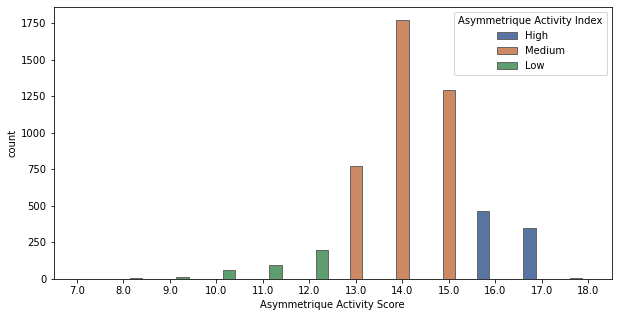

In [22]:
## Let us now observe the index and score assigned to each customer based on their activity and their profile
plt.figure(figsize = (10,5))
sns.countplot(x = 'Asymmetrique Activity Score', hue ='Asymmetrique Activity Index',data = leads_df, palette="deep", edgecolor=".4",hue_order=['High','Medium','Low'])
plt.show()

<a> From the above plot we can observe following points:
 - Lead with `Asymmetrique Activity Score` from 7 to 12 fall in the category of ` Low` Asymmetrique Activity Index.
 - Lead with `Asymmetrique Activity Score` of 13,14 & 15 fall in the category of `Medium` Asymmetrique Activity Index.
 - Lead with `Asymmetrique Activity Score` of 16,17 & 18 fall in the category of `High` Asymmetrique Activity Index.

<a> From the above plots, we observe that columns 'Asymmetrique Activity Score' & 'Asymmetrique Profile Score` are well described by two other columns -`Asymmetrique Activity Index' & 'Asymmetrique Profile Index' respectively. Hence these two columns can be removed from our dataset.

In [23]:
# Dropping 'Asymmetrique Activity Score' & 'Asymmetrique Profile Score'.
cols = ['Asymmetrique Activity Score','Asymmetrique Profile Score']
leads_df.drop(cols, axis = 1, inplace = True)

In [24]:
leads_df.shape

(9240, 29)

#### c) Dealing with uncertain values of the Leads.<br>

we can observe that our dataset has many columns who have values as 'Select'. This is because customer did not select any option from the list, hence it shows select It might be left unselected due to two reasons:<br>
 - The choice of options did not have sufficient choices and hence the ambiguity. So this can be imputed as `Others`
 - There is a mistake in data entry. It is preferred to impute them as Nan as imputing them with any other methods will disturb the data

In [25]:
# Columns having select values
leads_df.columns[leads_df.isin(['Select']).any()]

Index(['Specialization', 'How did you hear about X Education', 'Lead Profile',
       'City'],
      dtype='object')

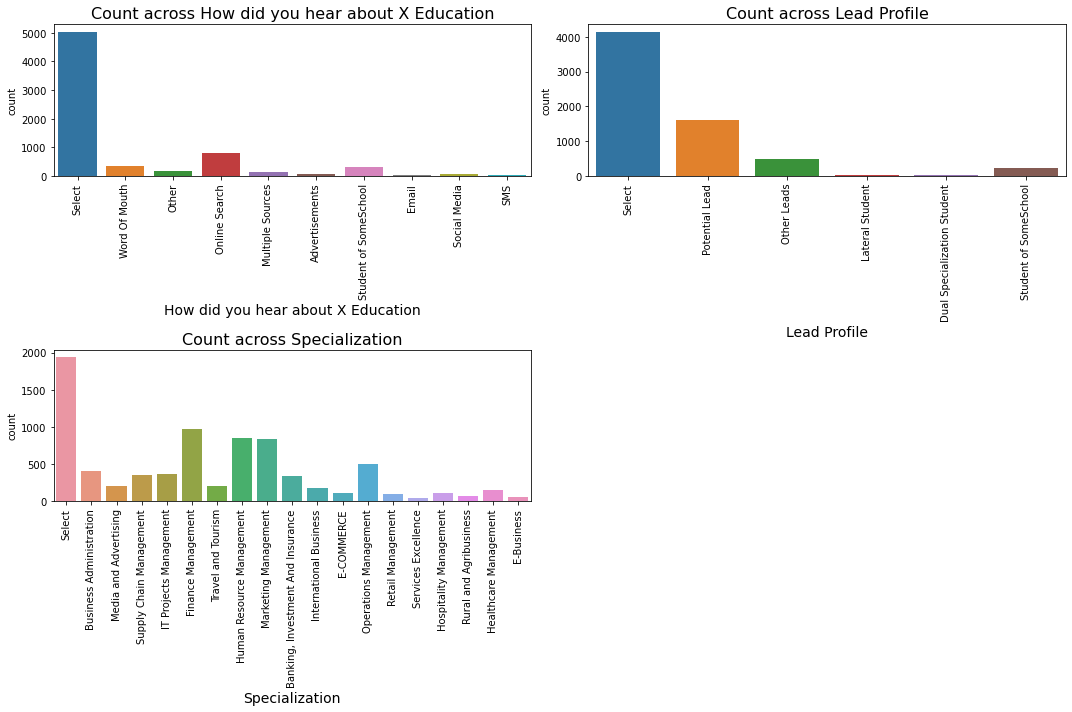

In [26]:
def countplot(x, fig):
    plt.subplot(2,2, fig)
    sns.countplot(leads_df[x])
    plt.title('Count across'+' '+ x, size = 16)
    plt.xlabel(x,size = 14)
    plt.xticks(rotation = 90)

plt.figure(figsize=(15,10))

countplot('How did you hear about X Education',1)
countplot('Lead Profile',2)
countplot('Specialization',3)

plt.tight_layout()

<a> These plots show the count of unique values in each of the three columns. We can observe that in all the three columns, `select` category has the maximum counts. Let us impute this select value for each colum.

In [27]:
# Consider Specialization column
leads_df['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [28]:
# Since we are unsure about specialization for many leads, imputing them wrongly will hamper the data. 
# Let us impute them with Nan values
leads_df['Specialization'] = leads_df['Specialization'].replace('Select', np.nan)

In [29]:
# Consider `How did you hear about X Education` column
leads_df['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [30]:
# Since we are unsure about their answer, Let us impute select value by `Nan`. 
# Imputing them with some other values can divert the focus of efforts to be employed for improving the business
leads_df['How did you hear about X Education'] = leads_df['How did you hear about X Education'].replace('Select',np.nan)

In [31]:
# Consider `City` column
leads_df['City'].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [32]:
# Since we are unsure about their city, Let us impute select value by nan.
# Any wrong imputation will lead to focussing on wrong cities,
leads_df['City']= leads_df['City'].replace('Select',np.nan)

In [33]:
# Consider `Lead Profile` column
leads_df['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [34]:
# Since we are unsure about their profile, Let us impute select value by nan.
# Any wrong imputation will lead to focussing on wrong leads,
leads_df['Lead Profile']= leads_df['Lead Profile'].replace('Select',np.nan)

#### d) Checking for Missing values

In [35]:
#checking for null values
leads_df.isnull().sum()

Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [36]:
#checking for percentage of missng values
round((leads_df.isnull().sum()/len(leads_df.index) *100),2).sort_values(ascending = False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Digital Advertisement                             0.00
A free copy of Mastering The Interview            0.00
Through Recommendations                           0.00
Lead Numbe

<A> We can observe that there are many missing values in the dataset. Columns with more than 50% missing data does not prove to be helpful in describing the lead. Hence lets drop them. We can handle the remaining missing values by either replacing them by mean or mode.

In [37]:
#Dropping the columns which have more than 40% missing values
leads_df.drop(leads_df.loc[:,list(round((leads_df.isnull().sum()/len(leads_df.index)*100),2)>40)].columns,axis =1, inplace = True)

In [38]:
#checking if there any rows which have more than 50% missing values
leads_df[leads_df.isnull().sum(axis = 1) > 14]

Empty DataFrame
Columns: [Lead Number, Lead Origin, Lead Source, Do Not Email, Do Not Call, Converted, TotalVisits, Total Time Spent on Website, Page Views Per Visit, Last Activity, Country, Specialization, What is your current occupation, What matters most to you in choosing a course, Search, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Tags, City, A free copy of Mastering The Interview, Last Notable Activity]
Index: []

In [39]:
leads_df.shape

(9240, 24)

#### d) Imputing Null Values

In [40]:
#checking for percentage of missng values
round((leads_df.isnull().sum()/len(leads_df.index) *100),2).sort_values(ascending = False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
X Education Forums                                0.00
A free copy of Mastering The Interview            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
Lead Number                                       0.00
Newspaper Article                                 0.00
Search                                            0.00
Lead Origi

Let us observe the columns having missing values

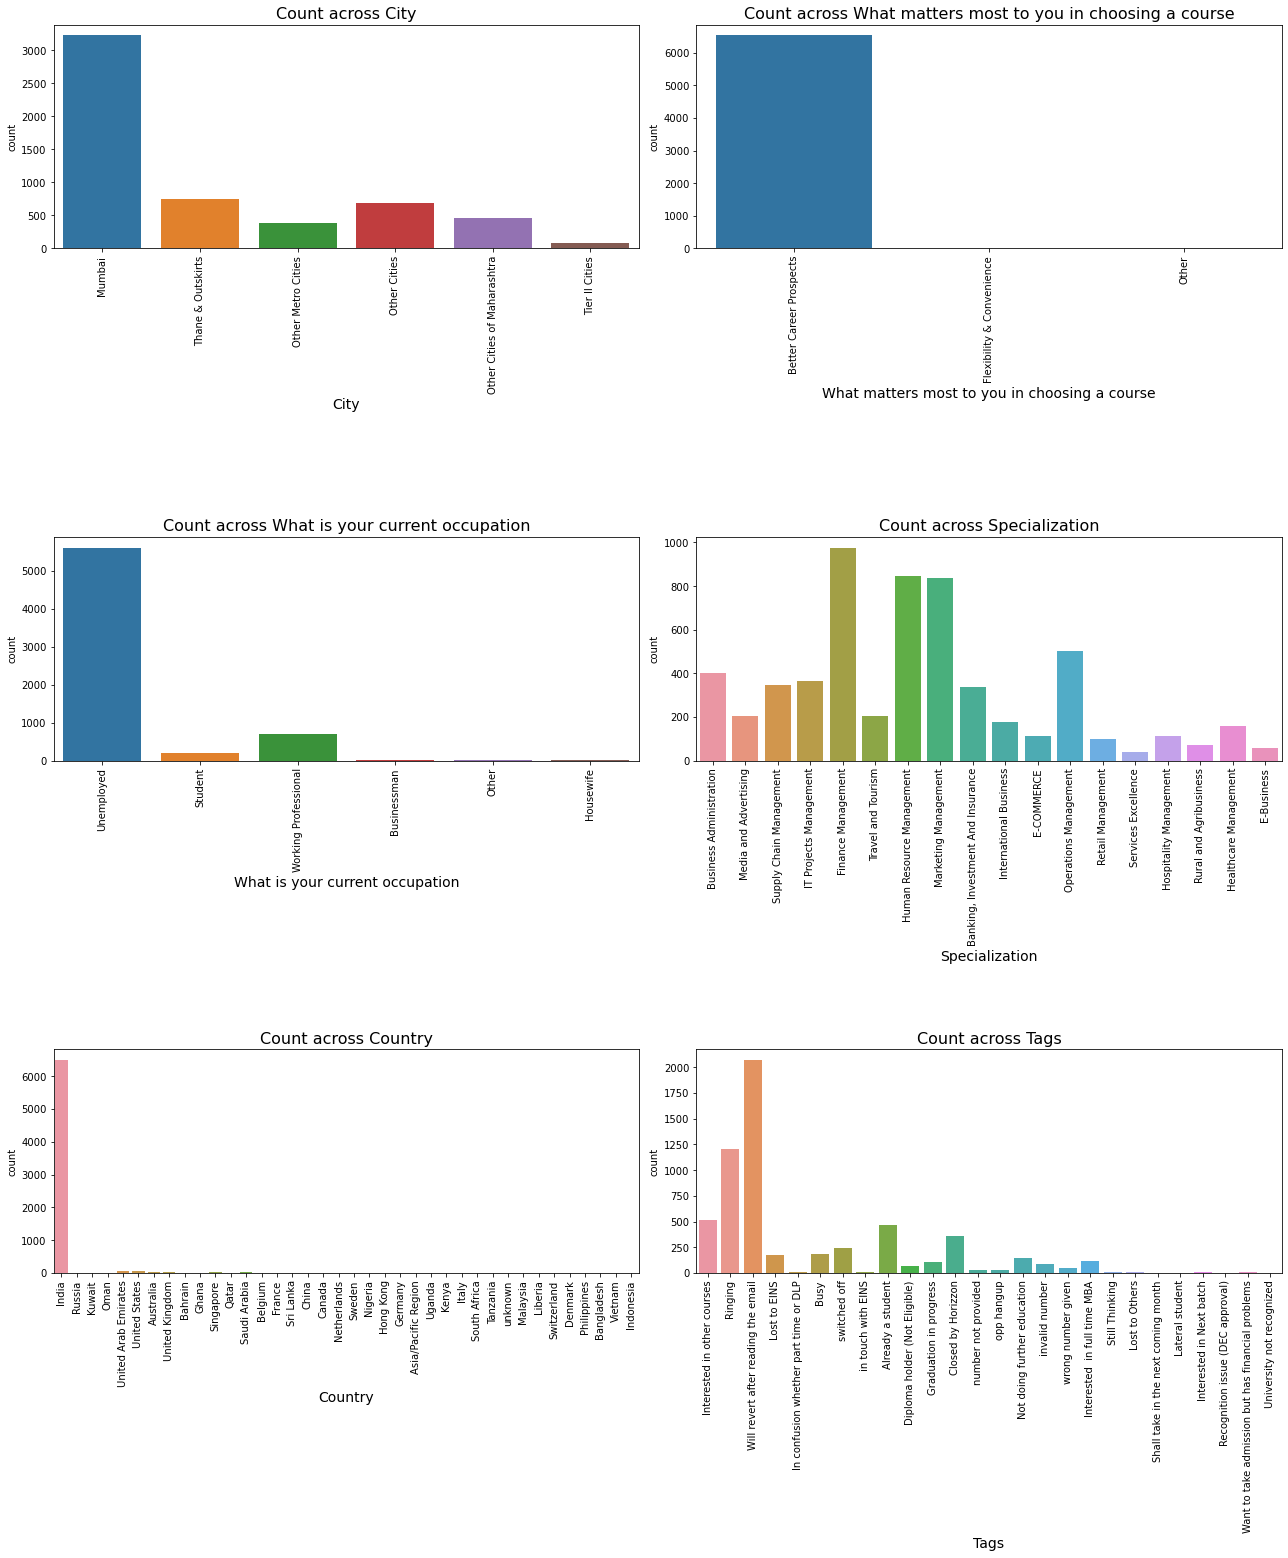

In [41]:
def countplot(x, fig):
    plt.subplot(4,2, fig)
    sns.countplot(leads_df[x])
    plt.title('Count across'+' '+ x, size = 16)
    plt.xlabel(x,size = 14)
    plt.xticks(rotation = 90)

plt.figure(figsize=(18,25))


countplot('City',1)
countplot('What matters most to you in choosing a course',2)
countplot('What is your current occupation',3)
countplot('Specialization',4)
countplot('Country',5)
countplot('Tags',6)

plt.tight_layout()

###  <a>**Inferences:**
<a>
        
 - From the count plot of `city`, we can see that maximum leads are from `Mumbai`.
 - For Most of the leads, having `better career prospects`, matters the most while choosing a course. 
 - The current occupation of maximum number of leads is `Unemployed`.

 - Majority of the leads are `specialised` in `Finance Management`, followed by Human Resource & Manufacturing Management. <br>
 - Majority of the leads are from `India.`
 - Majority of the leads were the customers tagged as -`will revert after reading the email`.

In [42]:
#checking value counts of "City" column
leads_df['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [43]:
print("Before Imputing City Column, No. of Missing values is :",leads_df['City'].isnull().sum())
leads_df['City'].fillna(leads_df.City.mode()[0],inplace = True)
print("After Imputing City Column, No. of Missing values is :",leads_df['City'].isnull().sum())

Before Imputing City Column, No. of Missing values is : 3669
After Imputing City Column, No. of Missing values is : 0


In [44]:
#checking value counts of "What matters most to you in choosing a course" column
leads_df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [45]:
#Since most of the customers choose Better Career Prospects assuming the Na's to be the same, Hence choosing mode imputation
print("Before Imputing 'What matters most to you in choosing a course' Column, No. of Missing values is :",leads_df['What matters most to you in choosing a course'].isnull().sum())
leads_df['What matters most to you in choosing a course'].fillna(leads_df['What matters most to you in choosing a course'].mode()[0],inplace = True)
print("After Imputing 'What matters most to you in choosing a course' Column, No. of Missing values is :",leads_df['What matters most to you in choosing a course'].isnull().sum())

Before Imputing 'What matters most to you in choosing a course' Column, No. of Missing values is : 2709
After Imputing 'What matters most to you in choosing a course' Column, No. of Missing values is : 0


In [46]:
#checking value counts of "What is your current occupation" column
leads_df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [47]:
#Since the occupation is not known and the data is related to the educational course, 
#hence we can assume that most of them will be unemployed. Using mode imputation for this
print("Before Imputing 'What is your current occupation' Column, No. of Missing values is :",leads_df['What is your current occupation'].isnull().sum())
leads_df['What is your current occupation'].fillna(leads_df['What is your current occupation'].mode()[0],inplace = True)

print("After Imputing 'What is your current occupation' Column, No. of Missing values is :",leads_df['What is your current occupation'].isnull().sum())

Before Imputing 'What is your current occupation' Column, No. of Missing values is : 2690
After Imputing 'What is your current occupation' Column, No. of Missing values is : 0


In [48]:
leads_df['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

#### Let us club similar specialisations in one category to gain more meaningful insights.

In [49]:
# Let us club all the management specialisations in one category called 'Management'
manage = ['Finance Management','Human Resource Management','Marketing Management','Operations Management','IT Projects Management','Supply Chain Management','Healthcare Management','Hospitality Management','Retail Management']
leads_df['Specialization'] = leads_df['Specialization'].replace(manage,'Management')

# Let us replace E-Commerce specialisations by'E-Business' as E-Commerce is a subset of E-business.
leads_df['Specialization'] = leads_df['Specialization'].replace('E-COMMERCE','E-Business')

In [50]:
leads_df['Specialization'].value_counts(dropna=False)

Management                           4253
NaN                                  3380
Business Administration               403
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
E-Business                            169
Rural and Agribusiness                 73
Services Excellence                    40
Name: Specialization, dtype: int64

In [51]:
#Since specialization is something when the data was collected was not present on the option 
#and we cannot blindly impute it with mode. Hence we decide to make a new category as others  based on our intution
print("Before Imputing Specialization Column, No. of Missing values is :",leads_df['Specialization'].isnull().sum())
leads_df['Specialization'] = leads_df['Specialization'].replace(np.nan,'Others')
print("After Imputing Specialization Column, No. of Missing values is :",leads_df['Specialization'].isnull().sum())

Before Imputing Specialization Column, No. of Missing values is : 3380
After Imputing Specialization Column, No. of Missing values is : 0


In [52]:
#Lets us now see null percentage
round((leads_df.isnull().sum()/len(leads_df.index) *100),2).sort_values(ascending = False).head()

Tags                    36.29
Country                 26.63
TotalVisits              1.48
Page Views Per Visit     1.48
Last Activity            1.11
dtype: float64

In [53]:
leads_df['Tags'].value_counts(dropna = False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [54]:
#Tags assigned to customers indicate the current status of the lead.
# Let us club all the Similar tags in one category 

leads_df['Tags'] = leads_df['Tags'].replace(['invalid number','wrong number given','number not provided'],'No phone number')
leads_df['Tags'] = leads_df['Tags'].replace(['Lost to EINS','Lost to Others'],'Lost')
leads_df['Tags'] = leads_df['Tags'].replace(['Ringing','switched off','Busy','opp hangup'],'Try Calling again')
leads_df['Tags'] = leads_df['Tags'].replace(['Not doing further education','Diploma holder (Not Eligible)'],'Not Interested/Not Eligible')

In [55]:
# Let us observe the the value counts again
leads_df['Tags'].value_counts(dropna = False)

NaN                                                  3353
Will revert after reading the email                  2072
Try Calling again                                    1662
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
Not Interested/Not Eligible                           208
Lost                                                  182
No phone number                                       157
Interested  in full time MBA                          117
Graduation in progress                                111
in touch with EINS                                     12
Still Thinking                                          6
Want to take admission but has financial problems       6
In confusion whether part time or DLP                   5
Interested in Next batch                                5
Lateral student                                         3
Shall take in 

In [56]:
#Tags assigned to customers indicating the current status of the lead.
#we can assume that the customer might not be interested and he will revert after wards and we can simply impute this column by mode
print("Before Imputing Tags Column, No. of Missing values is :",leads_df['Tags'].isnull().sum())
leads_df['Tags'] = leads_df['Tags'].replace(np.nan,'Others')
print("After Imputing Tags Column, No. of Missing values is :",leads_df['Tags'].isnull().sum())

Before Imputing Tags Column, No. of Missing values is : 3353
After Imputing Tags Column, No. of Missing values is : 0


In [57]:
# Let us now treat the country column
leads_df['Country'].value_counts(dropna = False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [58]:
#choosing mode imputation for country
print("Before Imputing Country Column, No. of Missing values is :",leads_df['Country'].isnull().sum())
leads_df['Country'].fillna(leads_df.Country.mode()[0],inplace = True)
print("After Imputing Country Column, No. of Missing values is :",leads_df['Country'].isnull().sum())

Before Imputing Country Column, No. of Missing values is : 2461
After Imputing Country Column, No. of Missing values is : 0


In [59]:
#Lets us now again check the null percentage
round((leads_df.isnull().sum()/len(leads_df.index) *100),2).sort_values(ascending = False).head()

TotalVisits             1.48
Page Views Per Visit    1.48
Last Activity           1.11
Lead Source             0.39
Lead Number             0.00
dtype: float64

In [60]:
leads_df['Last Activity'].value_counts(dropna = False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [61]:
# Let us categorize all the last activities that have very few counts into one category as `Others`
# Since their count is very low, clubbing them together in one category would be more helpful in analysis
combine =['Had a Phone Conversation','Approached upfront','View in browser link Clicked','Email Marked Spam','Email Received','Resubscribed to emails','Visited Booth in Tradeshow','Unreachable','Unsubscribed']
leads_df['Last Activity'] = leads_df['Last Activity'].replace(combine,'others')


In [62]:
leads_df['Last Activity'].value_counts(dropna = False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
others                        205
Form Submitted on Website     116
NaN                           103
Name: Last Activity, dtype: int64

In [63]:
# imputation for 'Last Activity' column
print("Before Imputing Last ACtivity Column, No. of Missing values is :",leads_df['Last Activity'].isnull().sum())
leads_df['Last Activity'] = leads_df['Last Activity'].replace(np.nan,'Others')
print("After Imputing Last Activity Column, No. of Missing values is :",leads_df['Last Activity'].isnull().sum())

Before Imputing Last ACtivity Column, No. of Missing values is : 103
After Imputing Last Activity Column, No. of Missing values is : 0


In [64]:
#Lets us now again check the null percentage
round((leads_df.isnull().sum()/len(leads_df.index) *100),2).sort_values(ascending = False).head()

TotalVisits             1.48
Page Views Per Visit    1.48
Lead Source             0.39
Lead Number             0.00
Search                  0.00
dtype: float64

In [65]:
# Let us check the column Lead Source
leads_df['Lead Source'].value_counts(dropna = False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [66]:
# let us club similar categories to avoid confusion
leads_df['Lead Source'] = leads_df['Lead Source'].replace('google','Google')
leads_df['Lead Source'] = leads_df['Lead Source'].replace('Facebook','Social Media')
# Let us Combine Sources that have less value counts to simplify our analysis.
less_count = ['bing','Click2call','Live Chat','Press_Release','welearnblog_Home','blog','testone','NC_EDM','youtubechannel','Pay per Click Ads','WeLearn']
leads_df['Lead Source'] = leads_df['Lead Source'].replace(less_count,'Others')


In [67]:
# imputation for 'Lead source' column
print("Before Imputing Lead Source Column, No. of Missing values is :",leads_df['Lead Source'].isnull().sum())
leads_df['Lead Source'] = leads_df['Lead Source'].replace(np.nan,'Others')
print("After Imputing Lead Source Column, No. of Missing values is :",leads_df['Lead Source'].isnull().sum())

Before Imputing Lead Source Column, No. of Missing values is : 36
After Imputing Lead Source Column, No. of Missing values is : 0


In [68]:
#Lets us now again check the null percentage
round((leads_df.isnull().sum()/len(leads_df.index) *100),2).sort_values(ascending = False).head()

TotalVisits                                      1.48
Page Views Per Visit                             1.48
Lead Number                                      0.00
What matters most to you in choosing a course    0.00
A free copy of Mastering The Interview           0.00
dtype: float64

In [69]:
#We choose to drop these rows as they are very less nearly 2%
print("Shape of Data Before Dropping rows ",leads_df.shape)

a = leads_df.shape[0]
leads_df.dropna(inplace = True)
print("shape of Data After Dropping rows ",leads_df.shape)

print("Percentage of Information Loss", round(100*((a-leads_df.shape[0])/a),2))

Shape of Data Before Dropping rows  (9240, 24)
shape of Data After Dropping rows  (9103, 24)
Percentage of Information Loss 1.48


In [70]:
#checking missing values in leftover columns/

round(100*(leads_df.isnull().sum()/len(leads_df.index)),2)

Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

<a> There are no missing values in our dataframe.

#### f) Data type correction

In [71]:
# We obsserve that TotalVisits have wrong data type
leads_df['TotalVisits'] = leads_df['TotalVisits'].astype('int64')

#### g) Further Simplification of analysis

In [72]:
#checking value counts of last Notable Activity
leads_df['Last Notable Activity'].value_counts()

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [73]:
# Let us combine together all those categories whose have very few last notable ativity count

low_count = ['Email Bounced','Unsubscribed','Unreachable','Had a Phone Conversation','Email Marked Spam','Form Submitted on Website',
'Resubscribed to emails','Approached upfront','Email Received','View in browser link Clicked']
leads_df['Last Notable Activity'] = leads_df['Last Notable Activity'].replace(low_count,'Other')


In [74]:
#checking value counts of last Notable Activity
leads_df['Last Notable Activity'].value_counts()

Modified                   3270
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other                       160
Name: Last Notable Activity, dtype: int64

In [75]:
leads_df['TotalVisits'].median() #checking median for 'TotalVisits'

3.0

In [76]:
leads_df['Page Views Per Visit'].median() #checking median for 'Page Views Per Visit'

2.0

In [77]:
leads_df['TotalVisits'].fillna(3.0, inplace=True)
leads_df['Page Views Per Visit'].fillna(2.0, inplace=True)

#imputing values with median of the given column

In [78]:
np.round((leads_df.isna().sum().sort_values(ascending=False)/len(leads_df))*100,2) #Checking Null Values

#Null Values Have Been Fixed

Lead Number                                      0.0
Lead Origin                                      0.0
A free copy of Mastering The Interview           0.0
City                                             0.0
Tags                                             0.0
Through Recommendations                          0.0
Digital Advertisement                            0.0
Newspaper                                        0.0
X Education Forums                               0.0
Newspaper Article                                0.0
Search                                           0.0
What matters most to you in choosing a course    0.0
What is your current occupation                  0.0
Specialization                                   0.0
Country                                          0.0
Last Activity                                    0.0
Page Views Per Visit                             0.0
Total Time Spent on Website                      0.0
TotalVisits                                   

In [79]:
print(np.round((leads_df.isnull().sum().sum()/leads_df.size)*100,2),'%')

#Null Values Fixed, 0.0 % Total Null Values.

0.0 %


In [80]:
leads_df.head()

# TotalVisits can be seen in float but should be in int datatype.

Lead Number              Lead Origin     Lead Source Do Not Email  \
0       660737                      API      Olark Chat           No   
1       660728                      API  Organic Search           No   
2       660727  Landing Page Submission  Direct Traffic           No   
3       660719  Landing Page Submission  Direct Traffic           No   
4       660681  Landing Page Submission          Google           No   

  Do Not Call  Converted  TotalVisits  Total Time Spent on Website  \
0          No          0            0                            0   
1          No          0            5                          674   
2          No          1            2                         1532   
3          No          0            1                          305   
4          No          1            2                         1428   

   Page Views Per Visit            Last Activity Country  \
0                   0.0  Page Visited on Website   India   
1                   2.5             Email Opened   India   
2                   2.0             Email Opened   India   
3                   1.0                   others   India   
4                   1.0        Converted to Lead   India   

            Specialization What is your current occupation  \
0                   Others                      Unemployed   
1                   Others                      Unemployed   
2  Business Administration                         Student   
3    Media and Advertising                      Unemployed   
4                   Others                      Unemployed   

  What matters most to you in choosing a course Search Newspaper Article  \
0                       Better Career Prospects     No                No   
1                       Better Career Prospects     No                No   
2                       Better Career Prospects     No                No   
3                       Better Career Prospects     No                No   
4                       Better Career Prospects     No                No   

  X Education Forums Newspaper Digital Advertisement Through Recommendations  \
0                 No        No                    No                      No   
1                 No        No                    No                      No   
2                 No        No                    No                      No   
3                 No        No                    No                      No   
4                 No        No                    No                      No   

                                  Tags    City  \
0          Interested in other courses  Mumbai   
1                    Try Calling again  Mumbai   
2  Will revert after reading the email  Mumbai   
3                    Try Calling again  Mumbai   
4  Will revert after reading the email  Mumbai   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified

In [81]:
leads_df.TotalVisits.value_counts() #Should Be in 'int' datatype.

0      2189
2      1680
3      1306
4      1120
5       783
6       466
1       395
7       309
8       224
9       164
10      114
11       86
13       48
12       45
14       36
16       21
15       18
17       16
18       15
20       12
19        9
21        6
23        6
24        5
25        5
27        5
22        3
29        2
28        2
26        2
141       1
55        1
30        1
43        1
74        1
41        1
54        1
115       1
251       1
32        1
42        1
Name: TotalVisits, dtype: int64

In [82]:
leads_df['TotalVisits'] = leads_df['TotalVisits'].astype('int64')

# Changed 'TotalVisits' datatype to 'int'

In [83]:
leads_df.head() #sanity check

Lead Number              Lead Origin     Lead Source Do Not Email  \
0       660737                      API      Olark Chat           No   
1       660728                      API  Organic Search           No   
2       660727  Landing Page Submission  Direct Traffic           No   
3       660719  Landing Page Submission  Direct Traffic           No   
4       660681  Landing Page Submission          Google           No   

  Do Not Call  Converted  TotalVisits  Total Time Spent on Website  \
0          No          0            0                            0   
1          No          0            5                          674   
2          No          1            2                         1532   
3          No          0            1                          305   
4          No          1            2                         1428   

   Page Views Per Visit            Last Activity Country  \
0                   0.0  Page Visited on Website   India   
1                   2.5             Email Opened   India   
2                   2.0             Email Opened   India   
3                   1.0                   others   India   
4                   1.0        Converted to Lead   India   

            Specialization What is your current occupation  \
0                   Others                      Unemployed   
1                   Others                      Unemployed   
2  Business Administration                         Student   
3    Media and Advertising                      Unemployed   
4                   Others                      Unemployed   

  What matters most to you in choosing a course Search Newspaper Article  \
0                       Better Career Prospects     No                No   
1                       Better Career Prospects     No                No   
2                       Better Career Prospects     No                No   
3                       Better Career Prospects     No                No   
4                       Better Career Prospects     No                No   

  X Education Forums Newspaper Digital Advertisement Through Recommendations  \
0                 No        No                    No                      No   
1                 No        No                    No                      No   
2                 No        No                    No                      No   
3                 No        No                    No                      No   
4                 No        No                    No                      No   

                                  Tags    City  \
0          Interested in other courses  Mumbai   
1                    Try Calling again  Mumbai   
2  Will revert after reading the email  Mumbai   
3                    Try Calling again  Mumbai   
4  Will revert after reading the email  Mumbai   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified

#### All Numerical Columns

In [84]:
numerical_values_col=(leads_df.dtypes == 'int64') | (leads_df.dtypes == int) | (leads_df.dtypes == float) | (leads_df.dtypes == 'float64')
numerical_var = numerical_values_col[numerical_values_col].index
print(f'Number Of Columns Having Numerical Values Are {numerical_values_col[numerical_values_col].count()}')
list(numerical_var)

#these are all continuous variables in the dataset

Number Of Columns Having Numerical Values Are 5


['Lead Number',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

#### All Categorical Columns

In [85]:
object_values_col=(leads_df.dtypes == 'object') | (leads_df.dtypes =='category')
print(f'Number Of Columns Having Categorical Values Are {object_values_col[object_values_col].count()}')
categorical_Val = object_values_col[object_values_col].index
list(categorical_Val)

#these are all categorical variables in the dataset

Number Of Columns Having Categorical Values Are 19


['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Tags',
 'City',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

### Data Visualization and Outlier Treatment

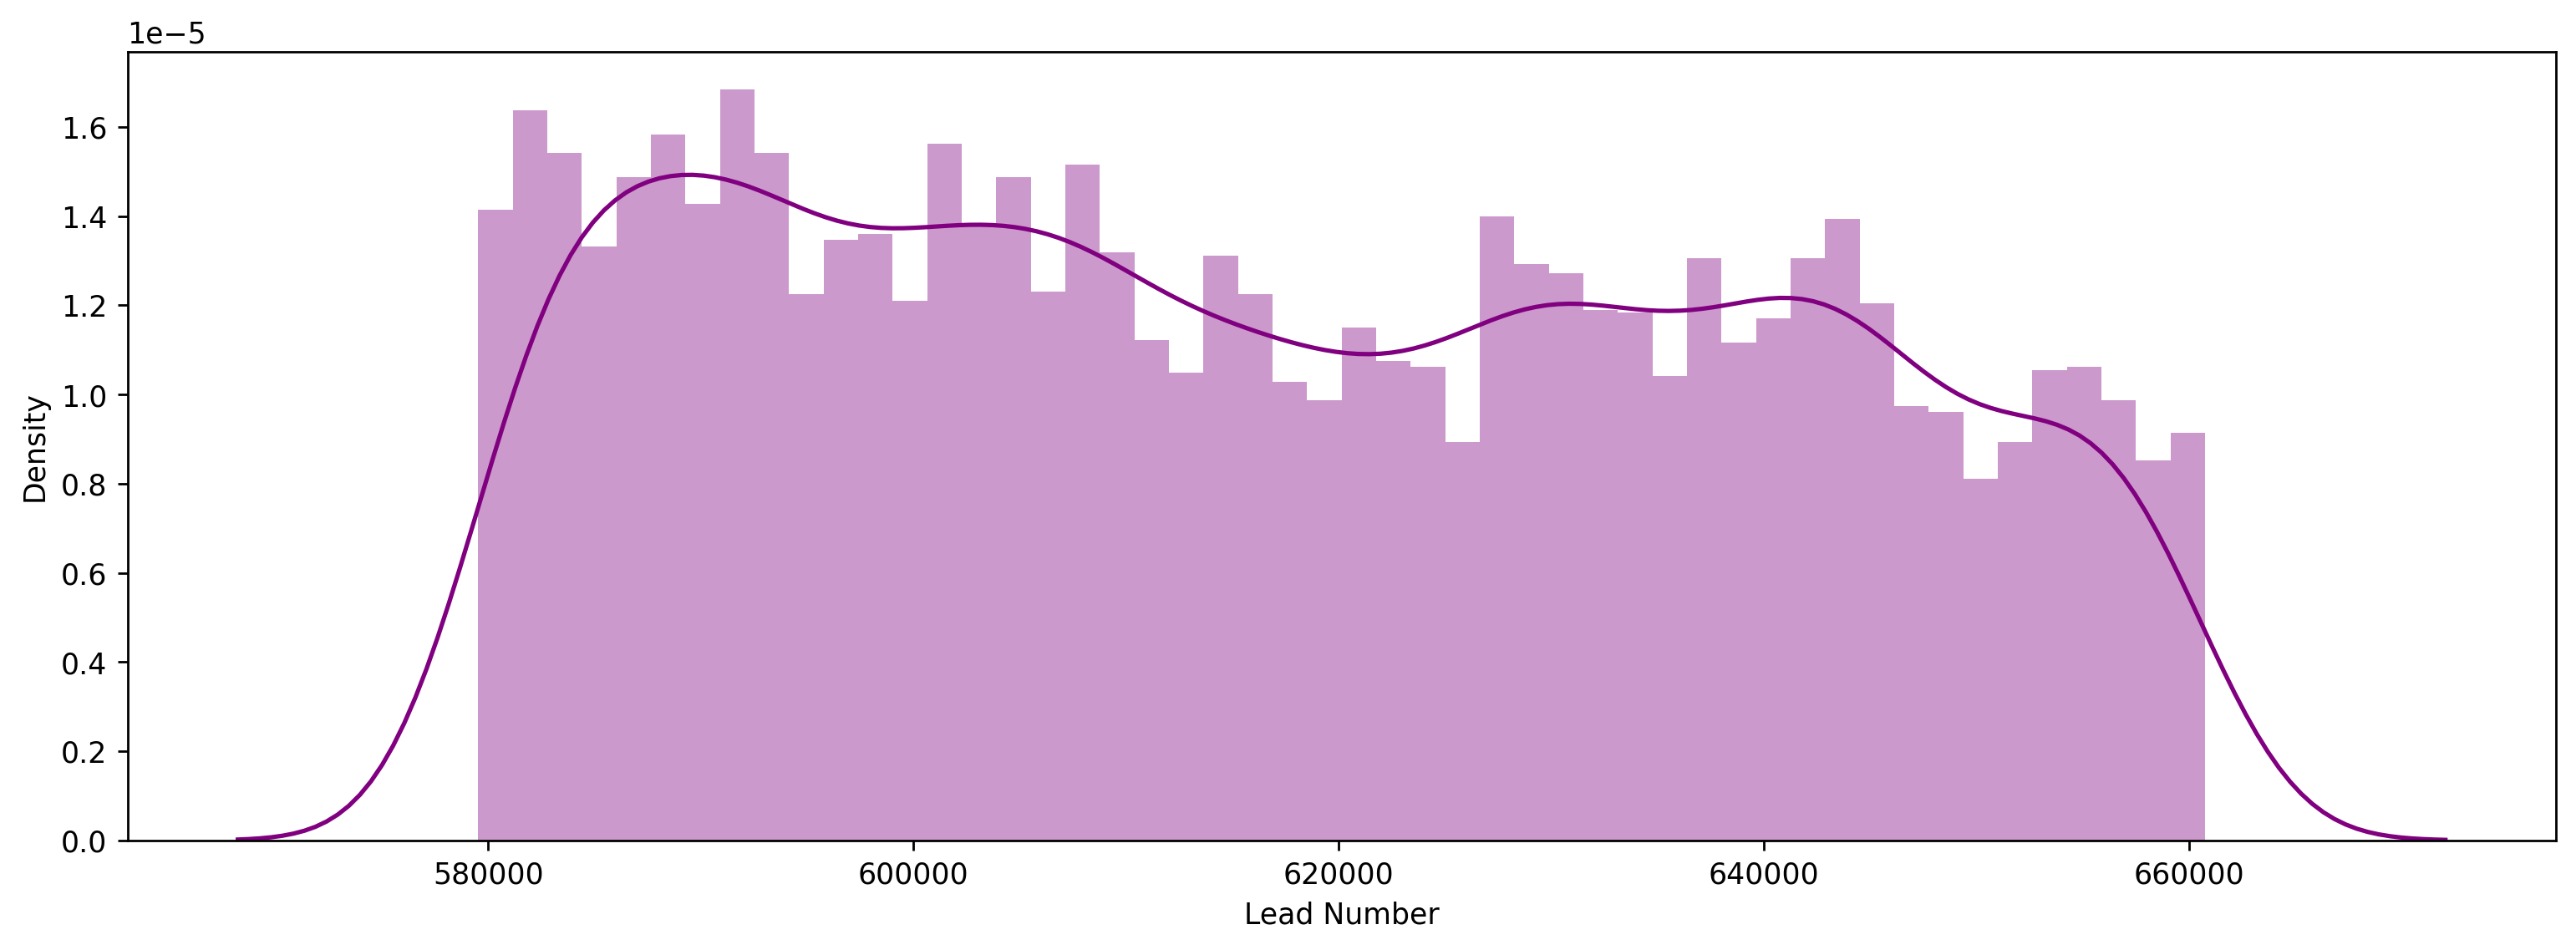

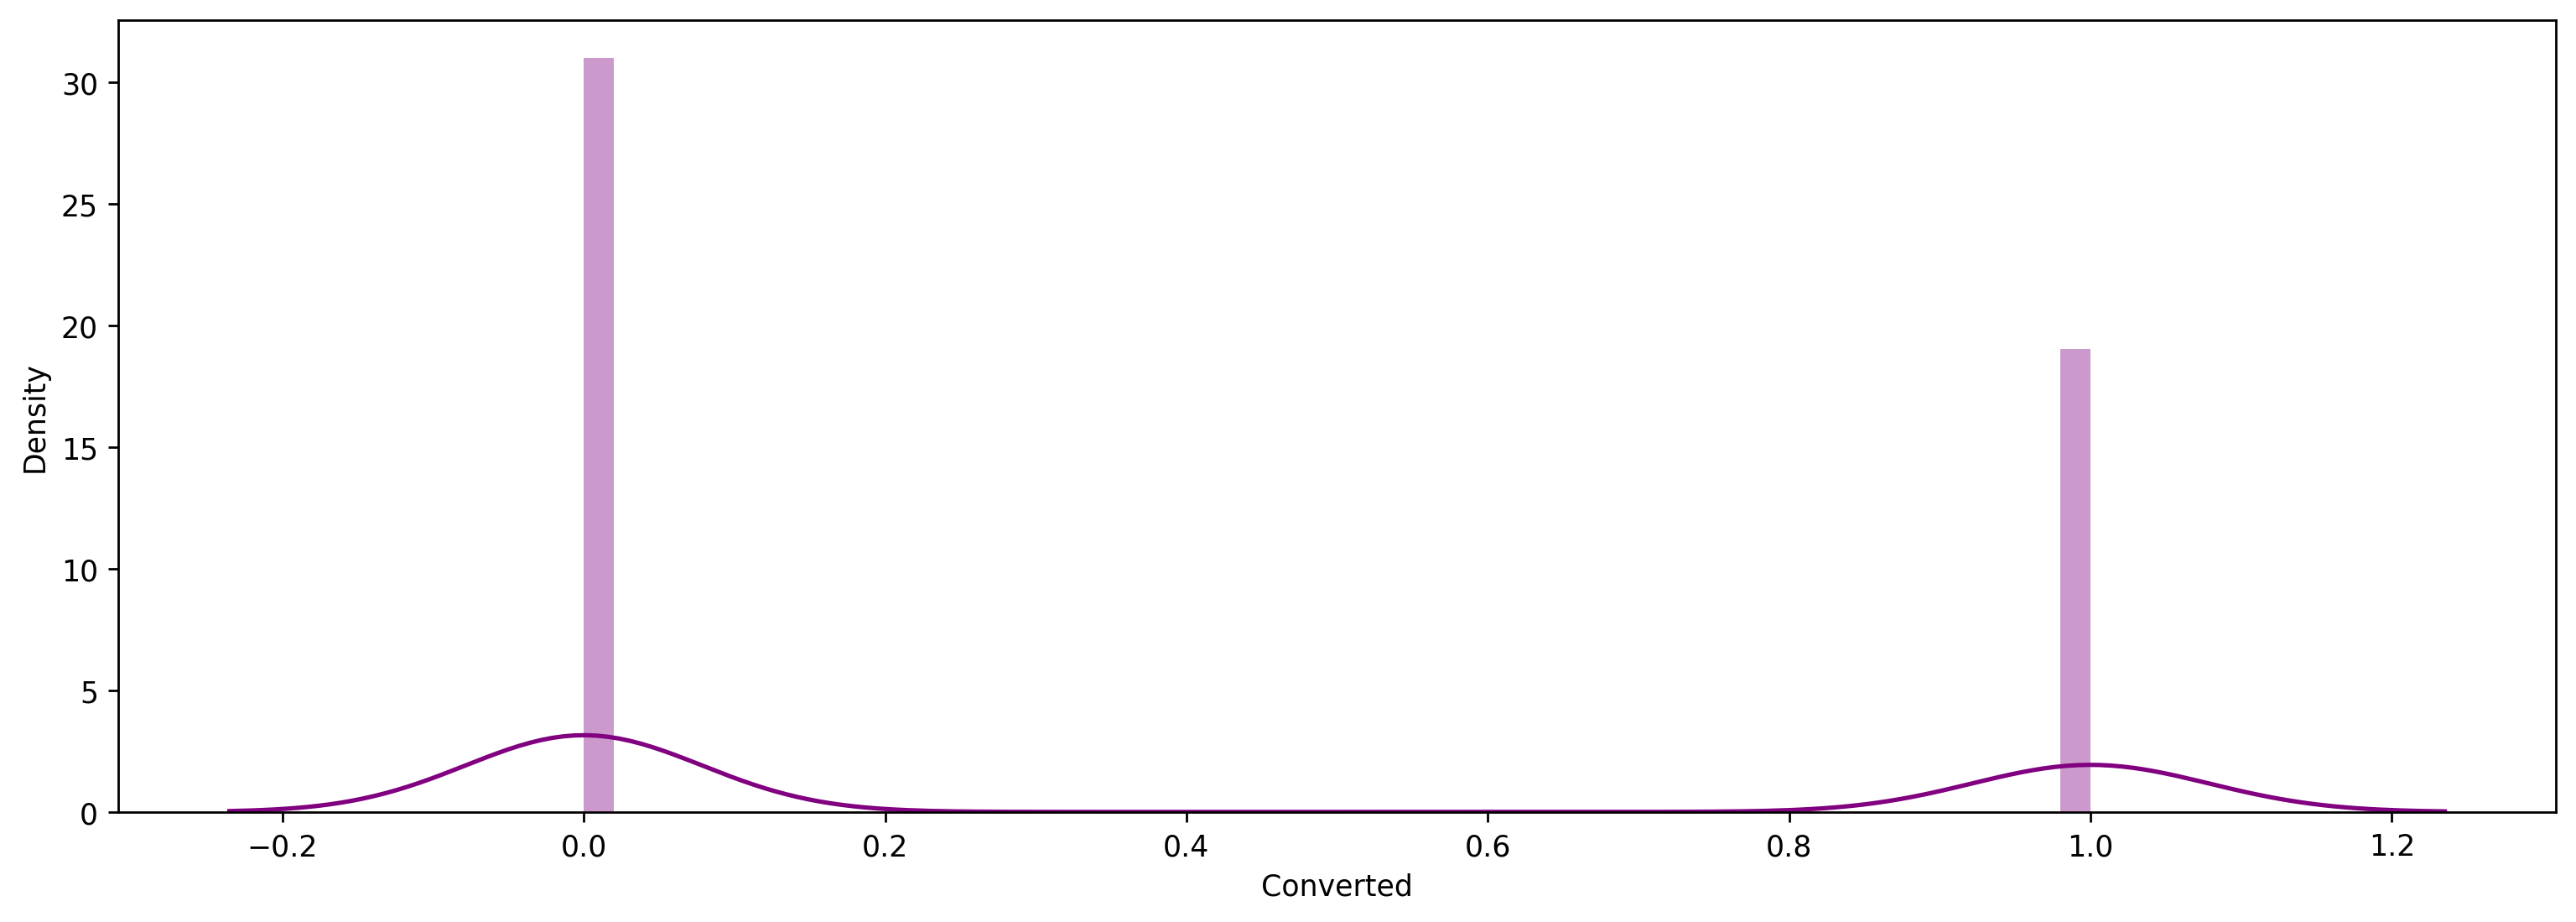

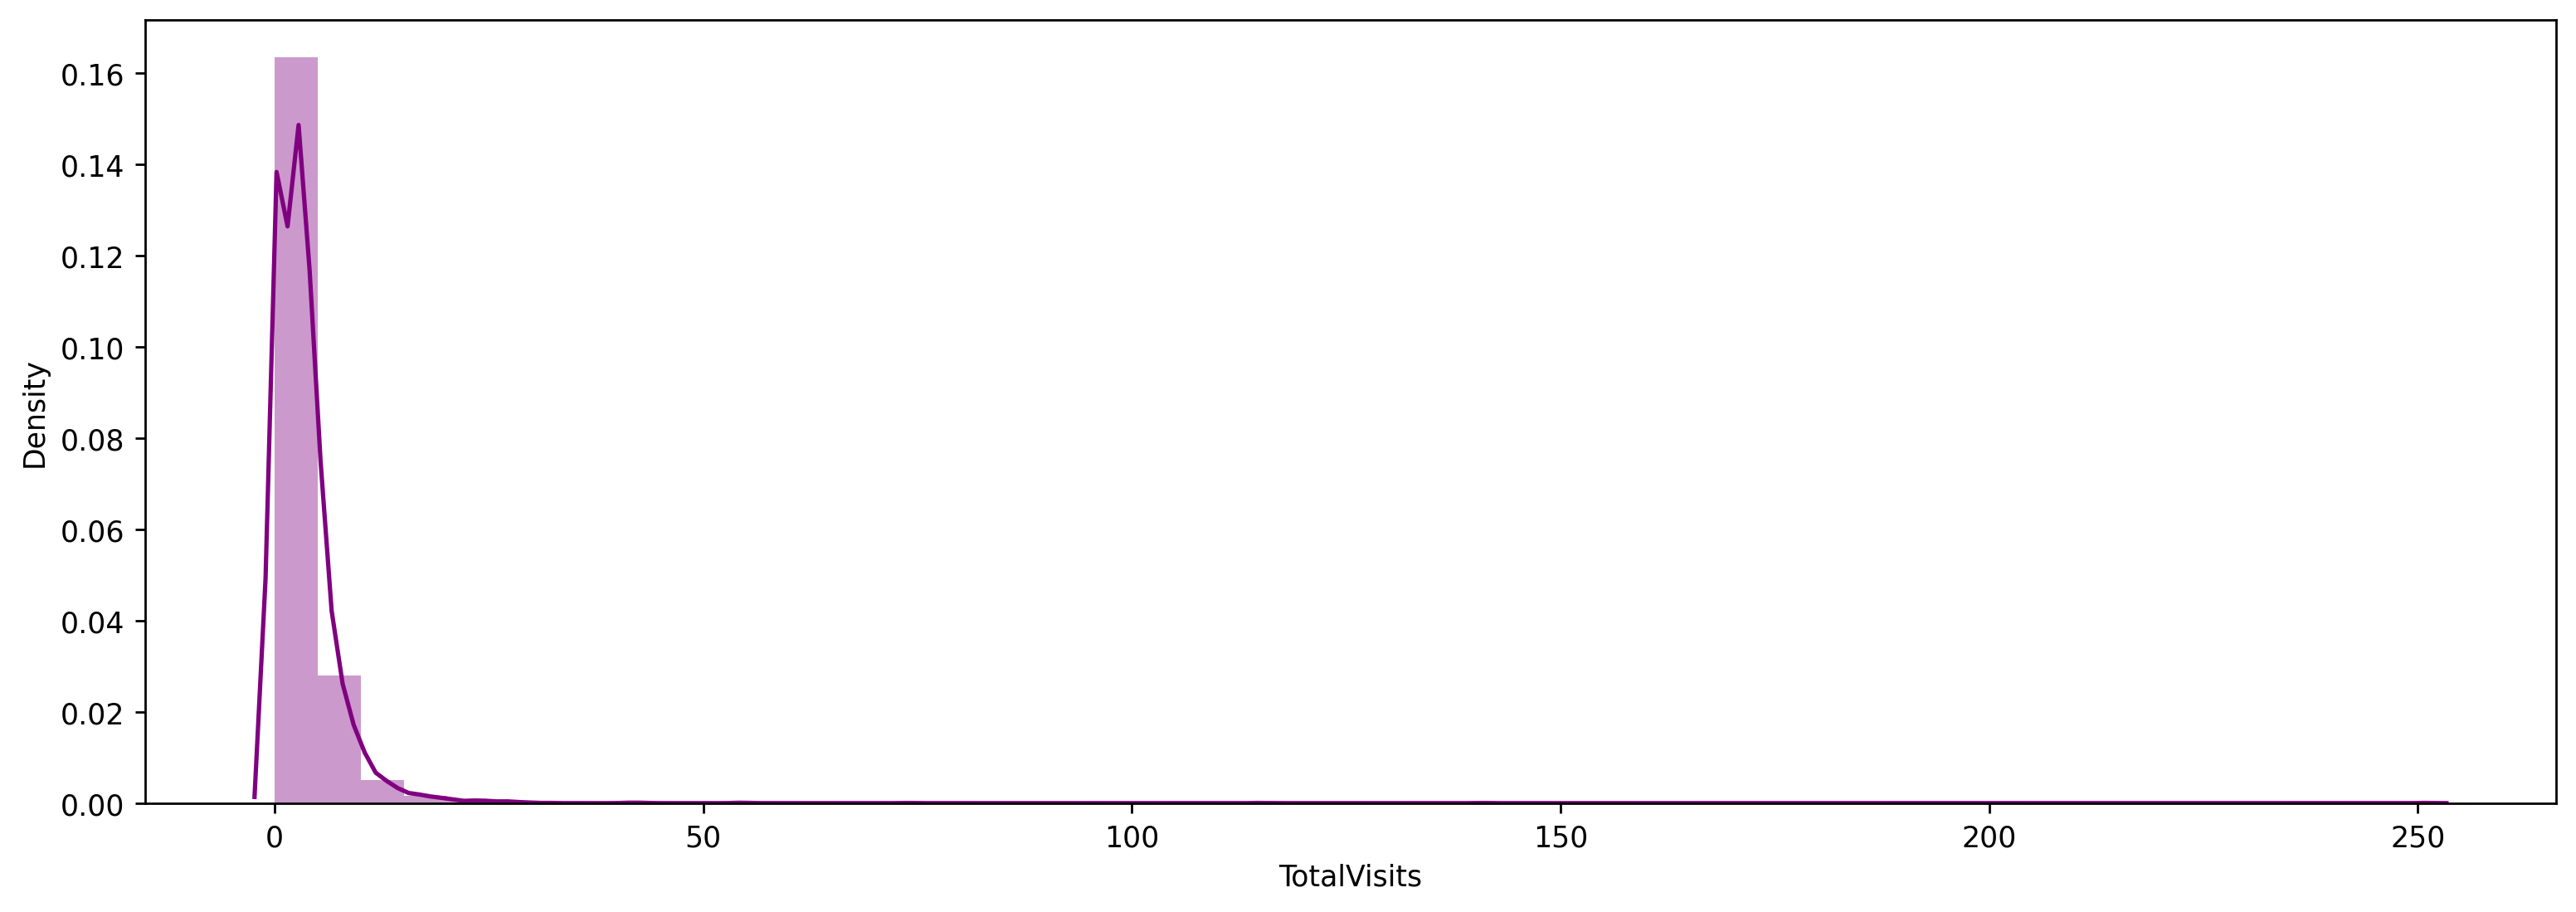

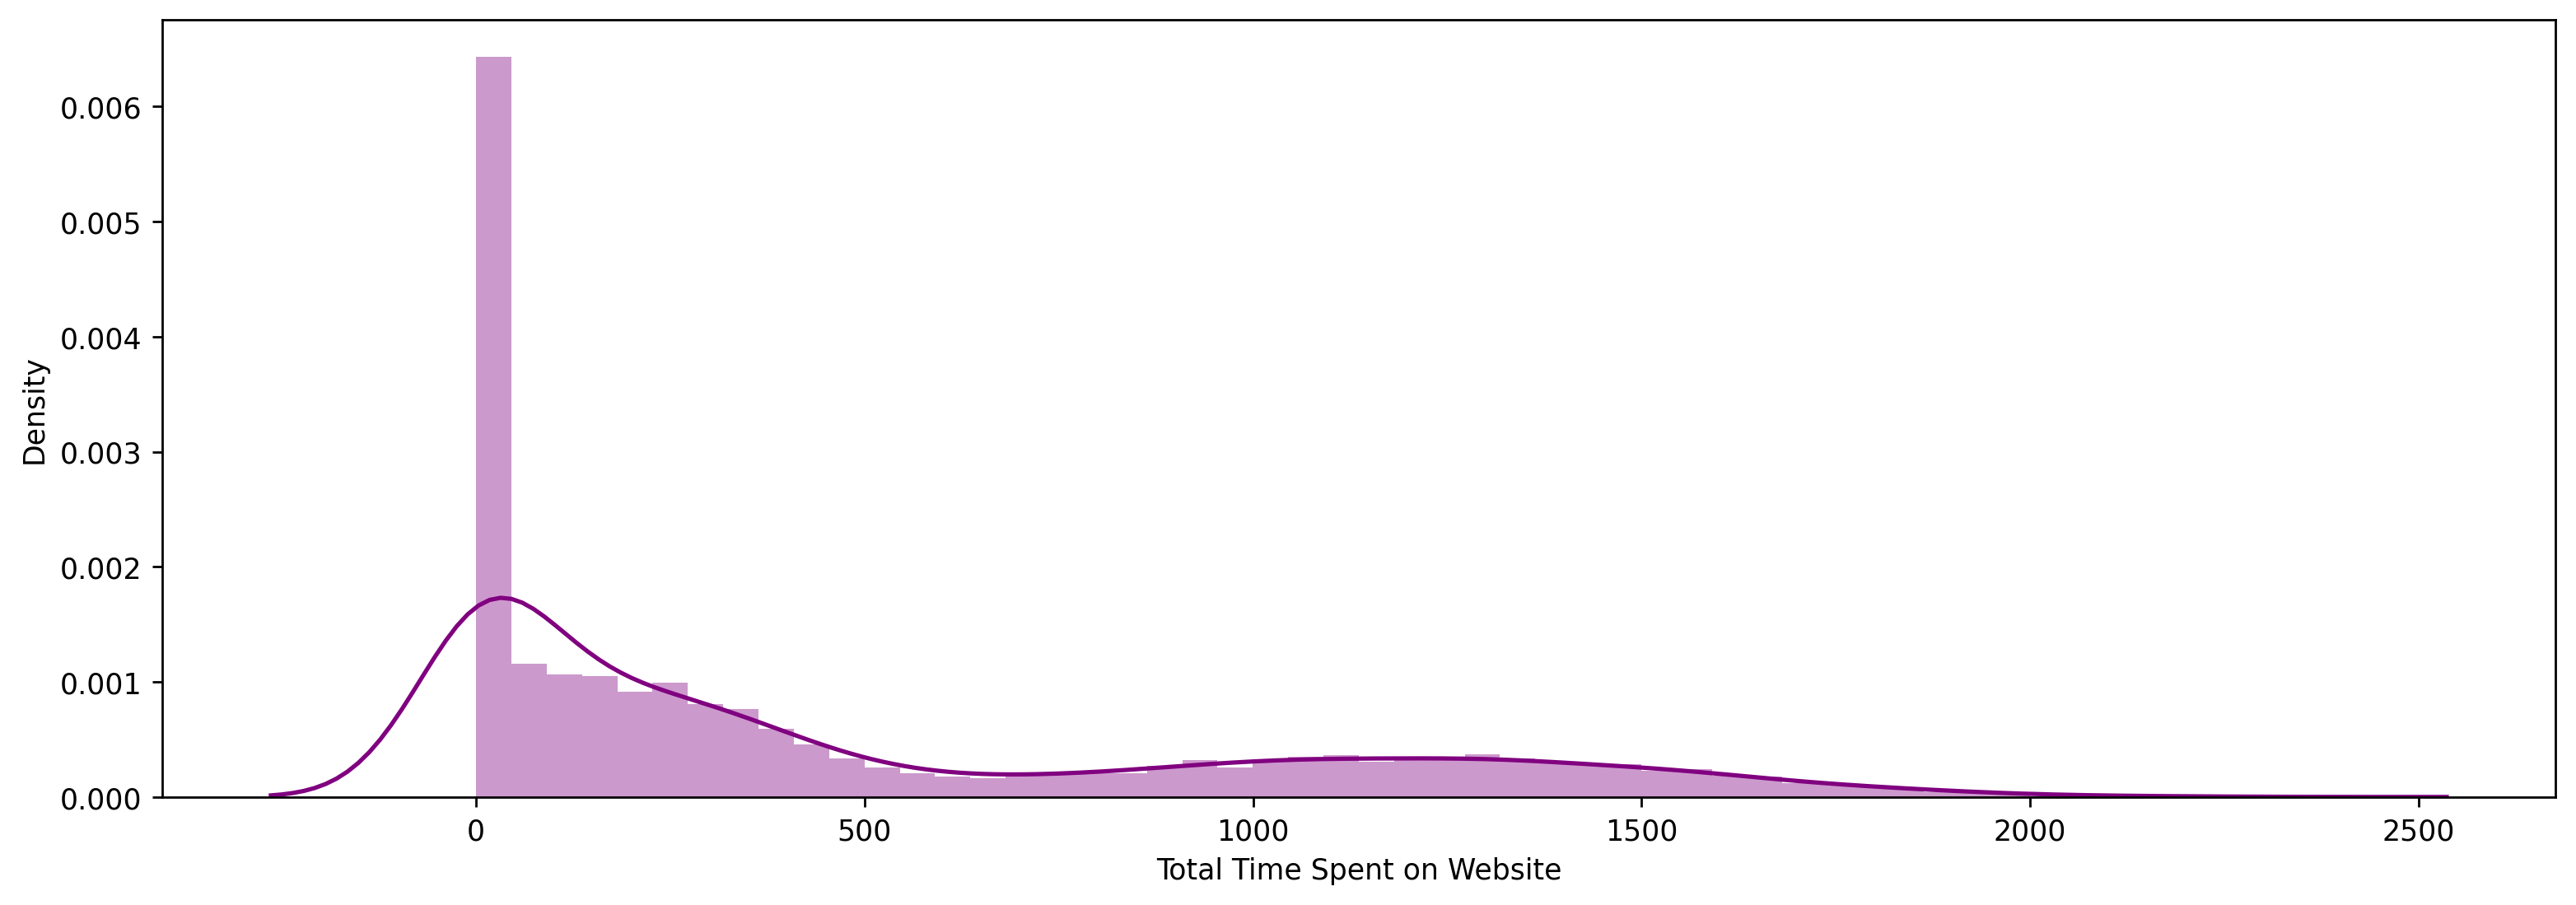

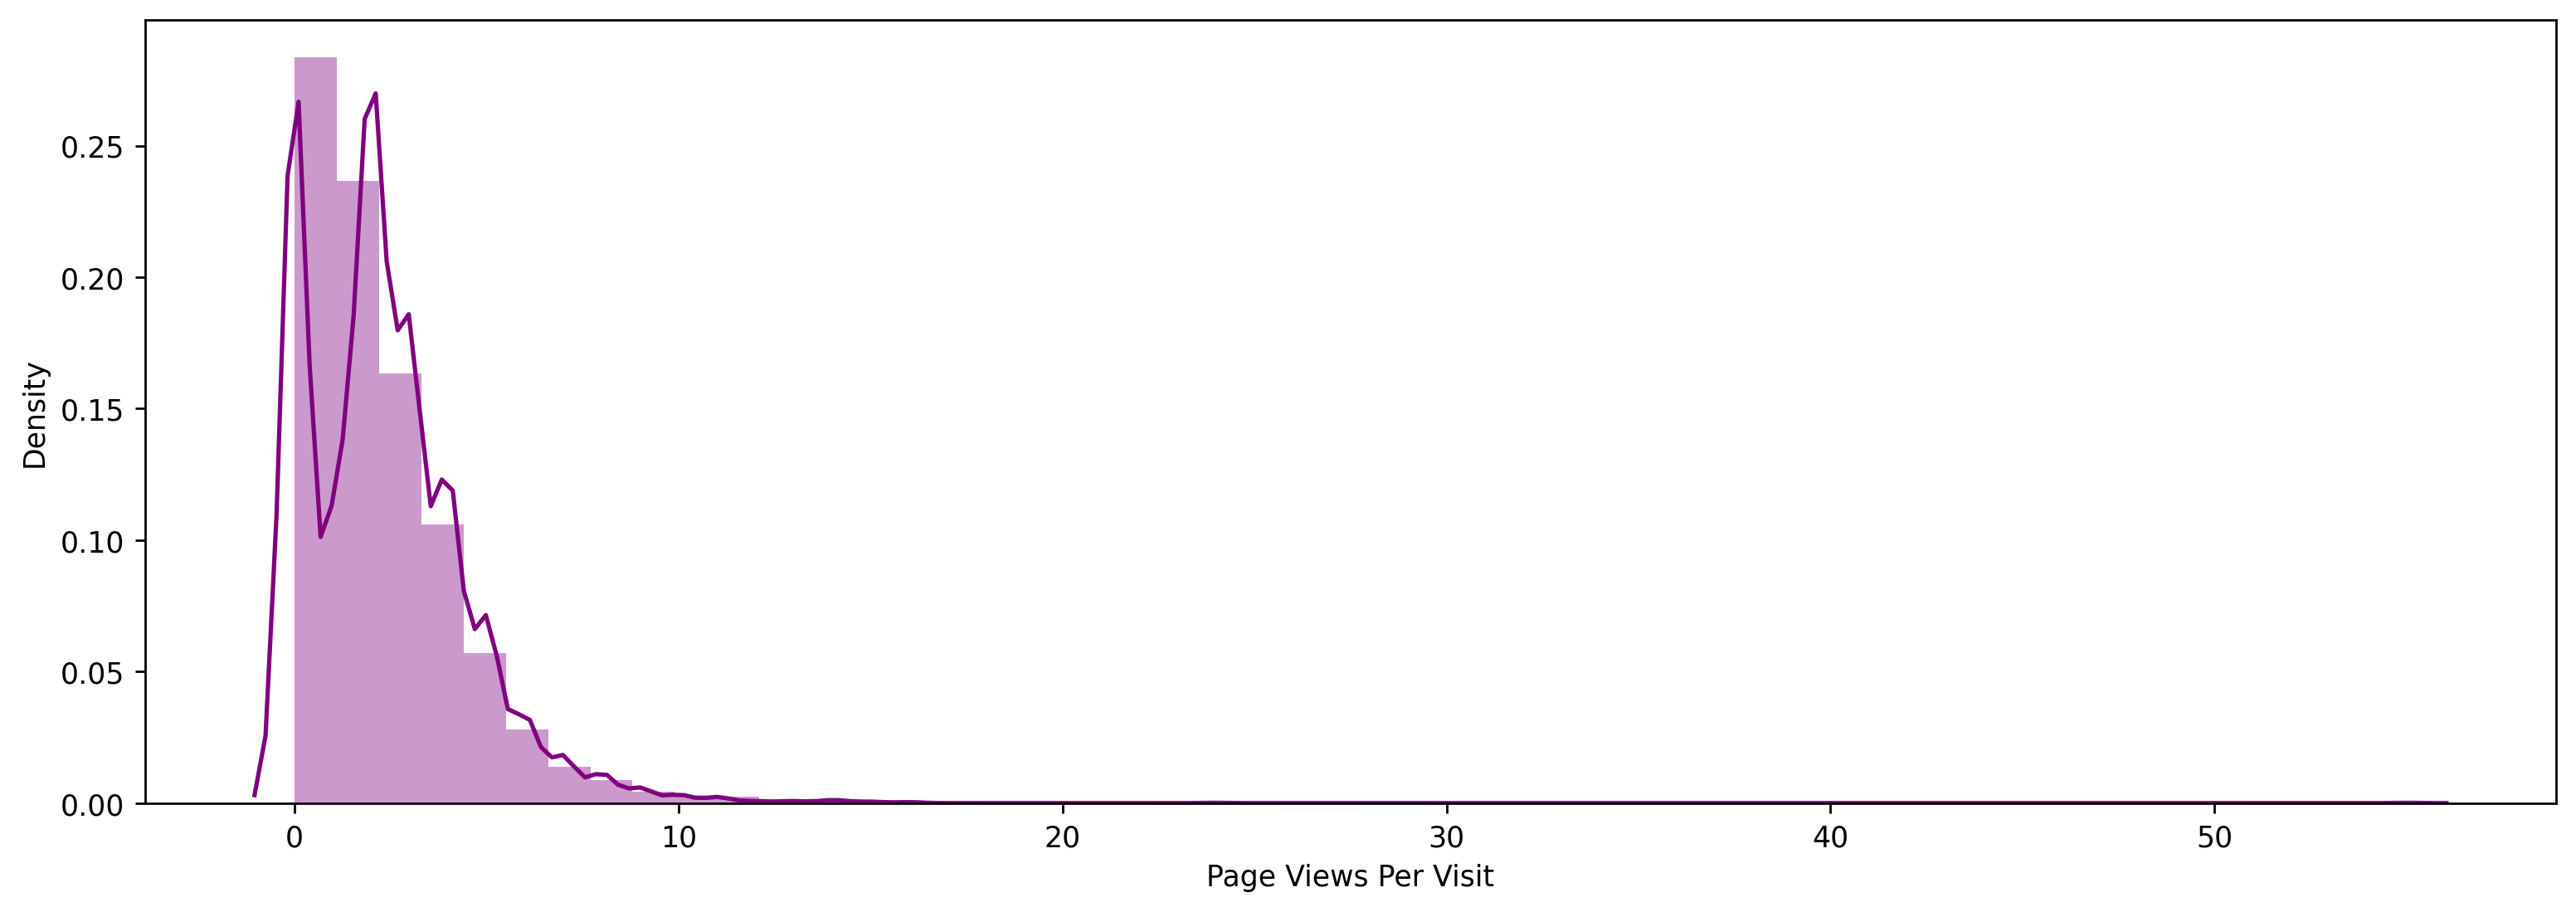

In [86]:
for i in numerical_var:
    plt.figure(figsize=(15,5),dpi=250)
    sns.distplot(leads_df[i],color = 'purple',bins = 50)
    plt.show()
    
# We Don't Have To Focus On Lead Number.
# Our Data Is Skewed.

#### Checking Imbalance

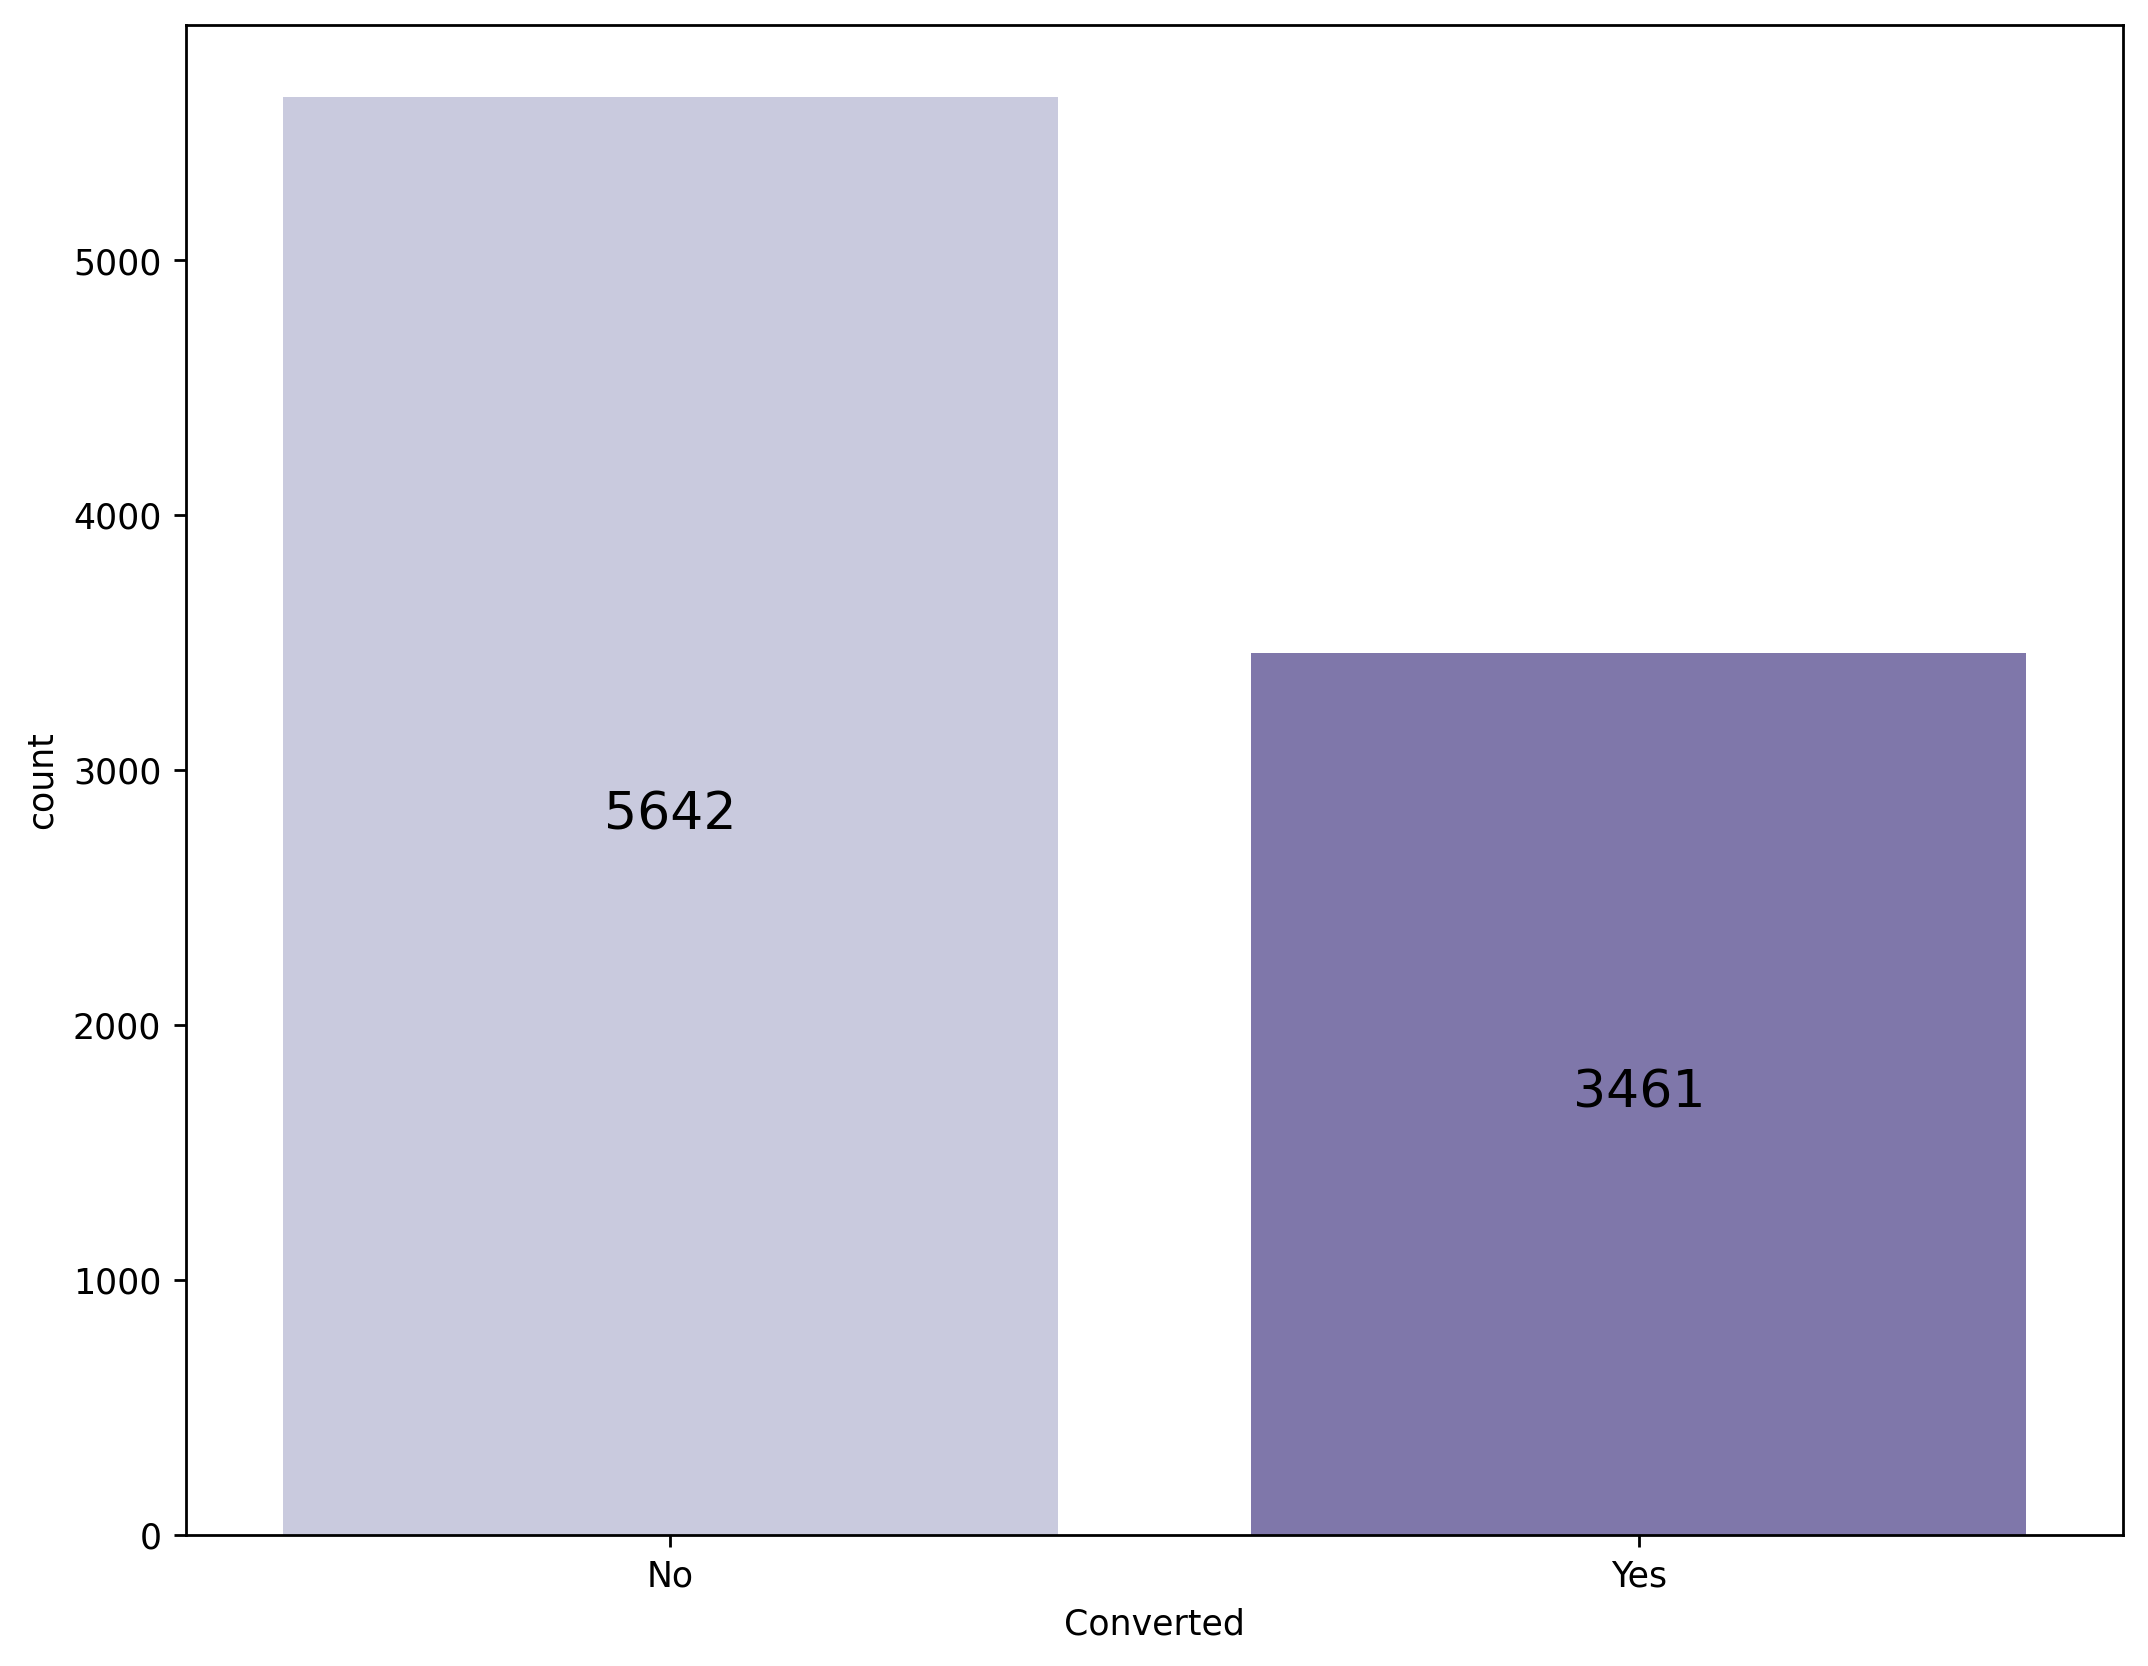

In [87]:
# For the target variable 'Converted'

plt.figure(figsize=(10,8), dpi=250)
a = sns.countplot(leads_df.Converted, palette='Purples')
plt.xticks(rotation=0,ticks=[0,1],labels=['No','Yes'])
plt.bar_label(a.containers[0],size = 15,label_type='center');

In [88]:
(sum(leads_df['Converted'])/len(leads_df['Converted'].index))*100

# We observe that only 38 % of the leads are converted, where as 62 % are not converted. There exists data imbalance in the dataset.
# The data is biased towards leads that are not converted.

38.02043282434362

#### Checking Correlation

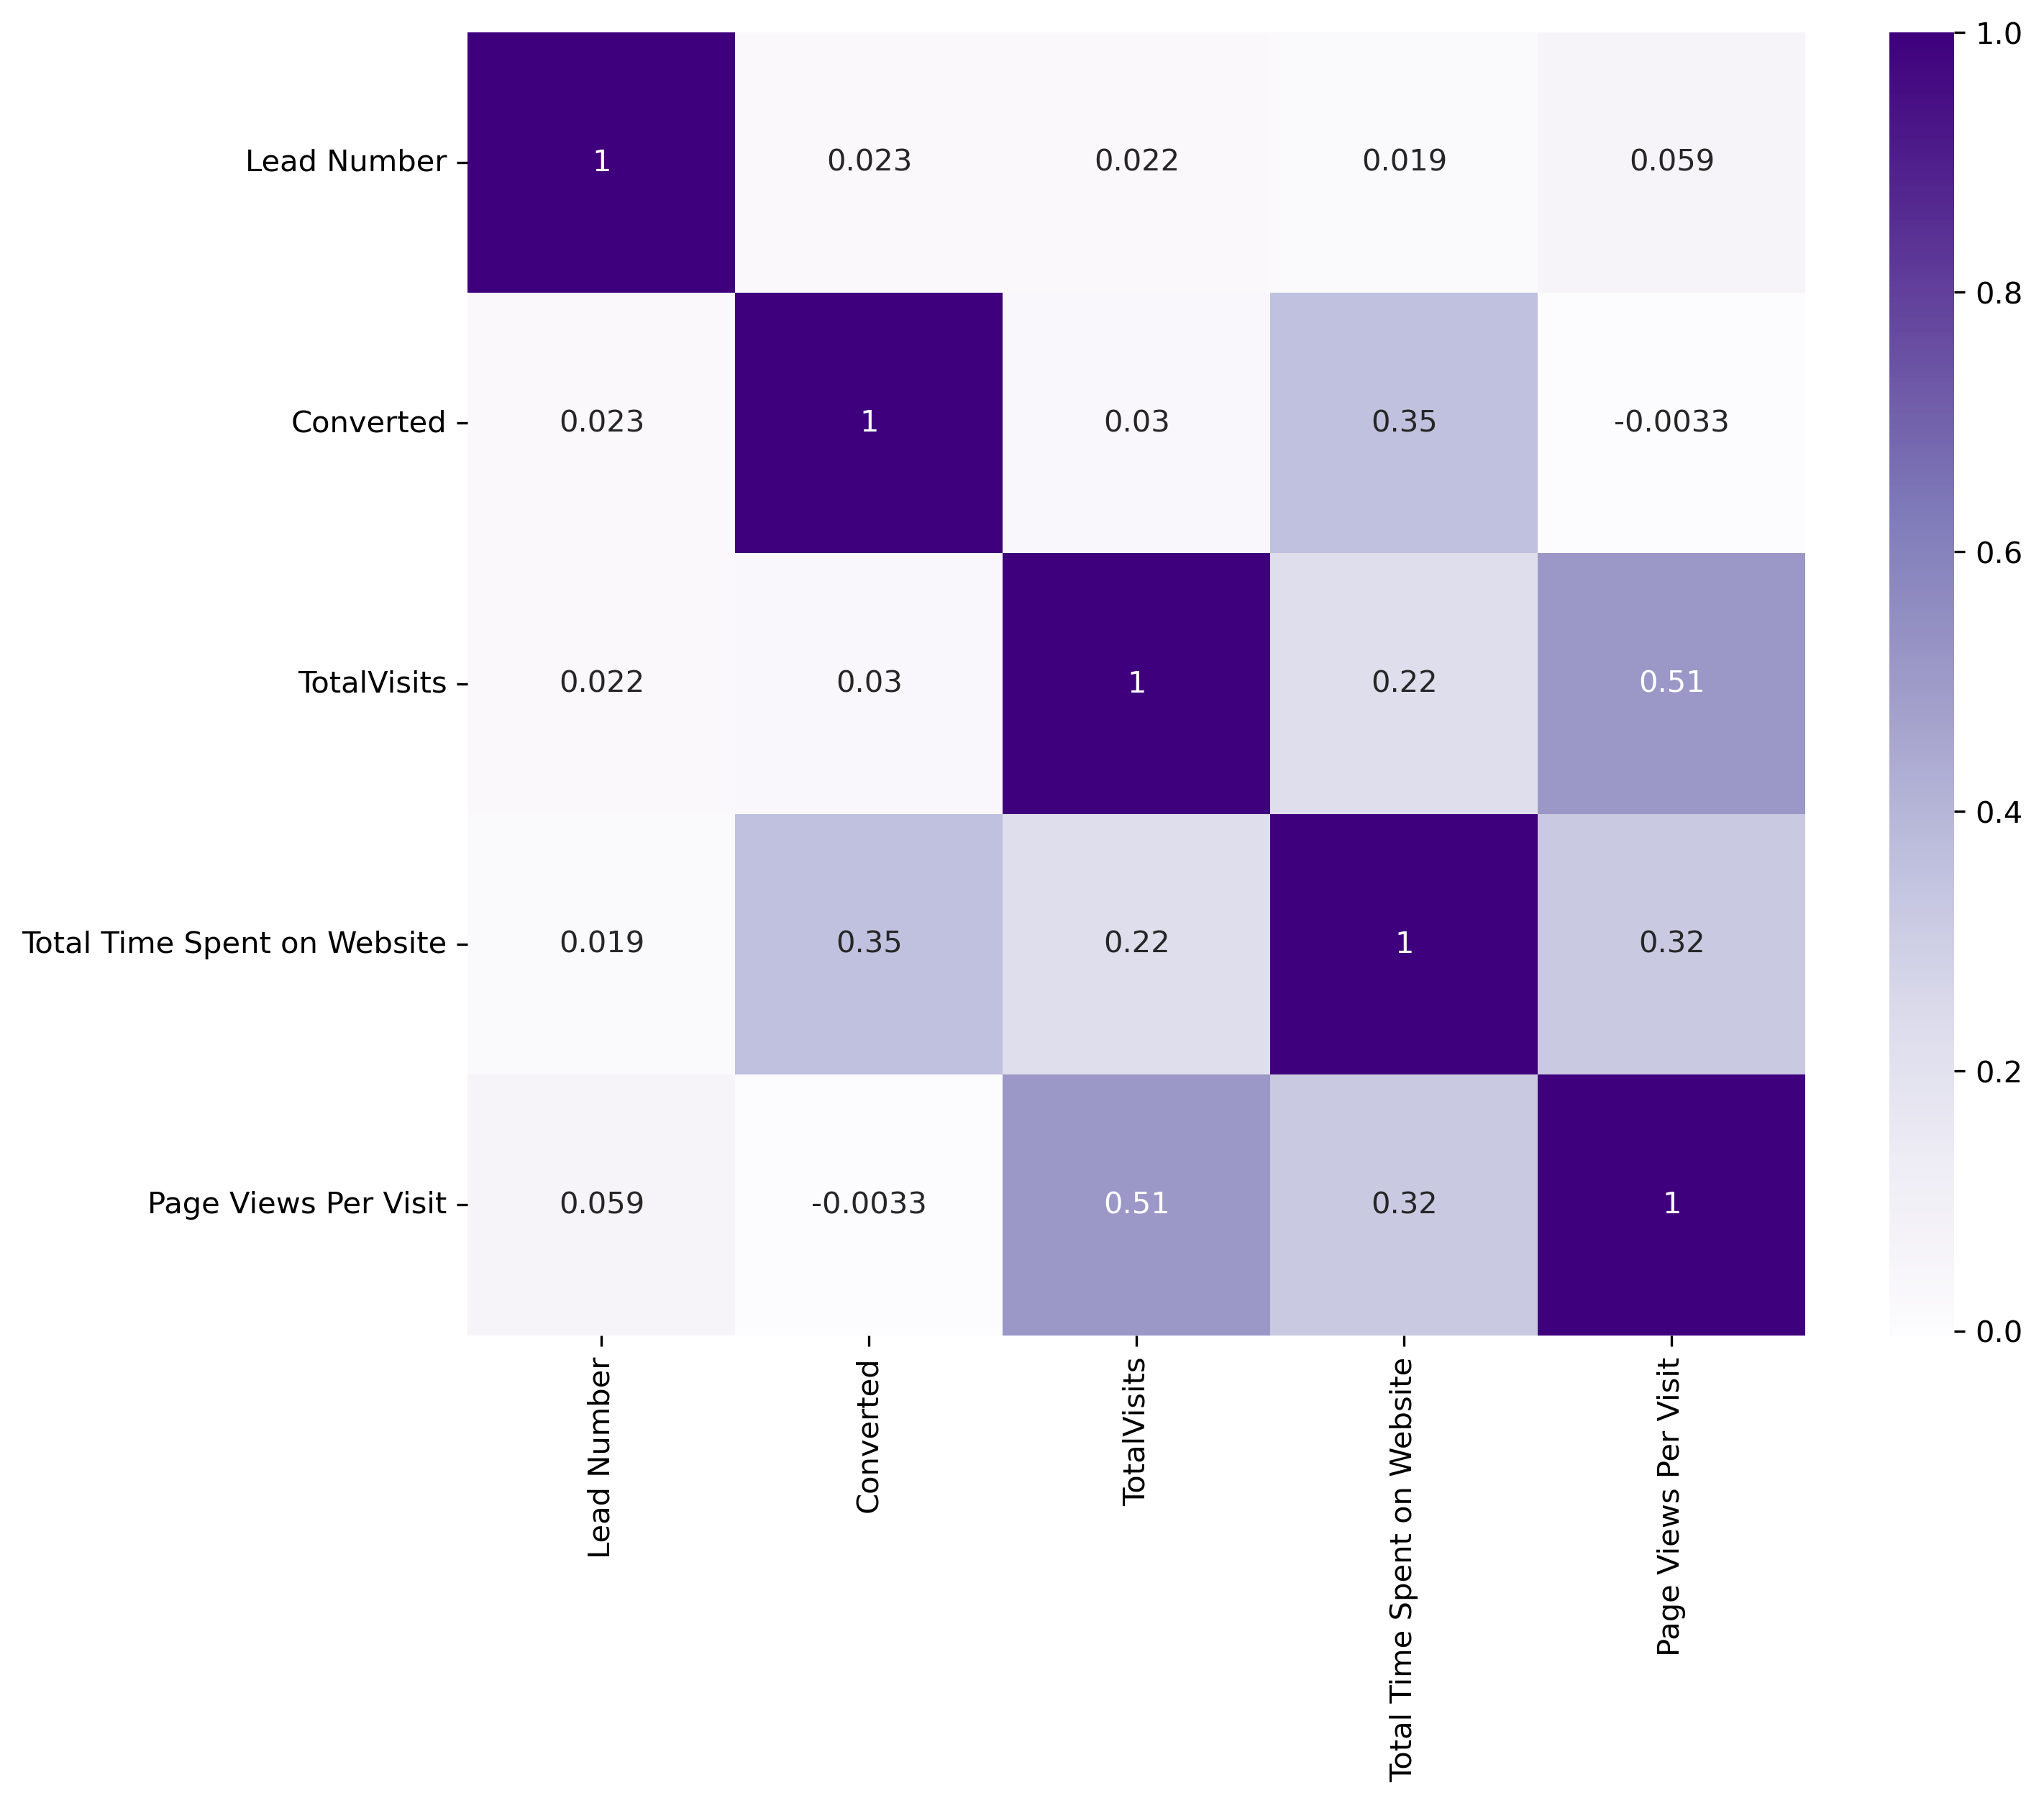

In [89]:
plt.figure(figsize=(10,8),dpi=300)
sns.heatmap(leads_df.corr(),annot=True,cmap="Purples");
plt.savefig('leadscorecorellation.svg',transparent=True,bbox_inches='tight')
plt.show()

#There is not much correlation between the variables.

#### Visualizing Categorical Variables.

In [90]:
categorical_Val #'Prospect ID' is not needed in any visualization, thus not taking it.

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [91]:
leads_df['Converted_flag'] = leads_df.Converted.replace({1:'Yes',0:'No'}) #Just Creating Flag For Easy Visualization.

In [92]:
categorical_Val #sanity check

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [93]:
# plt.figure(figsize=(15,5),dpi=250)
# c = sns.countplot(leads_df['City'],hue=leads_df.Converted_flag,palette='Purples')
# plt.bar_label(c.containers[0],size = 7)
# plt.bar_label(c.containers[1],size = 7)
# plt.xticks(rotation = 70)
# plt.savefig('City.svg',transparent=True,bbox_inches='tight')
# plt.show()

#Created To Save Plots Manually

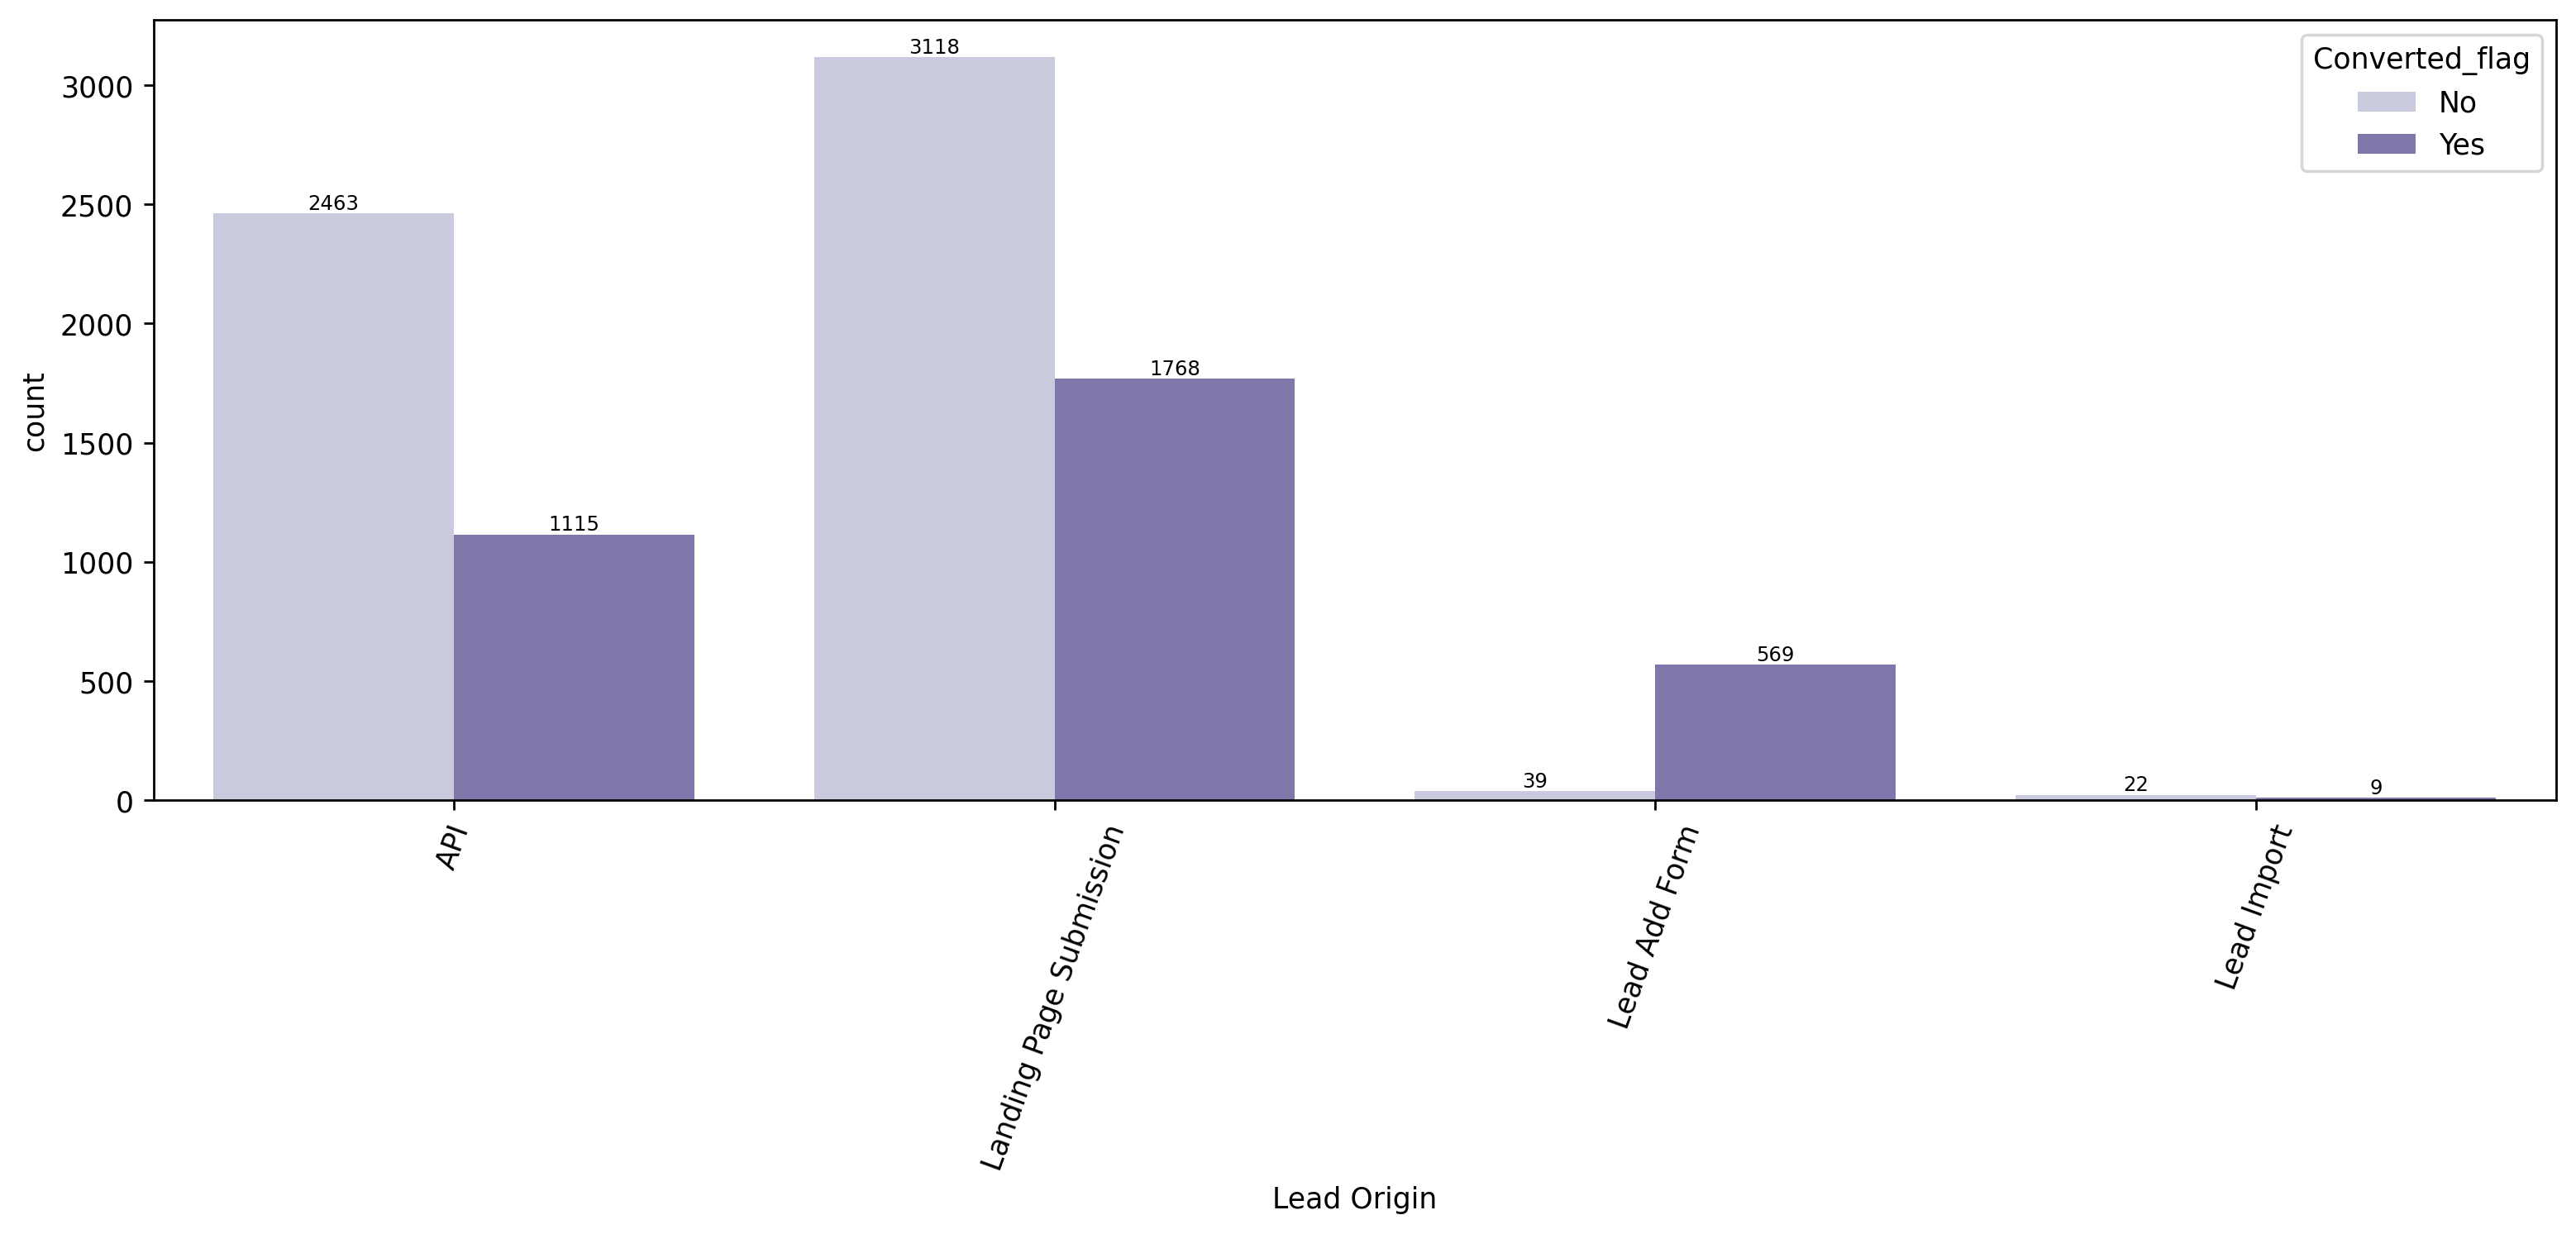

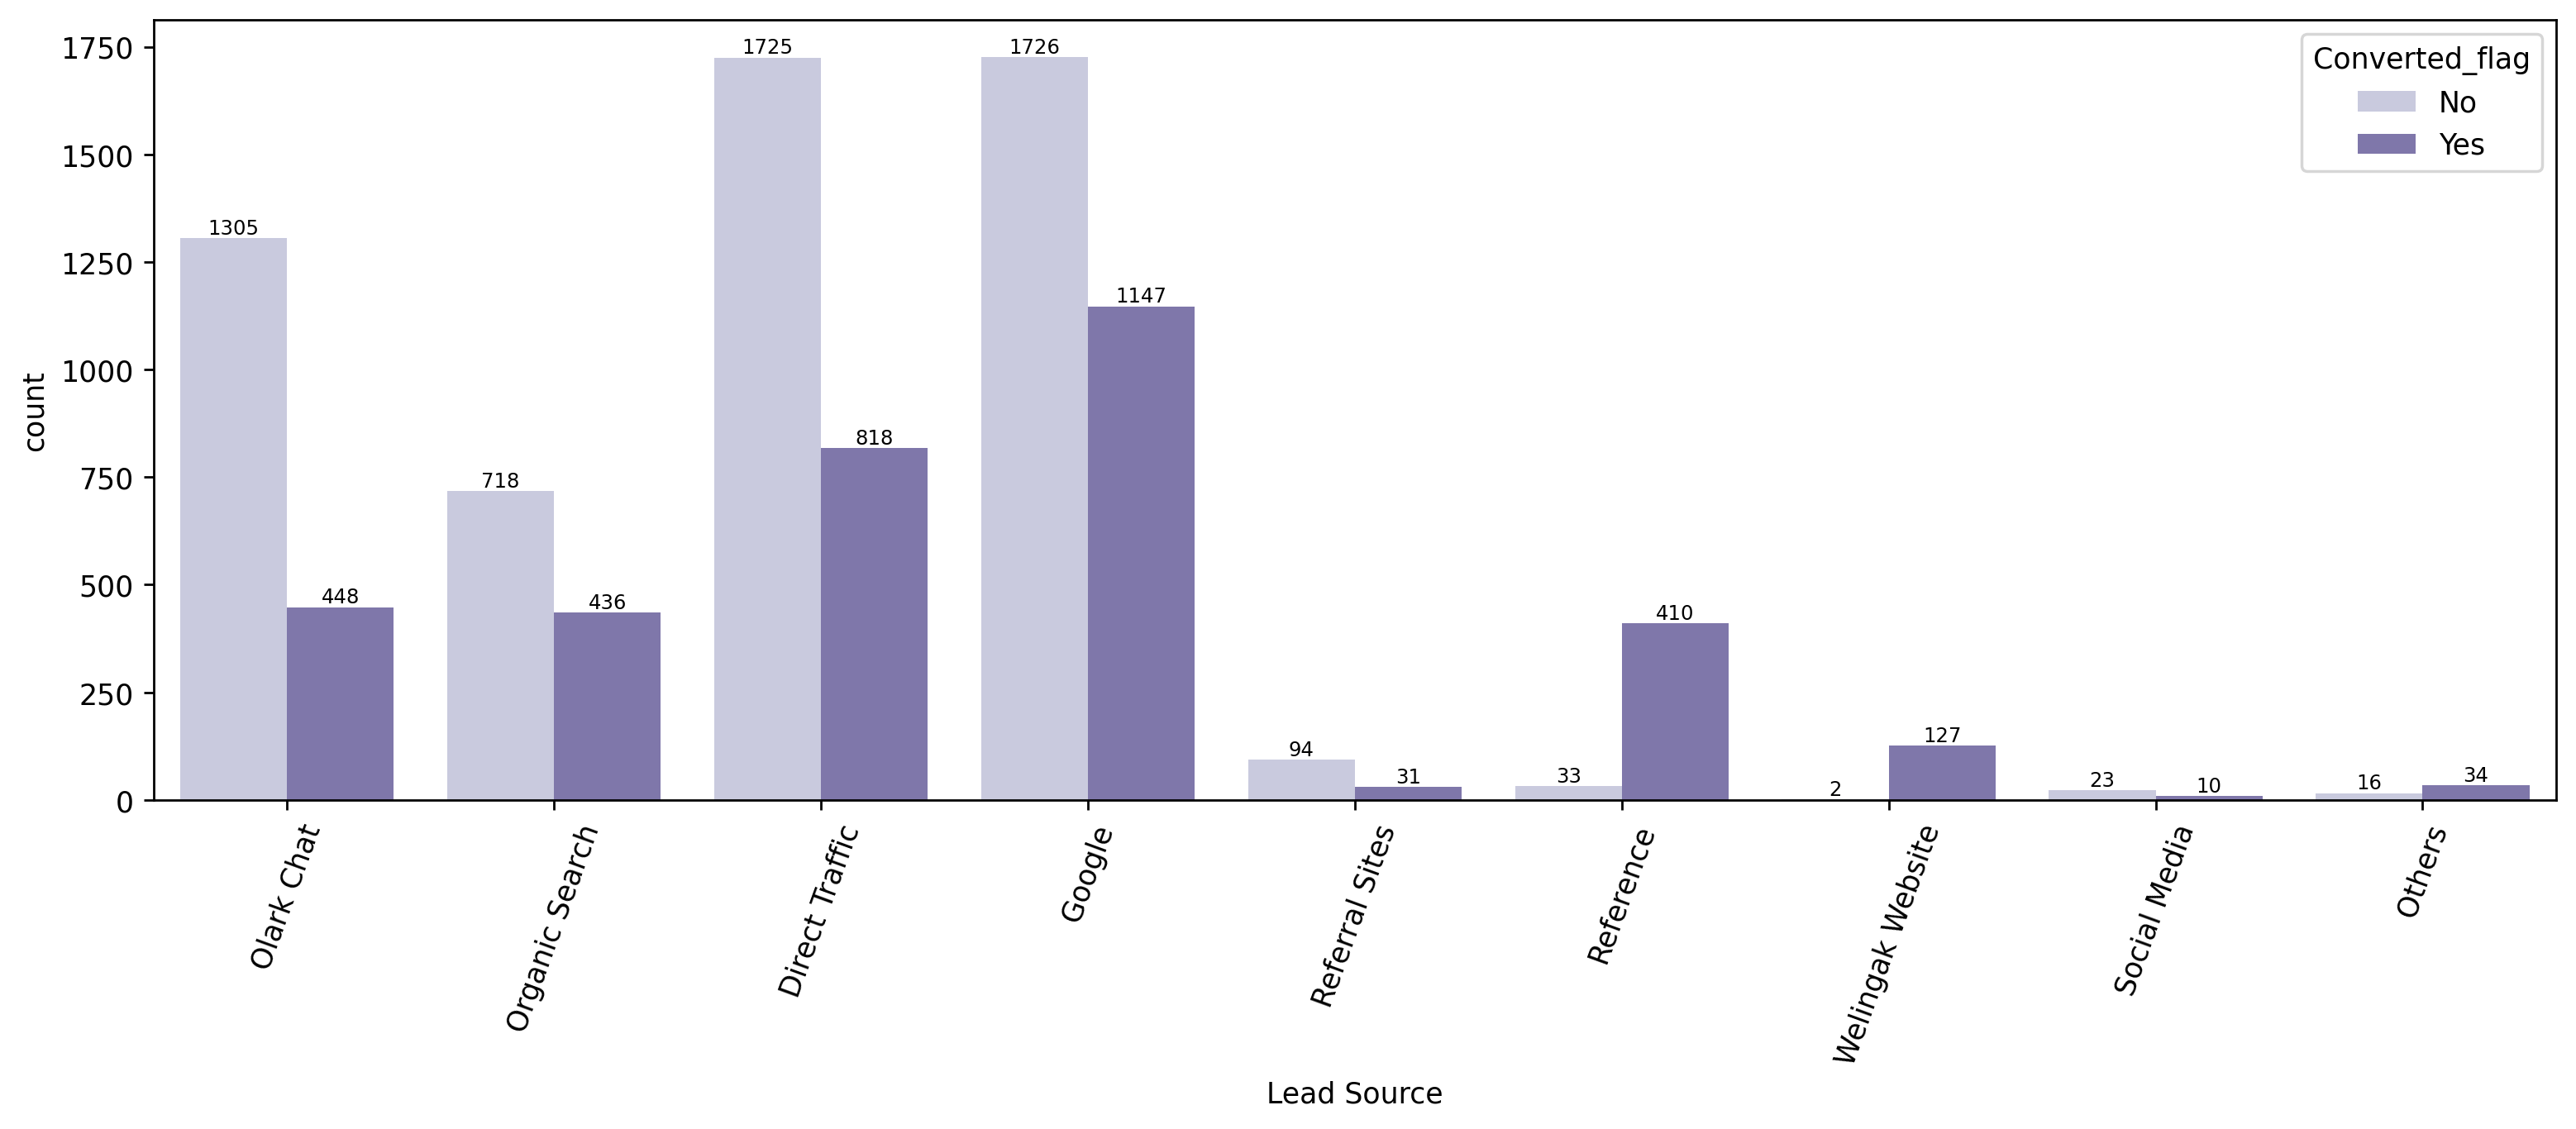

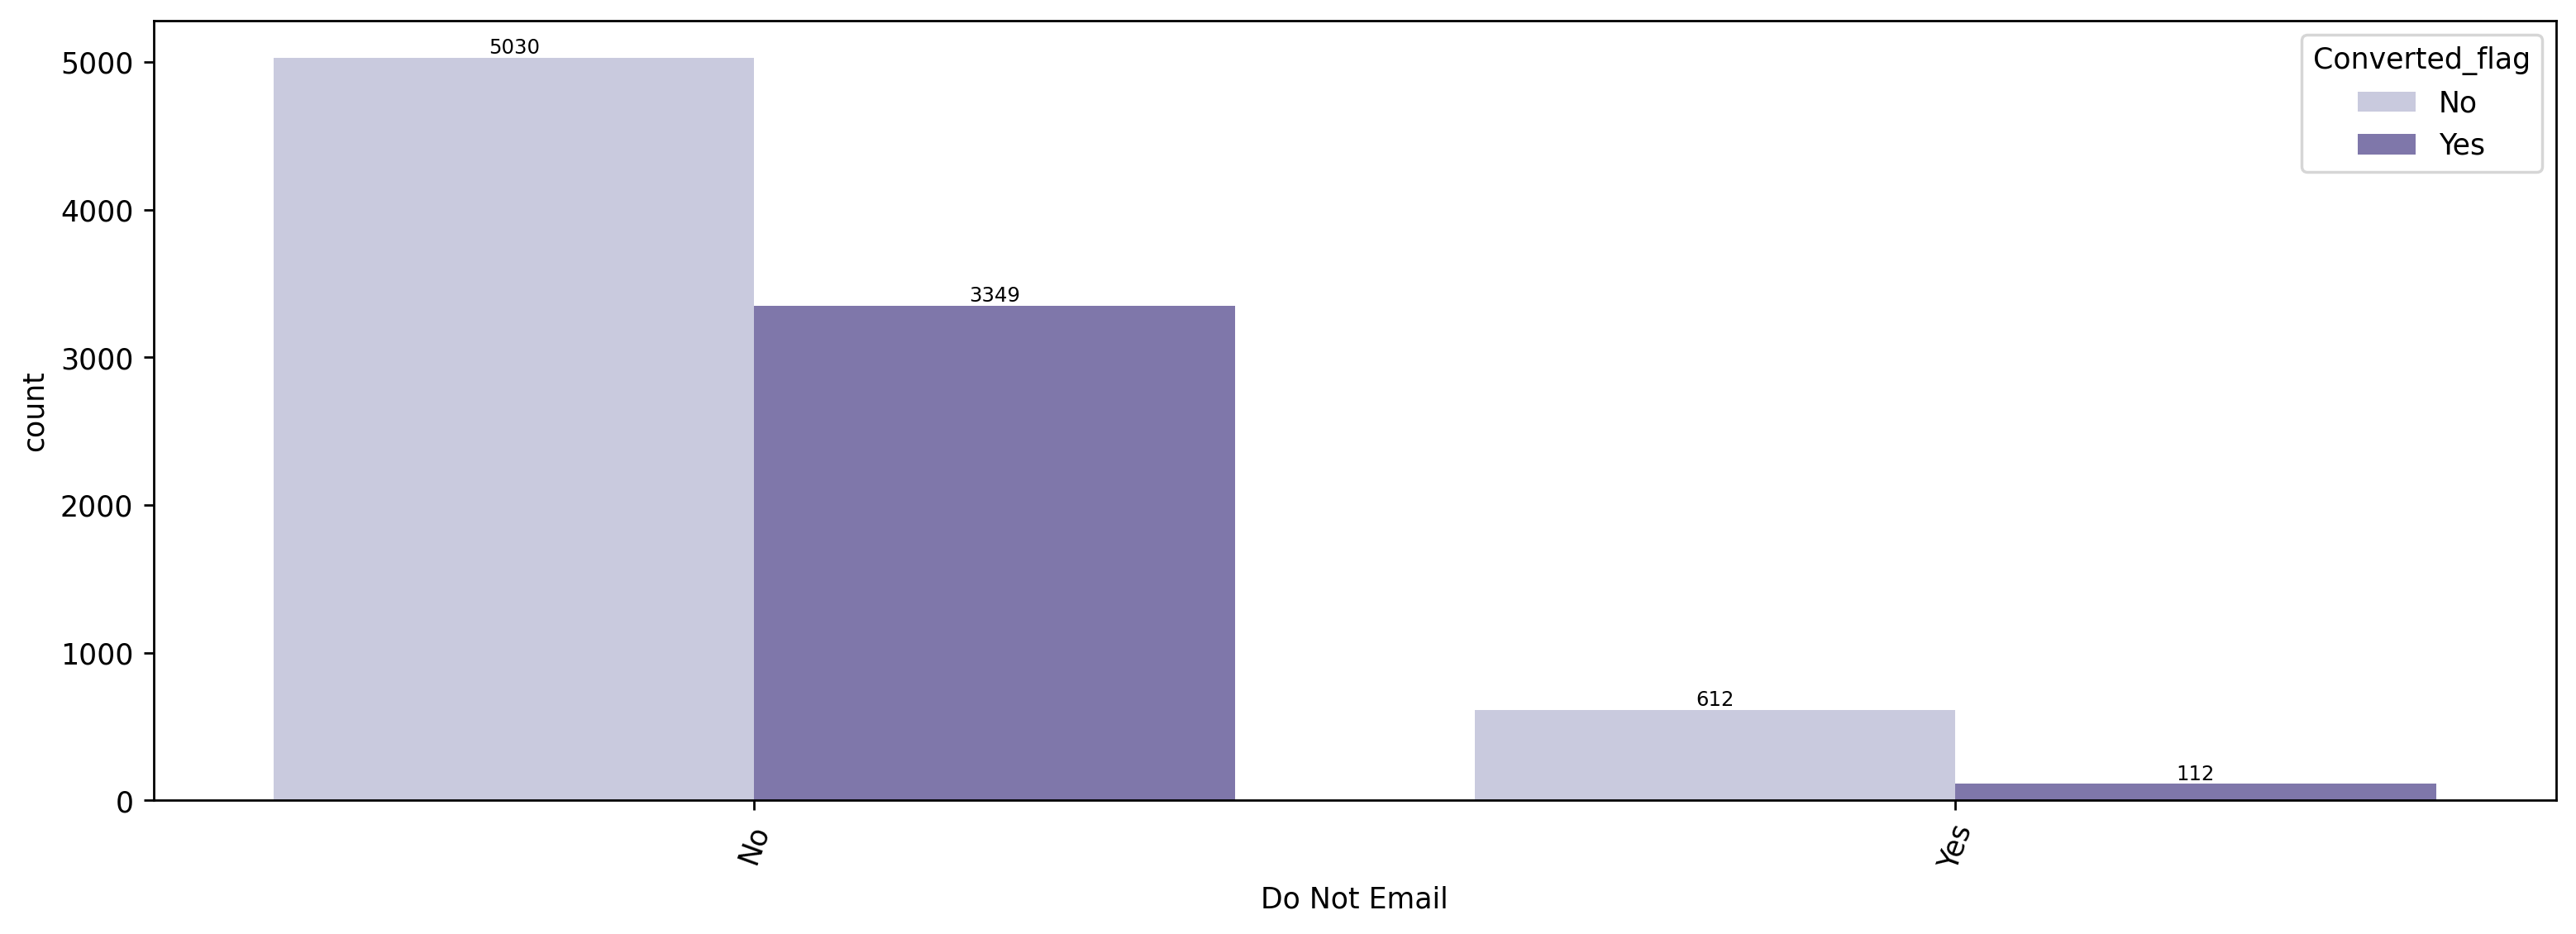

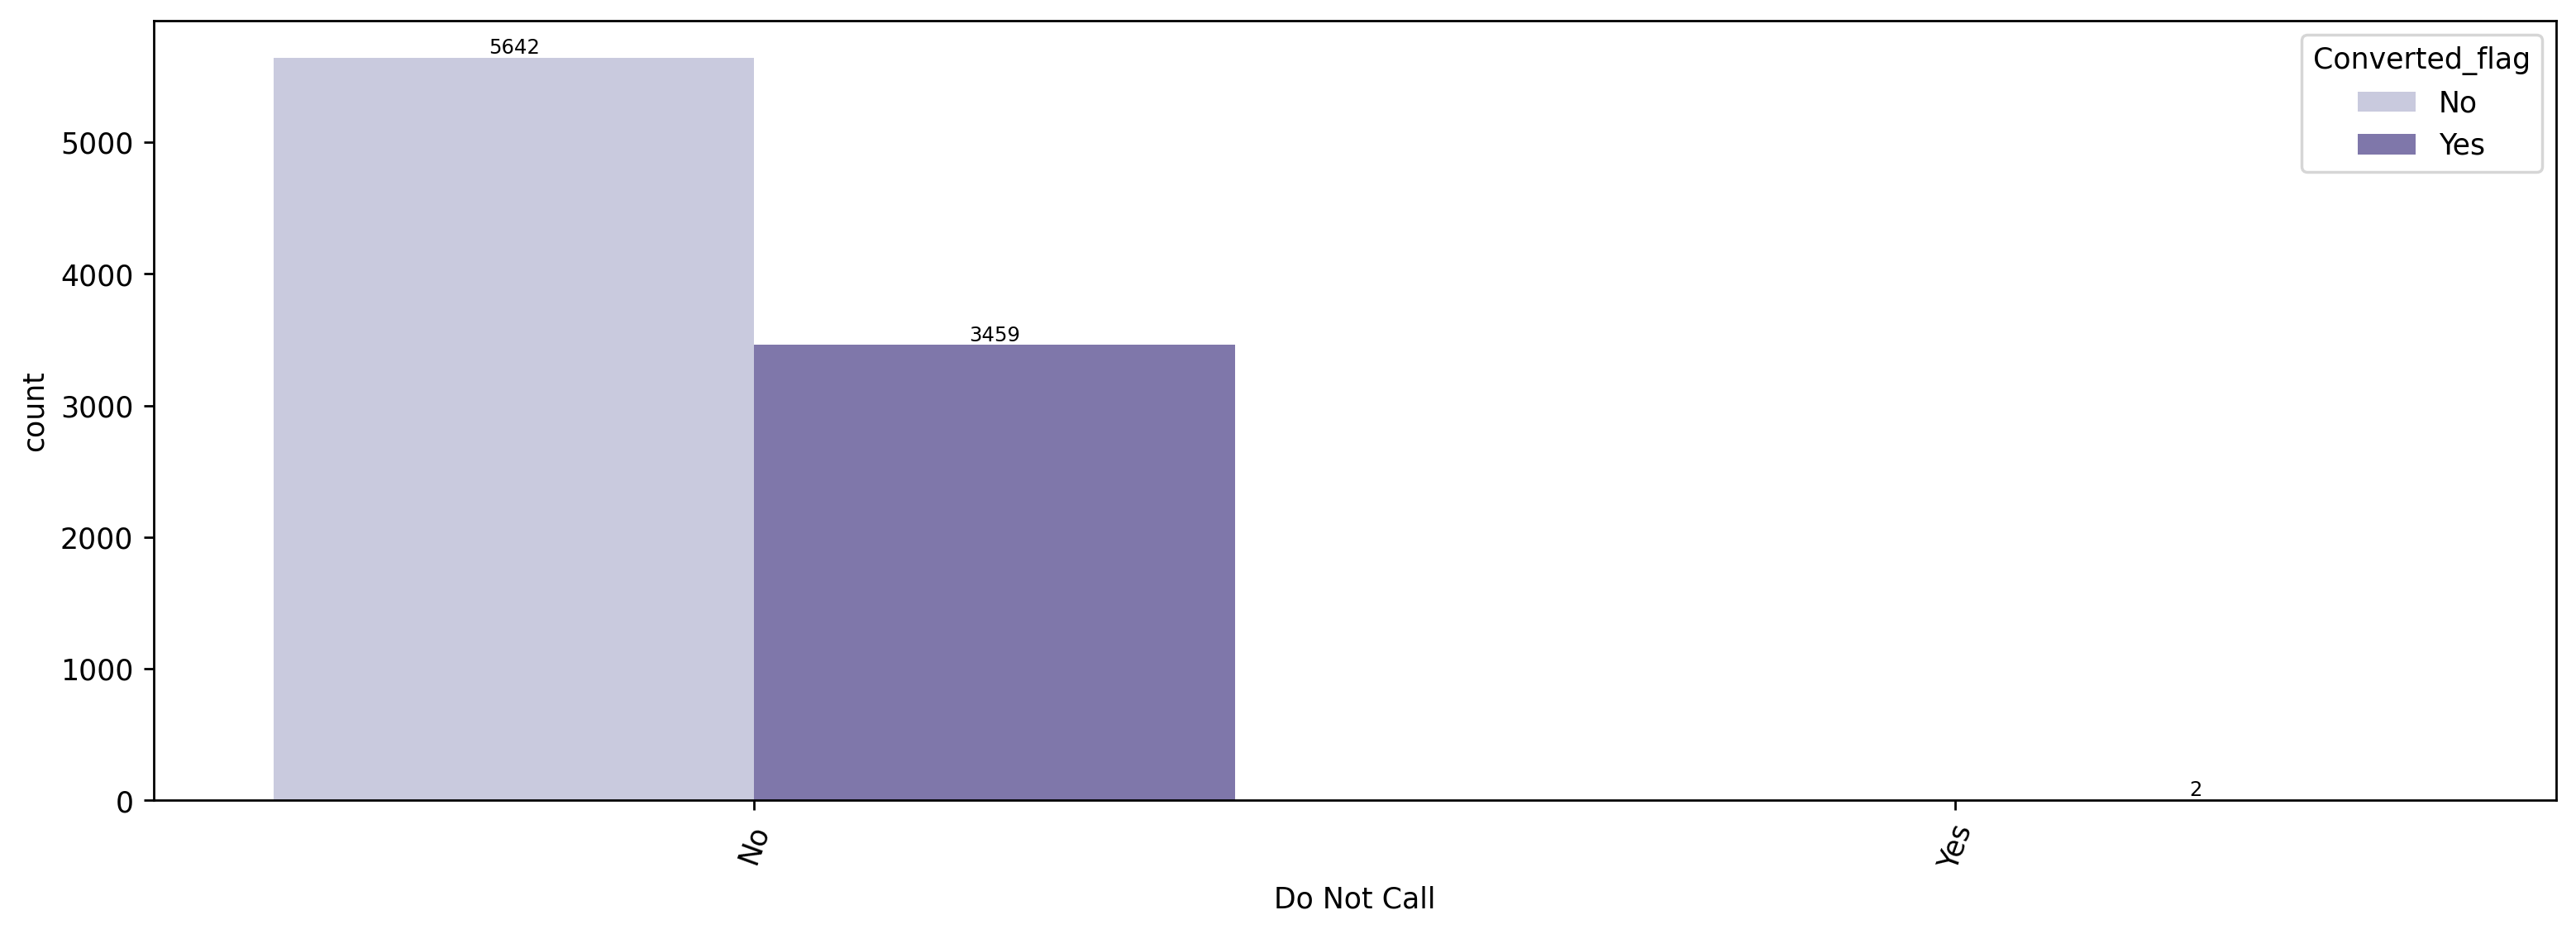

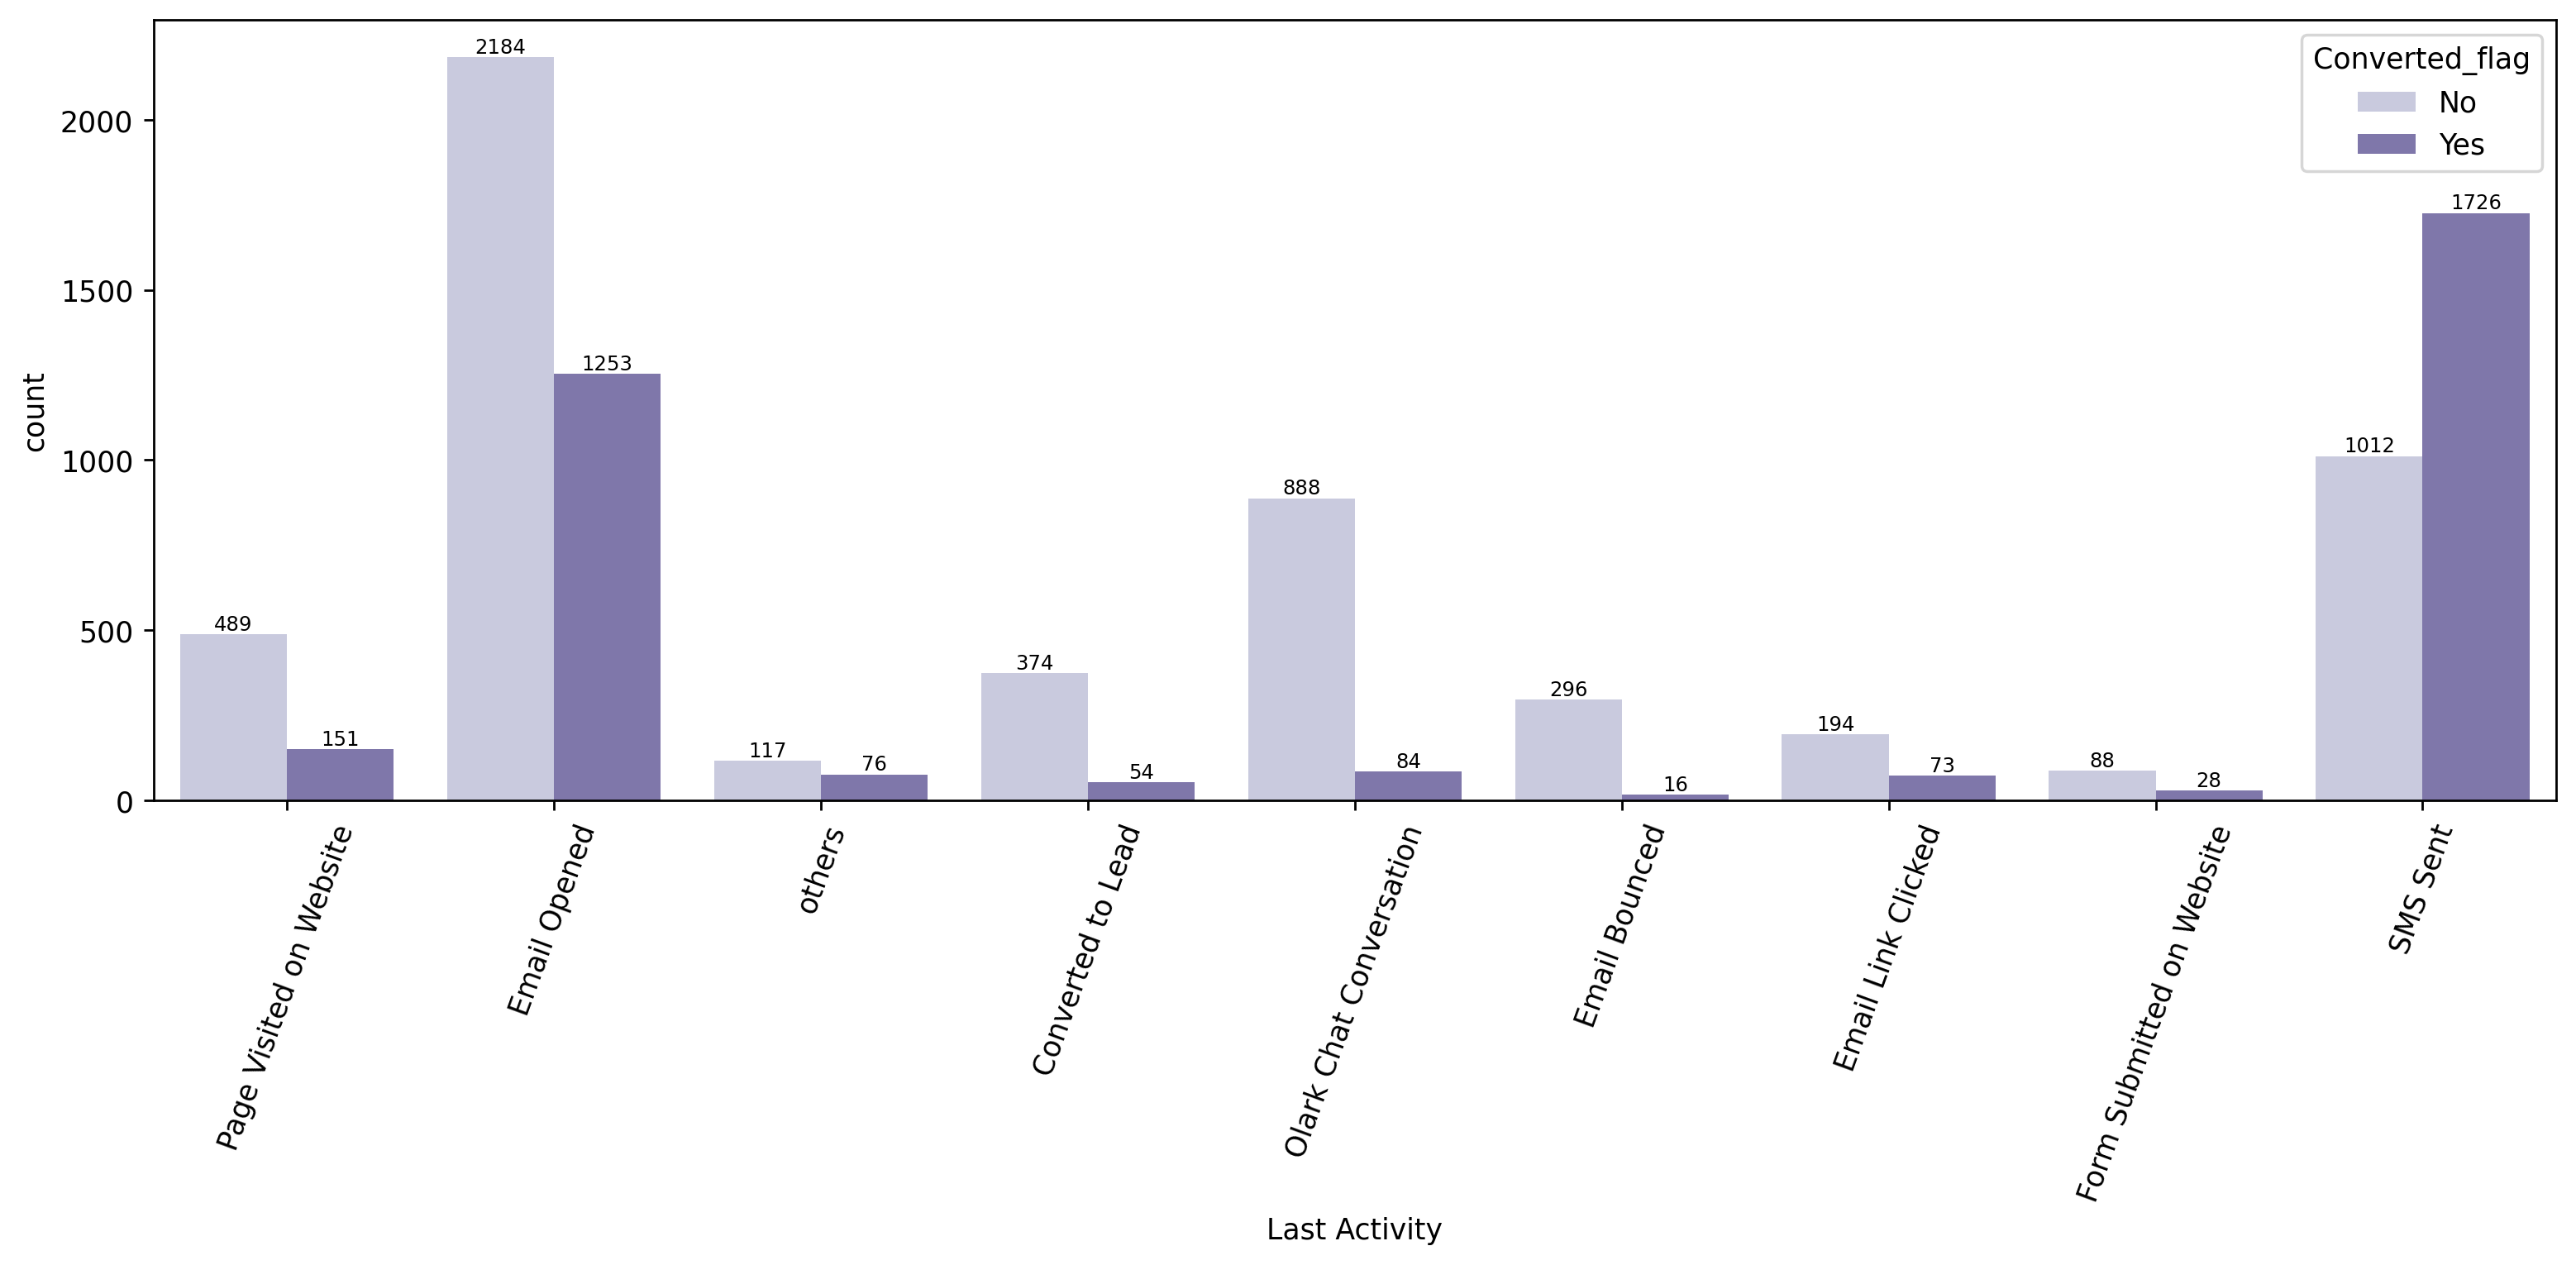

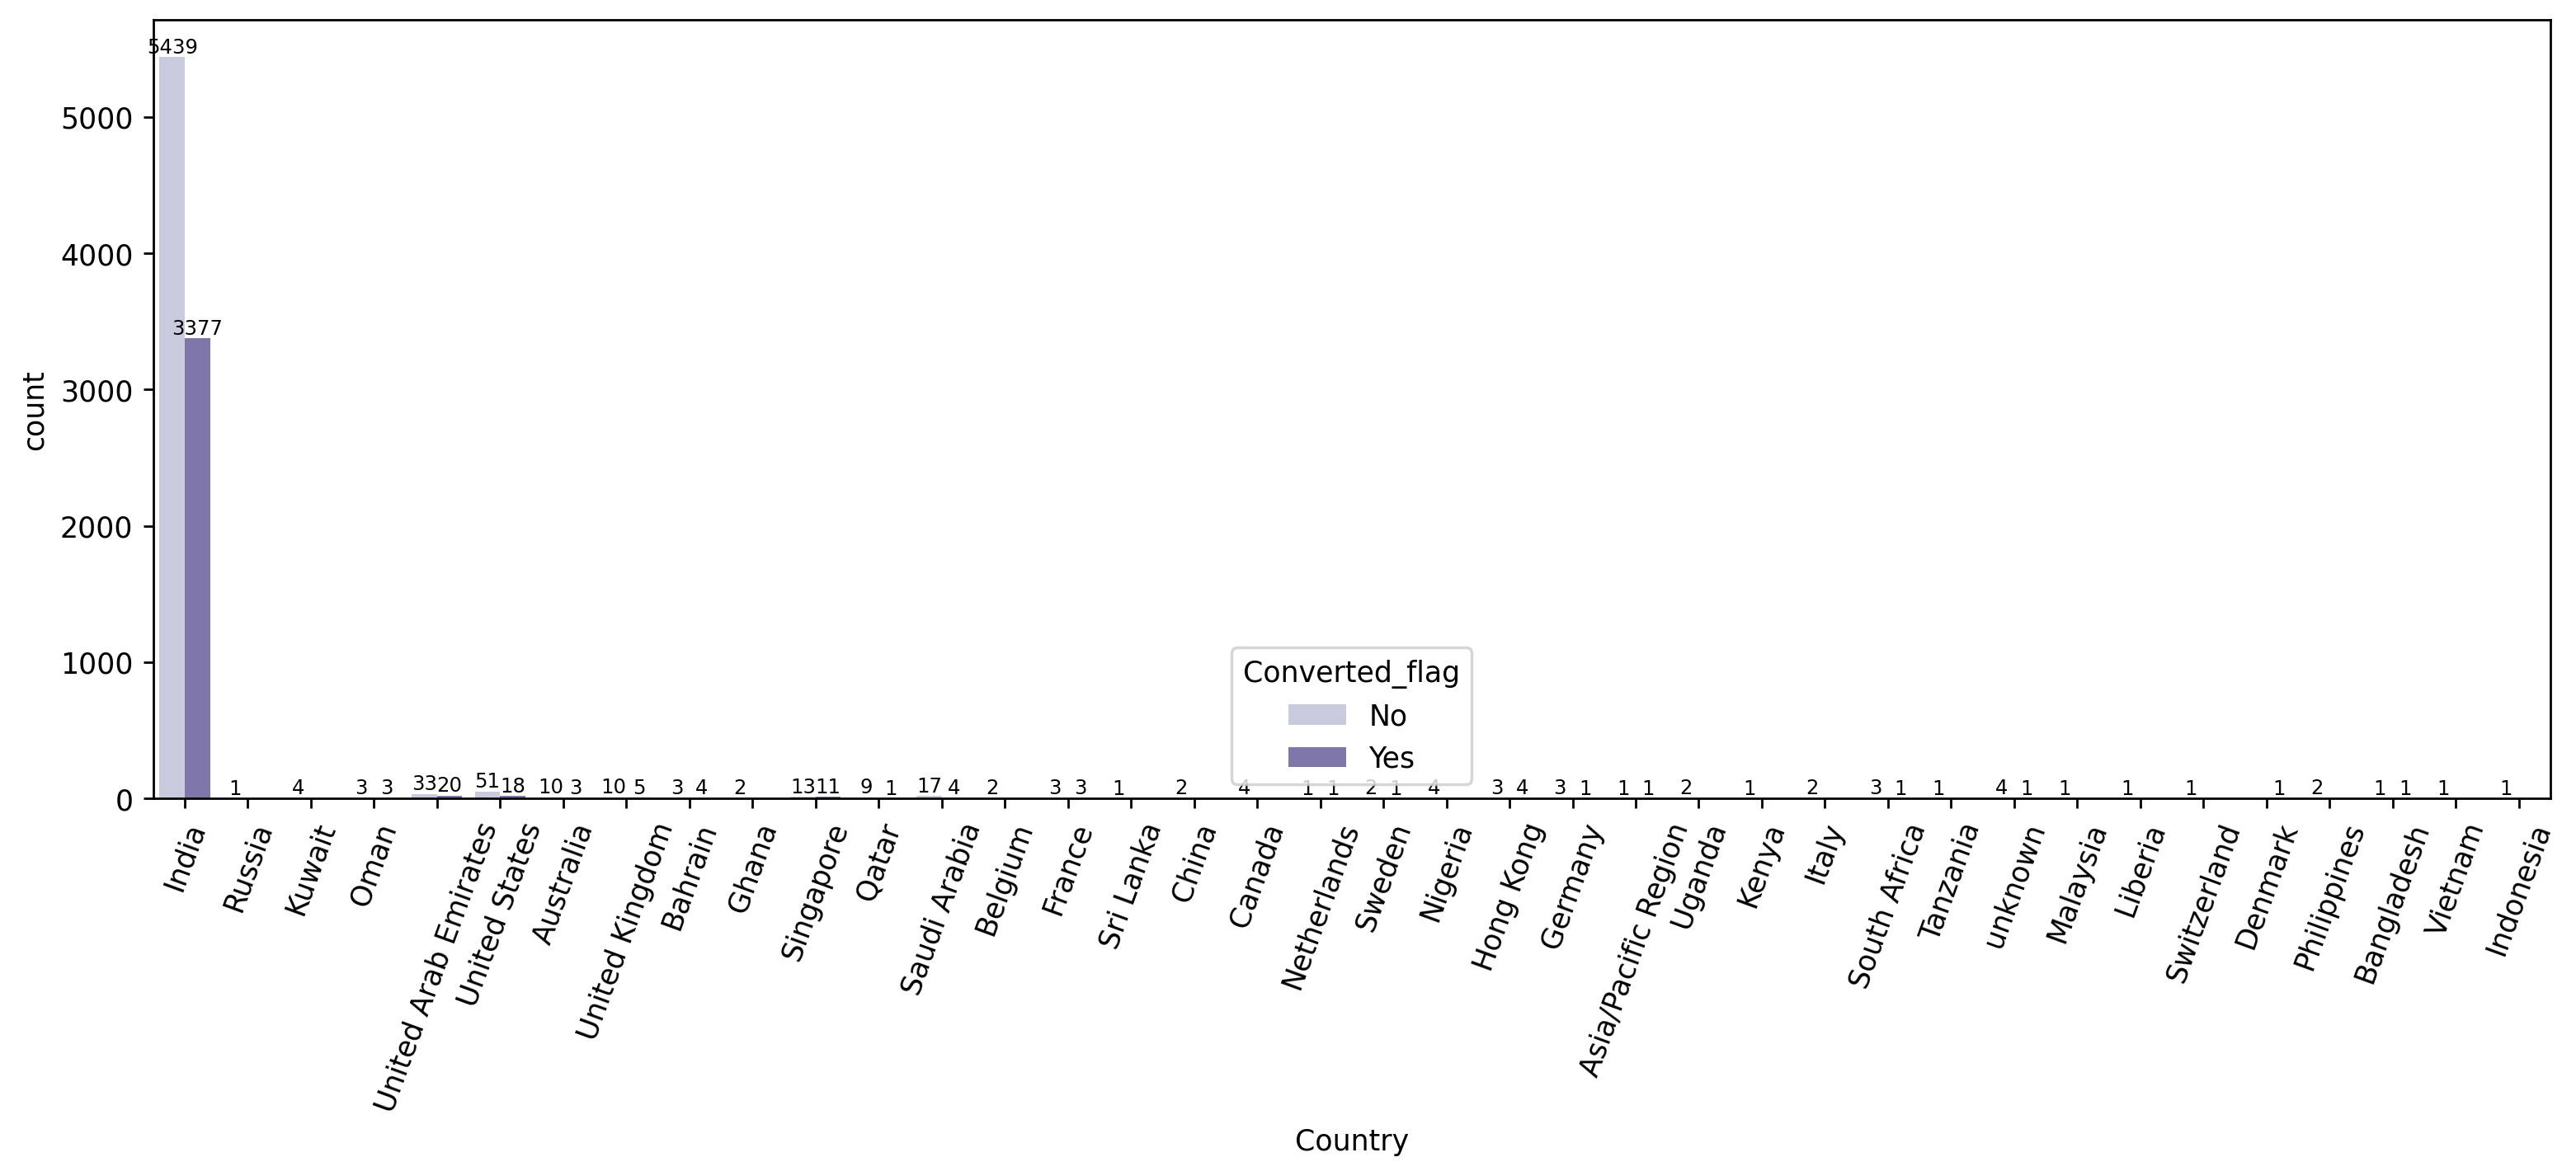

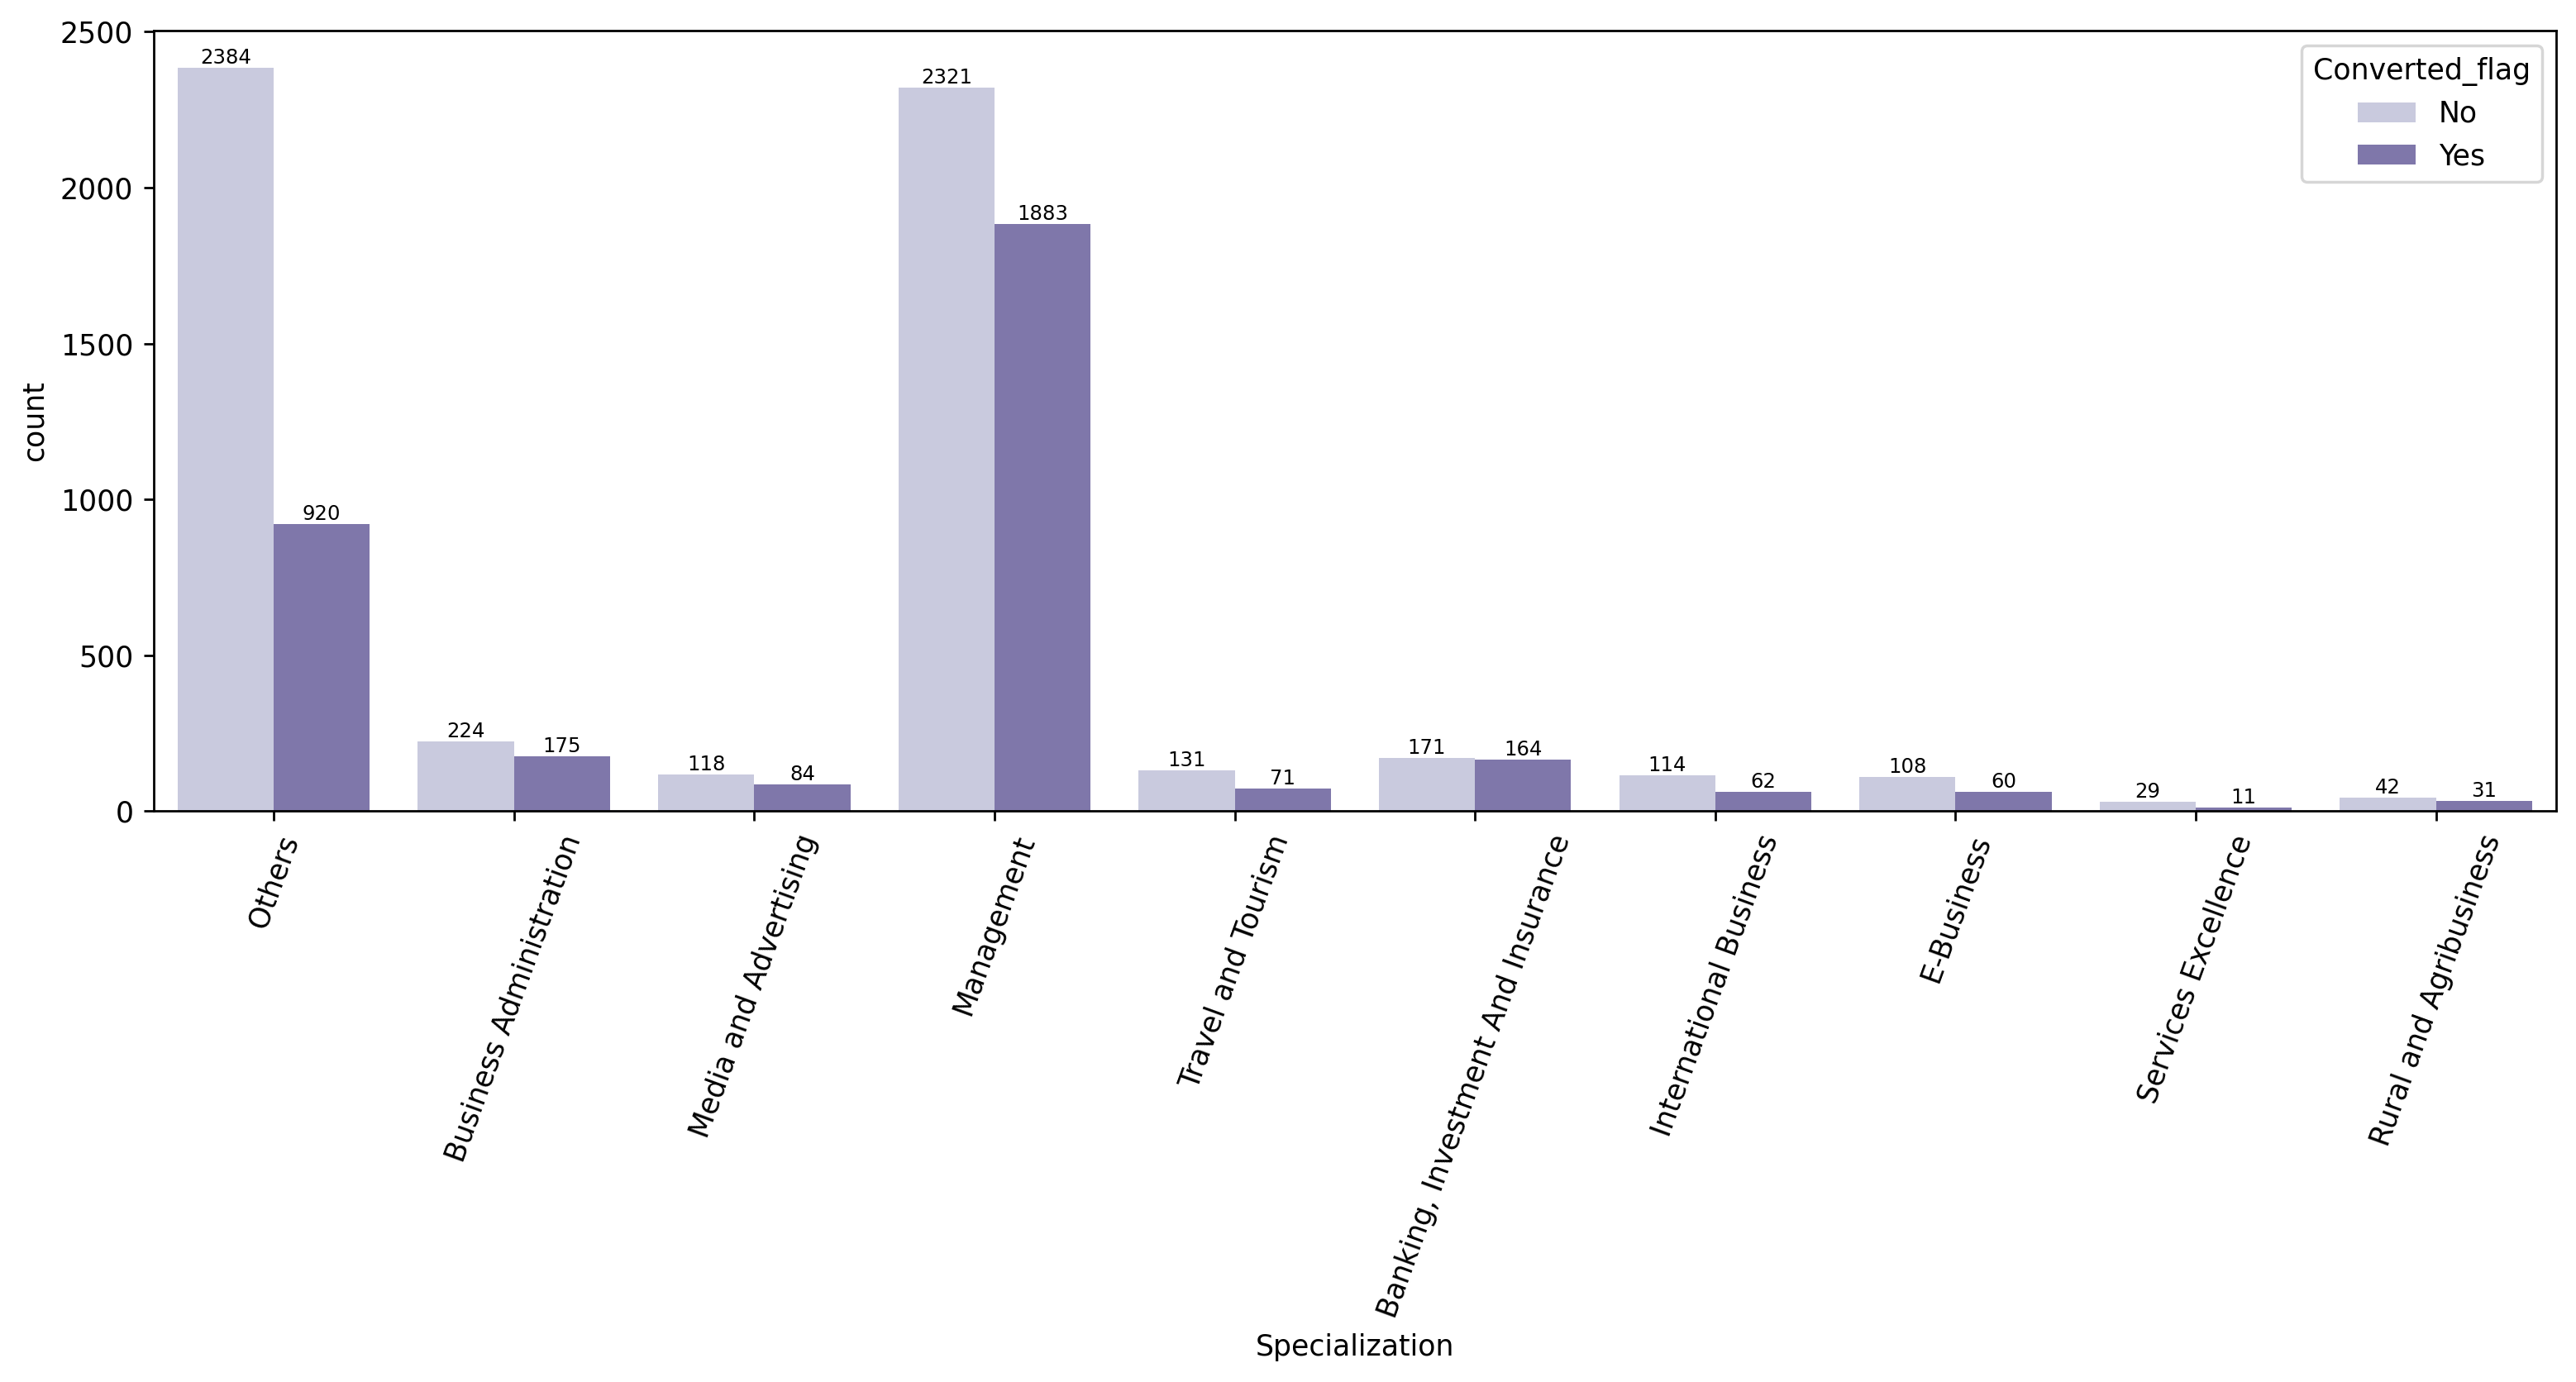

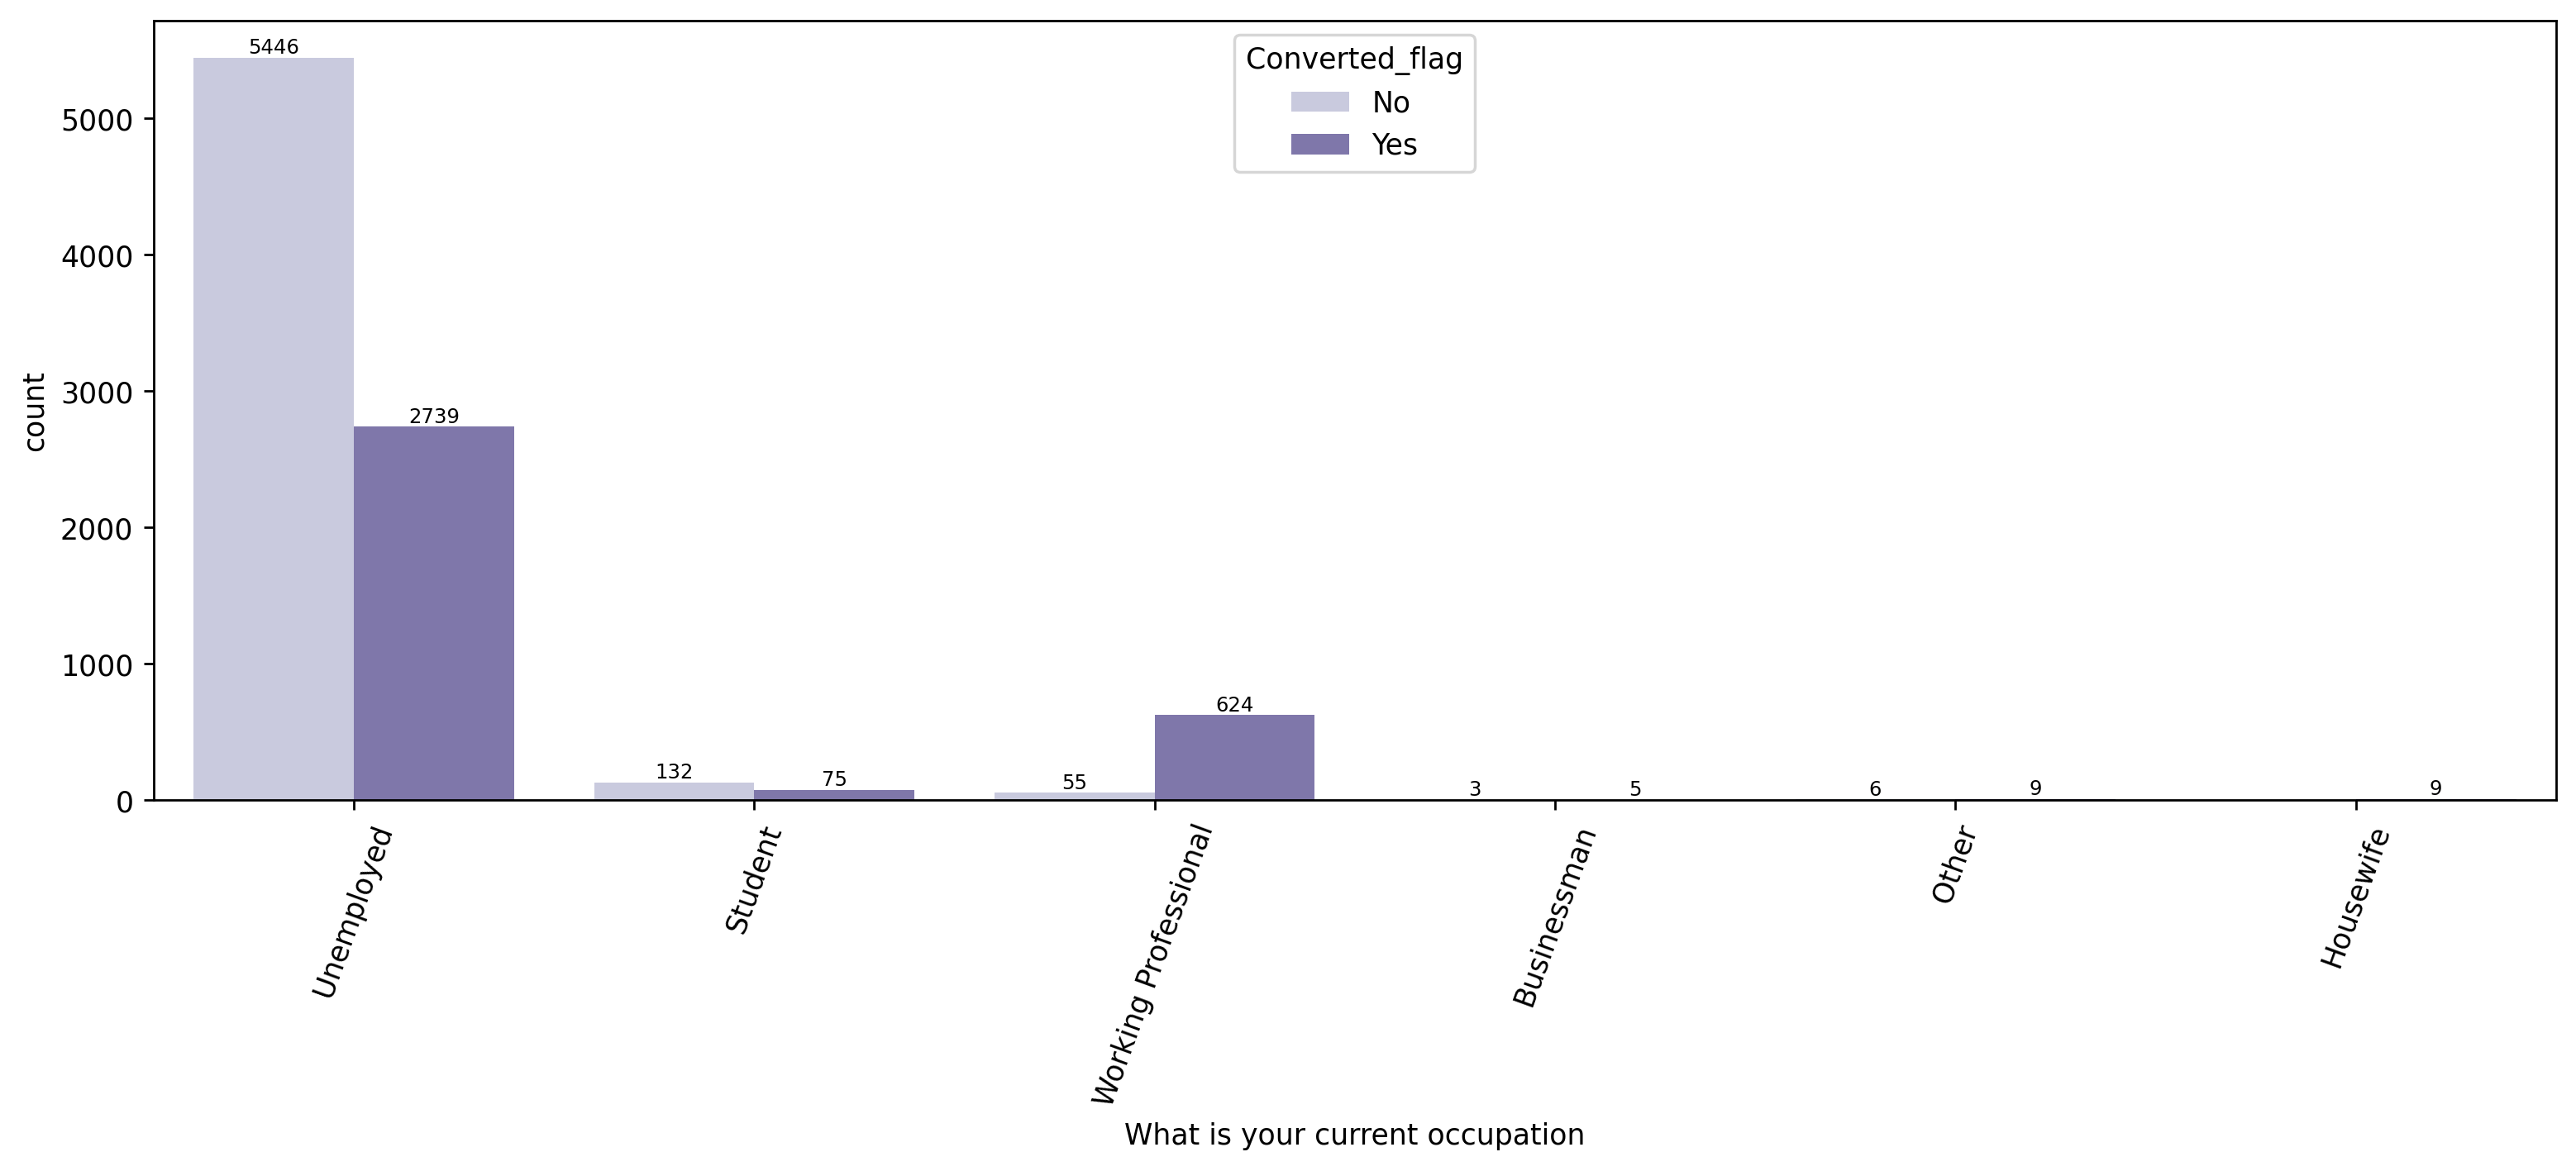

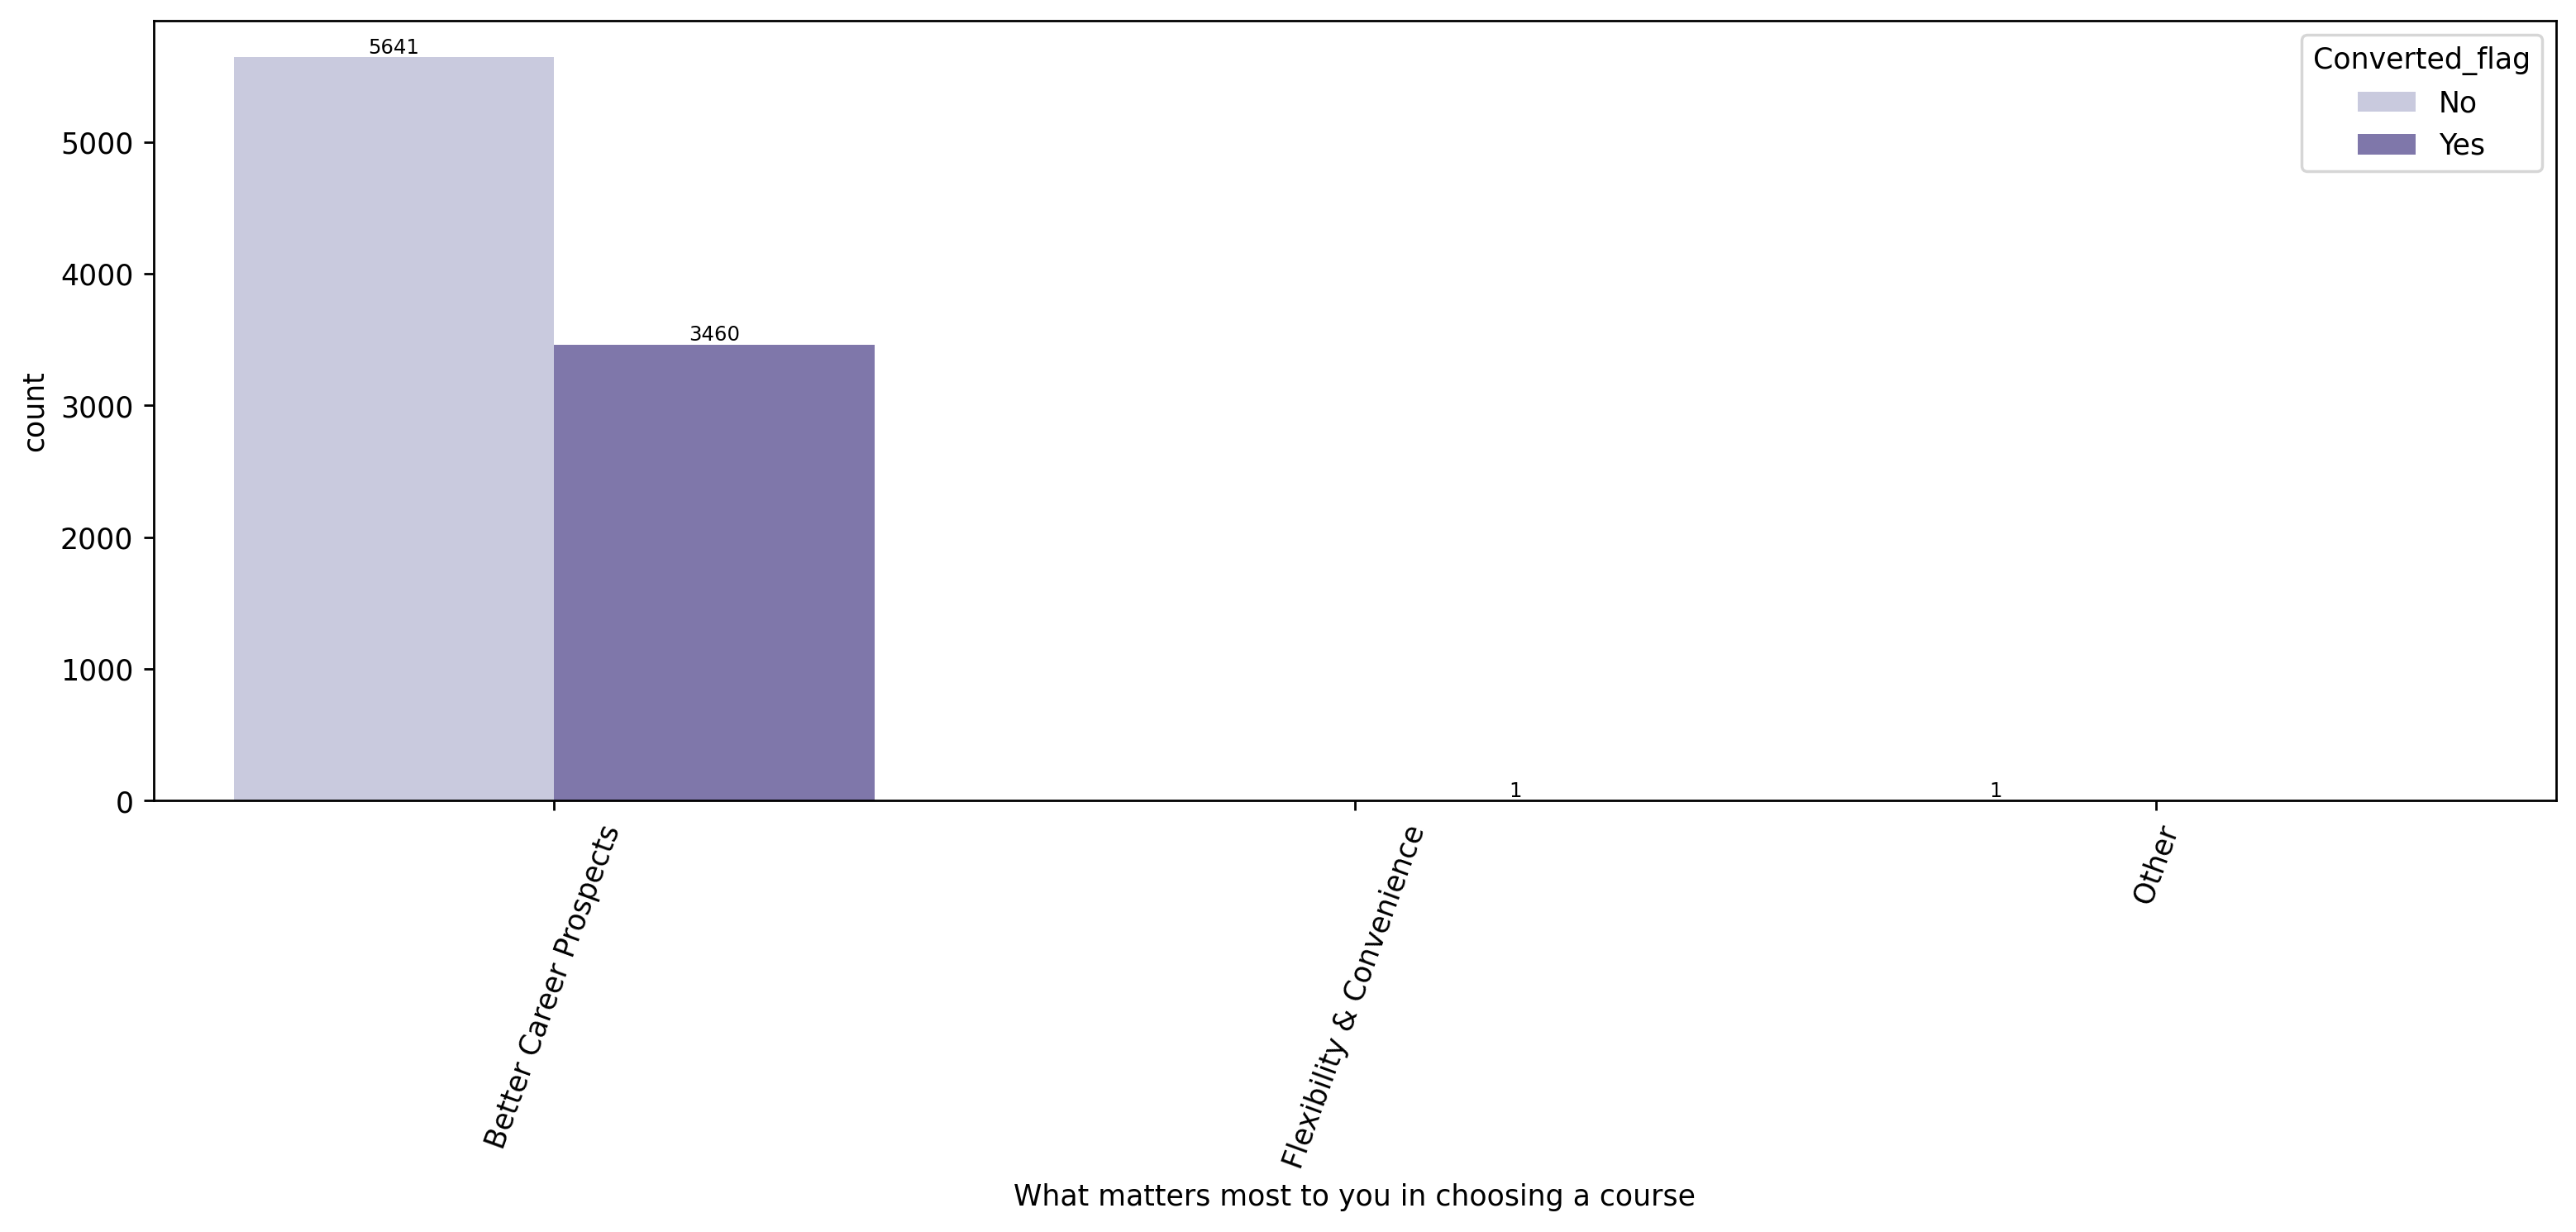

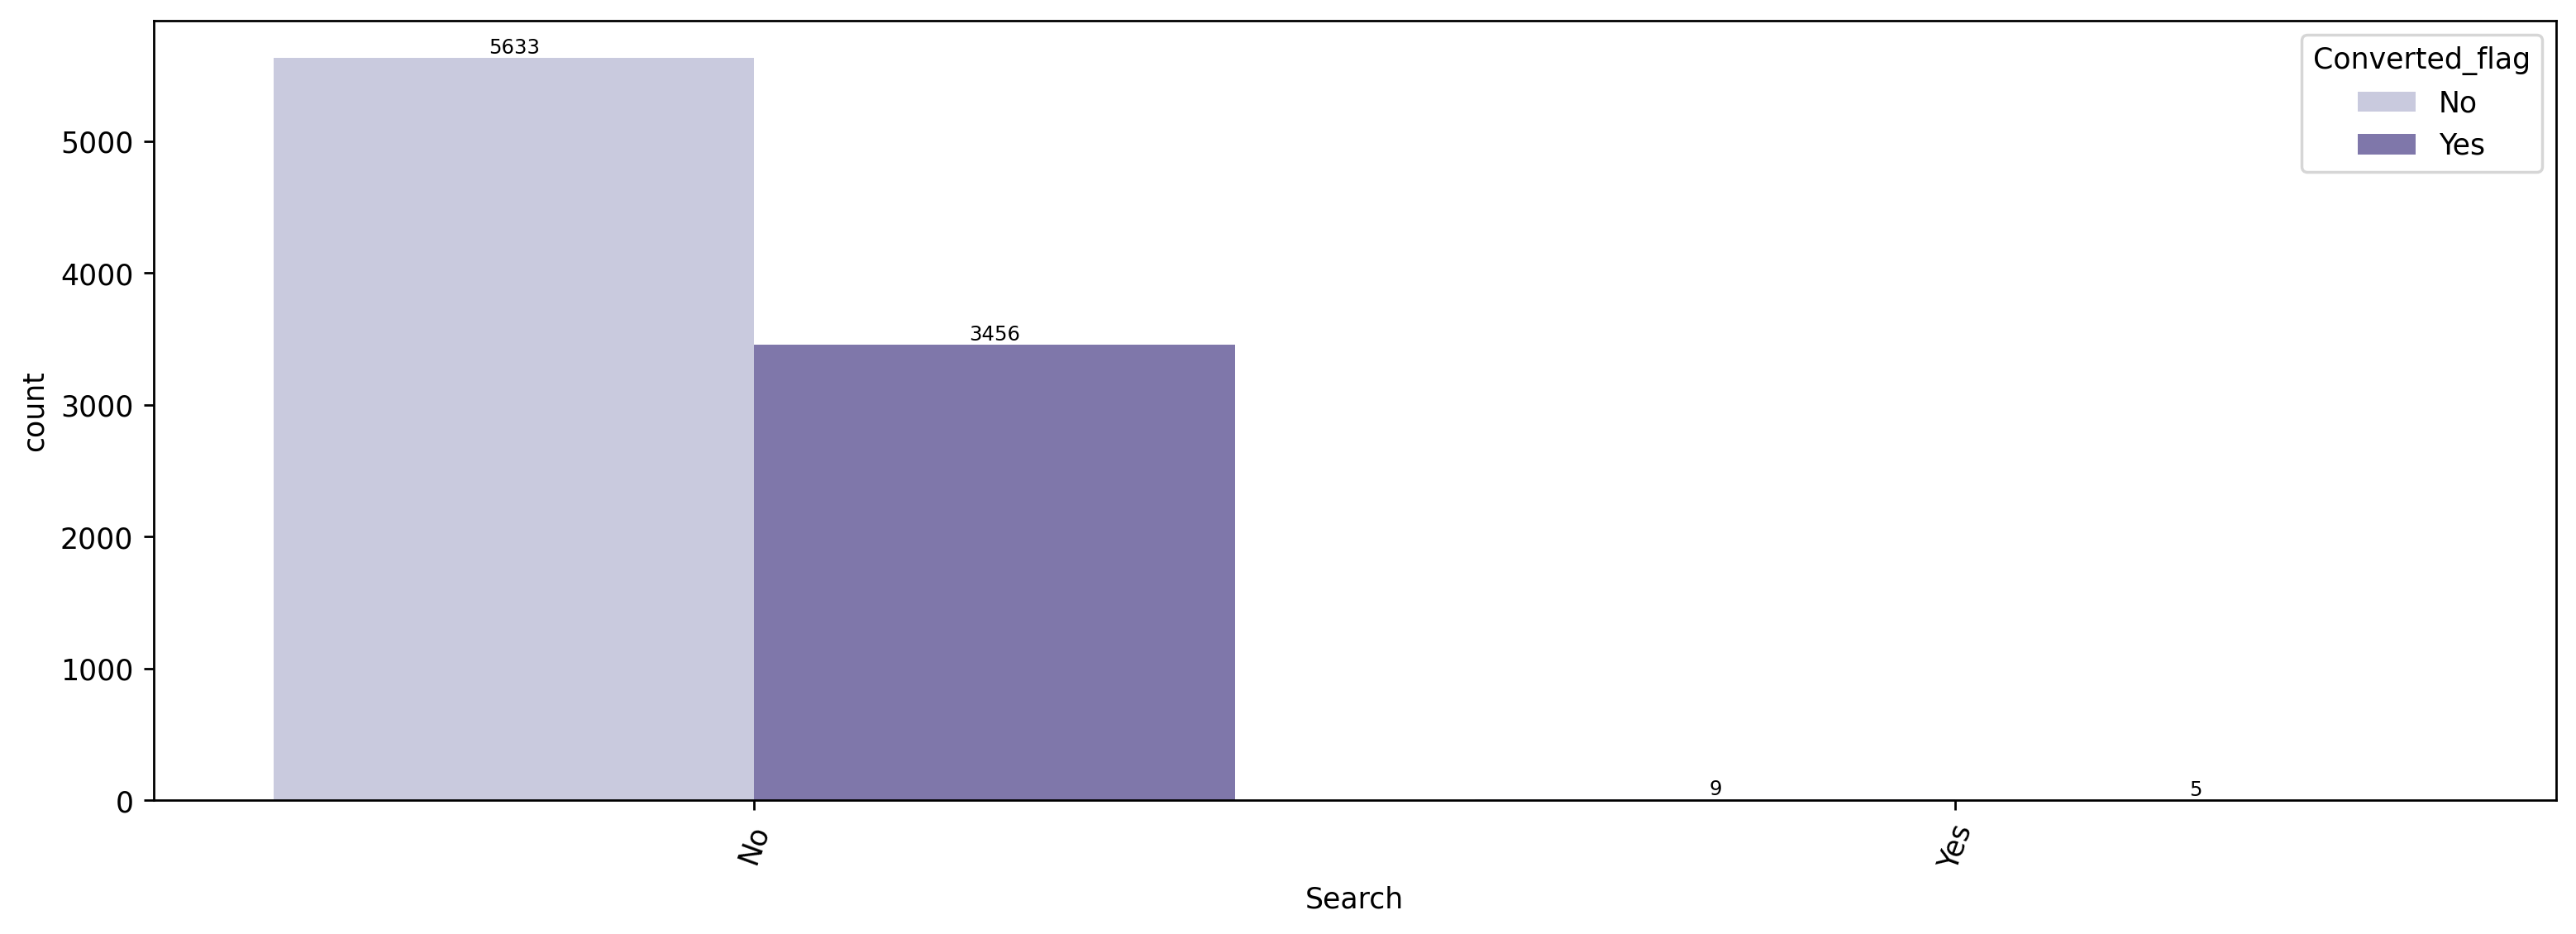

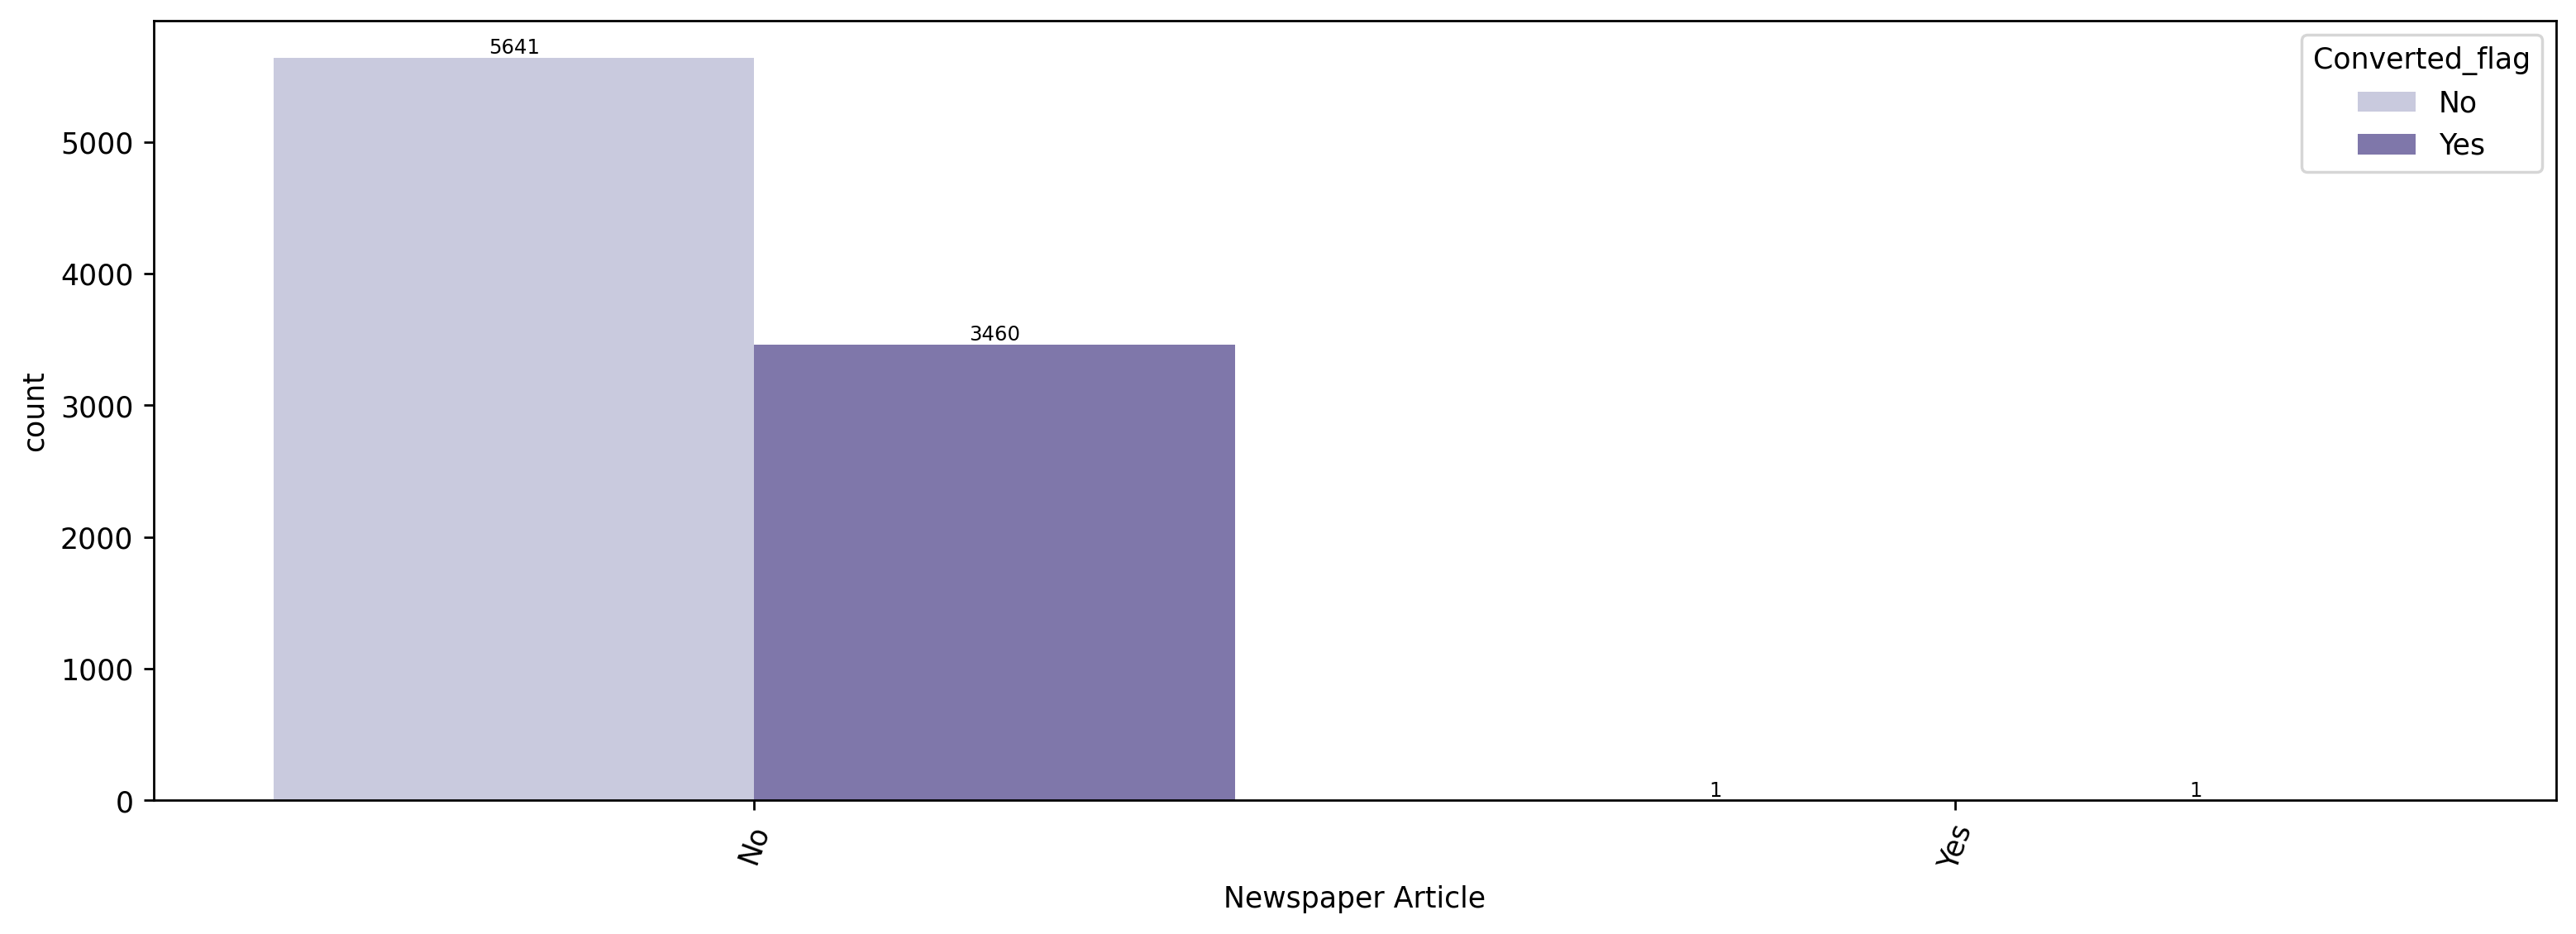

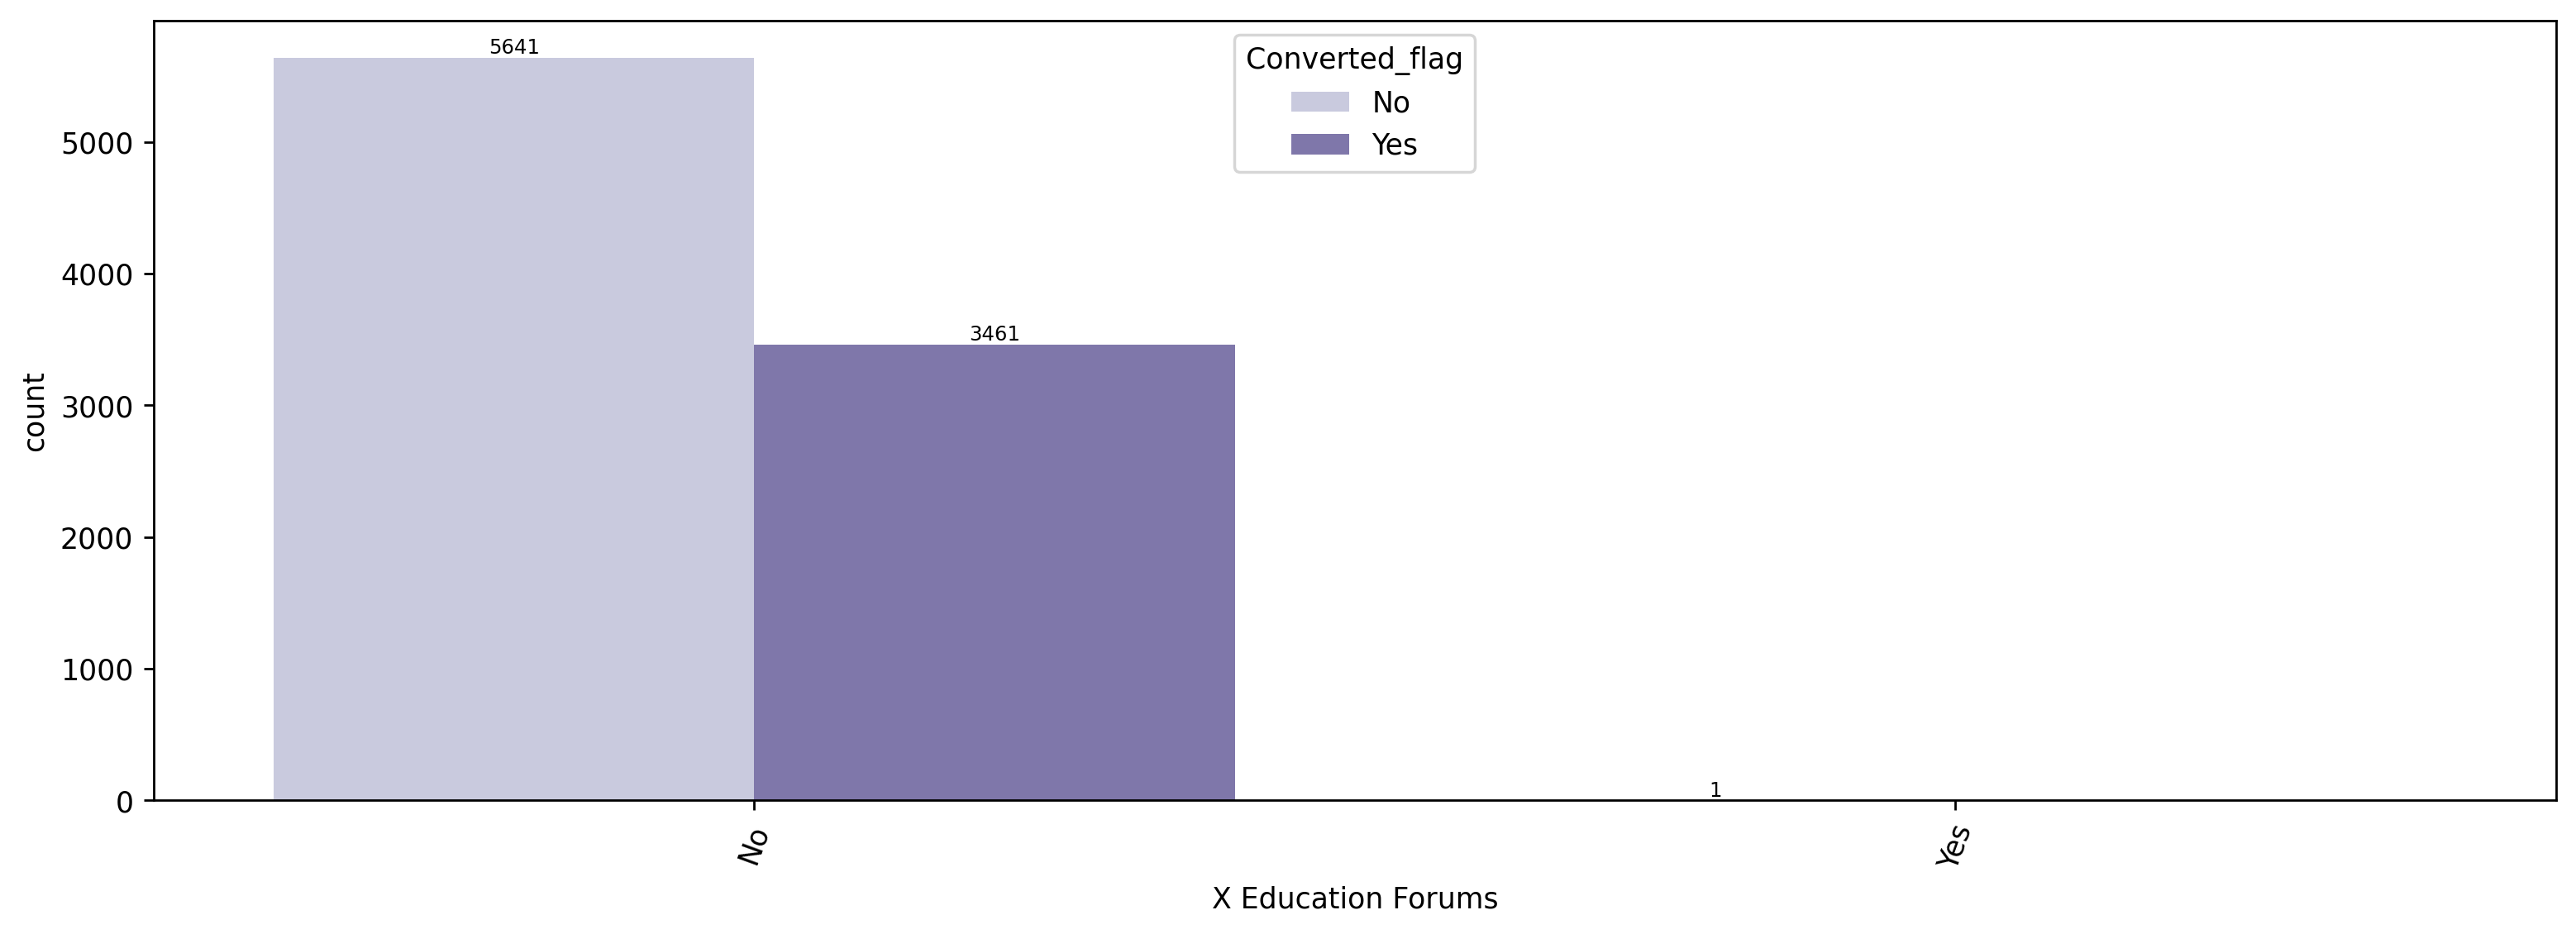

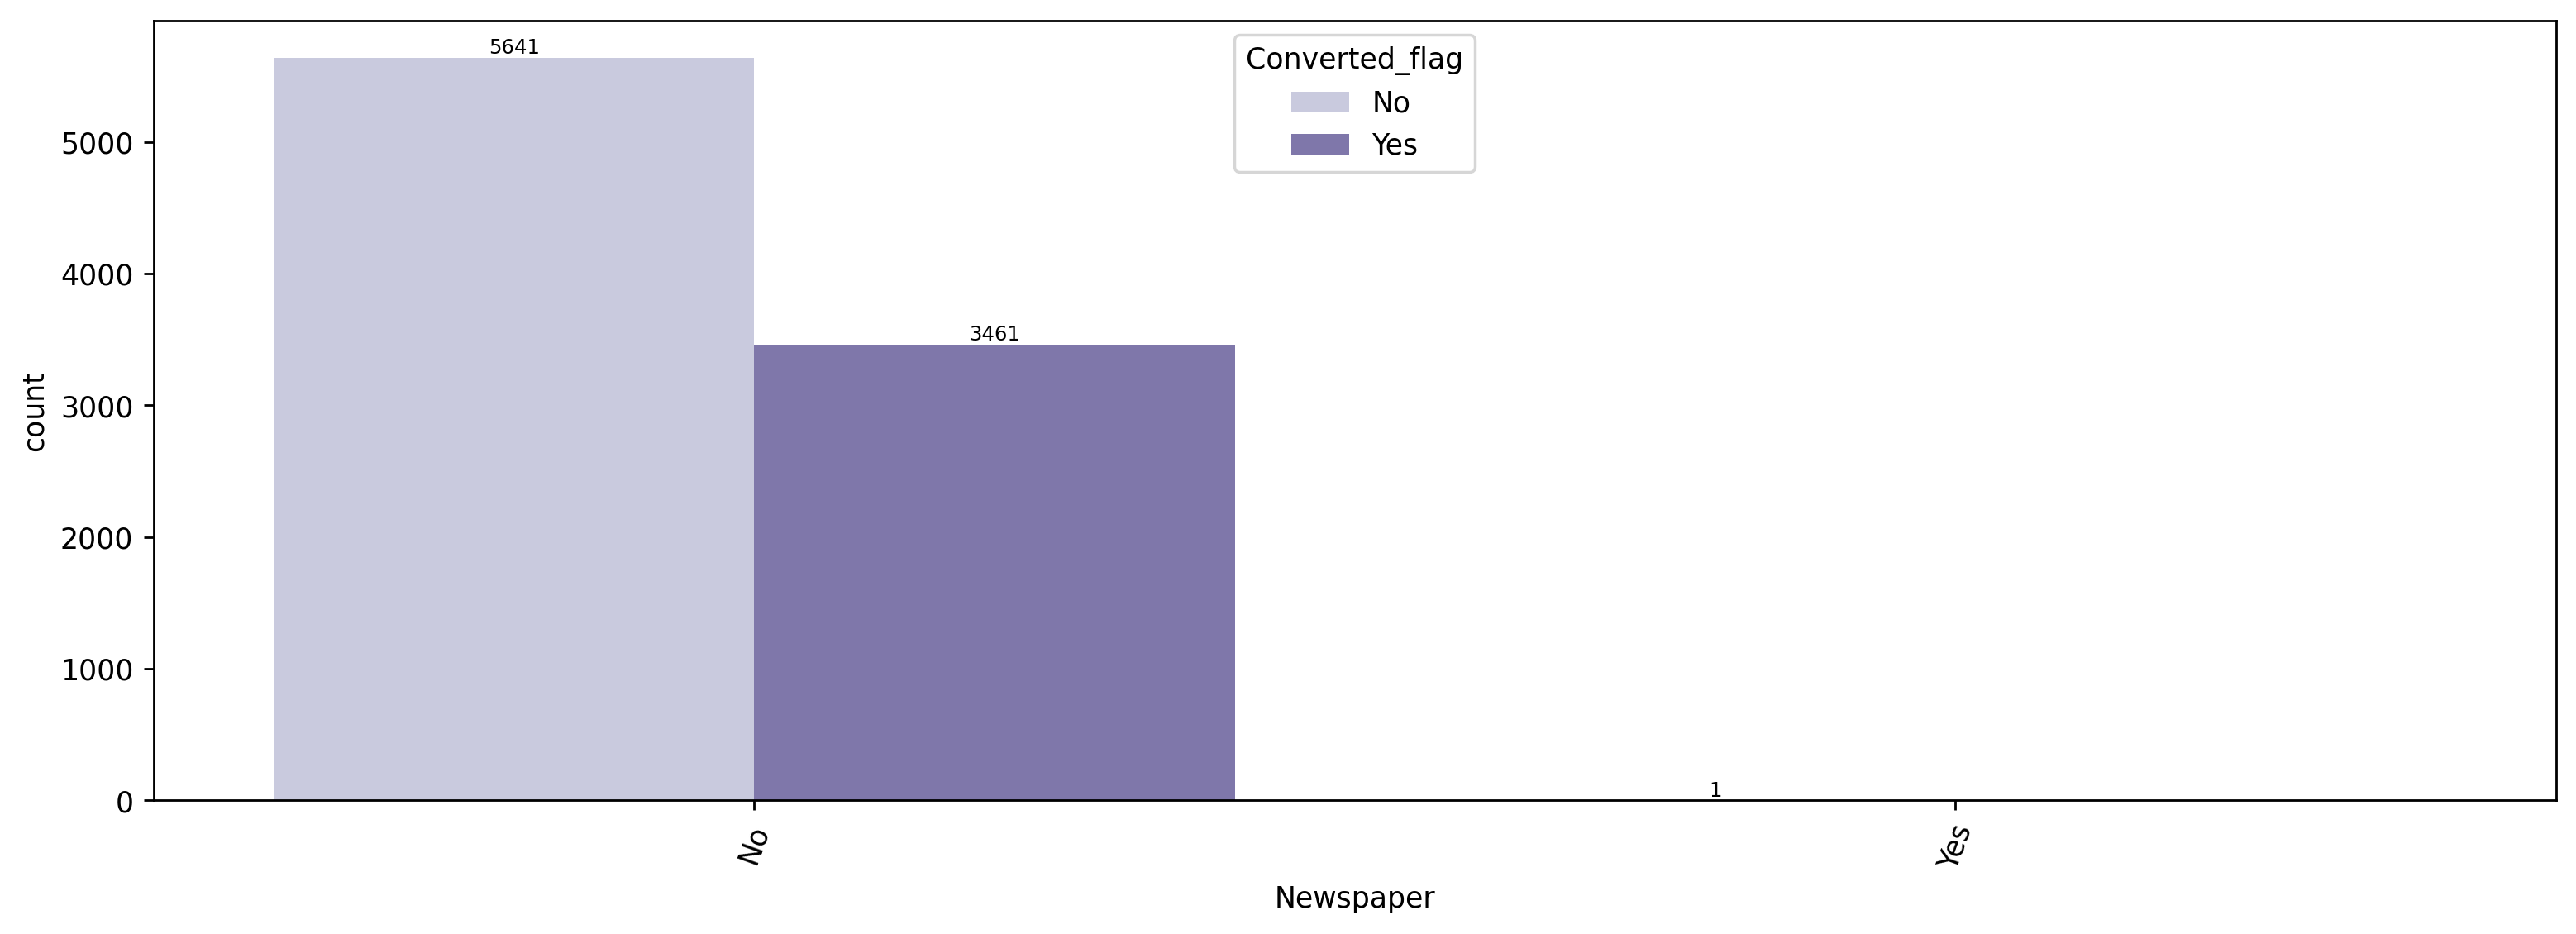

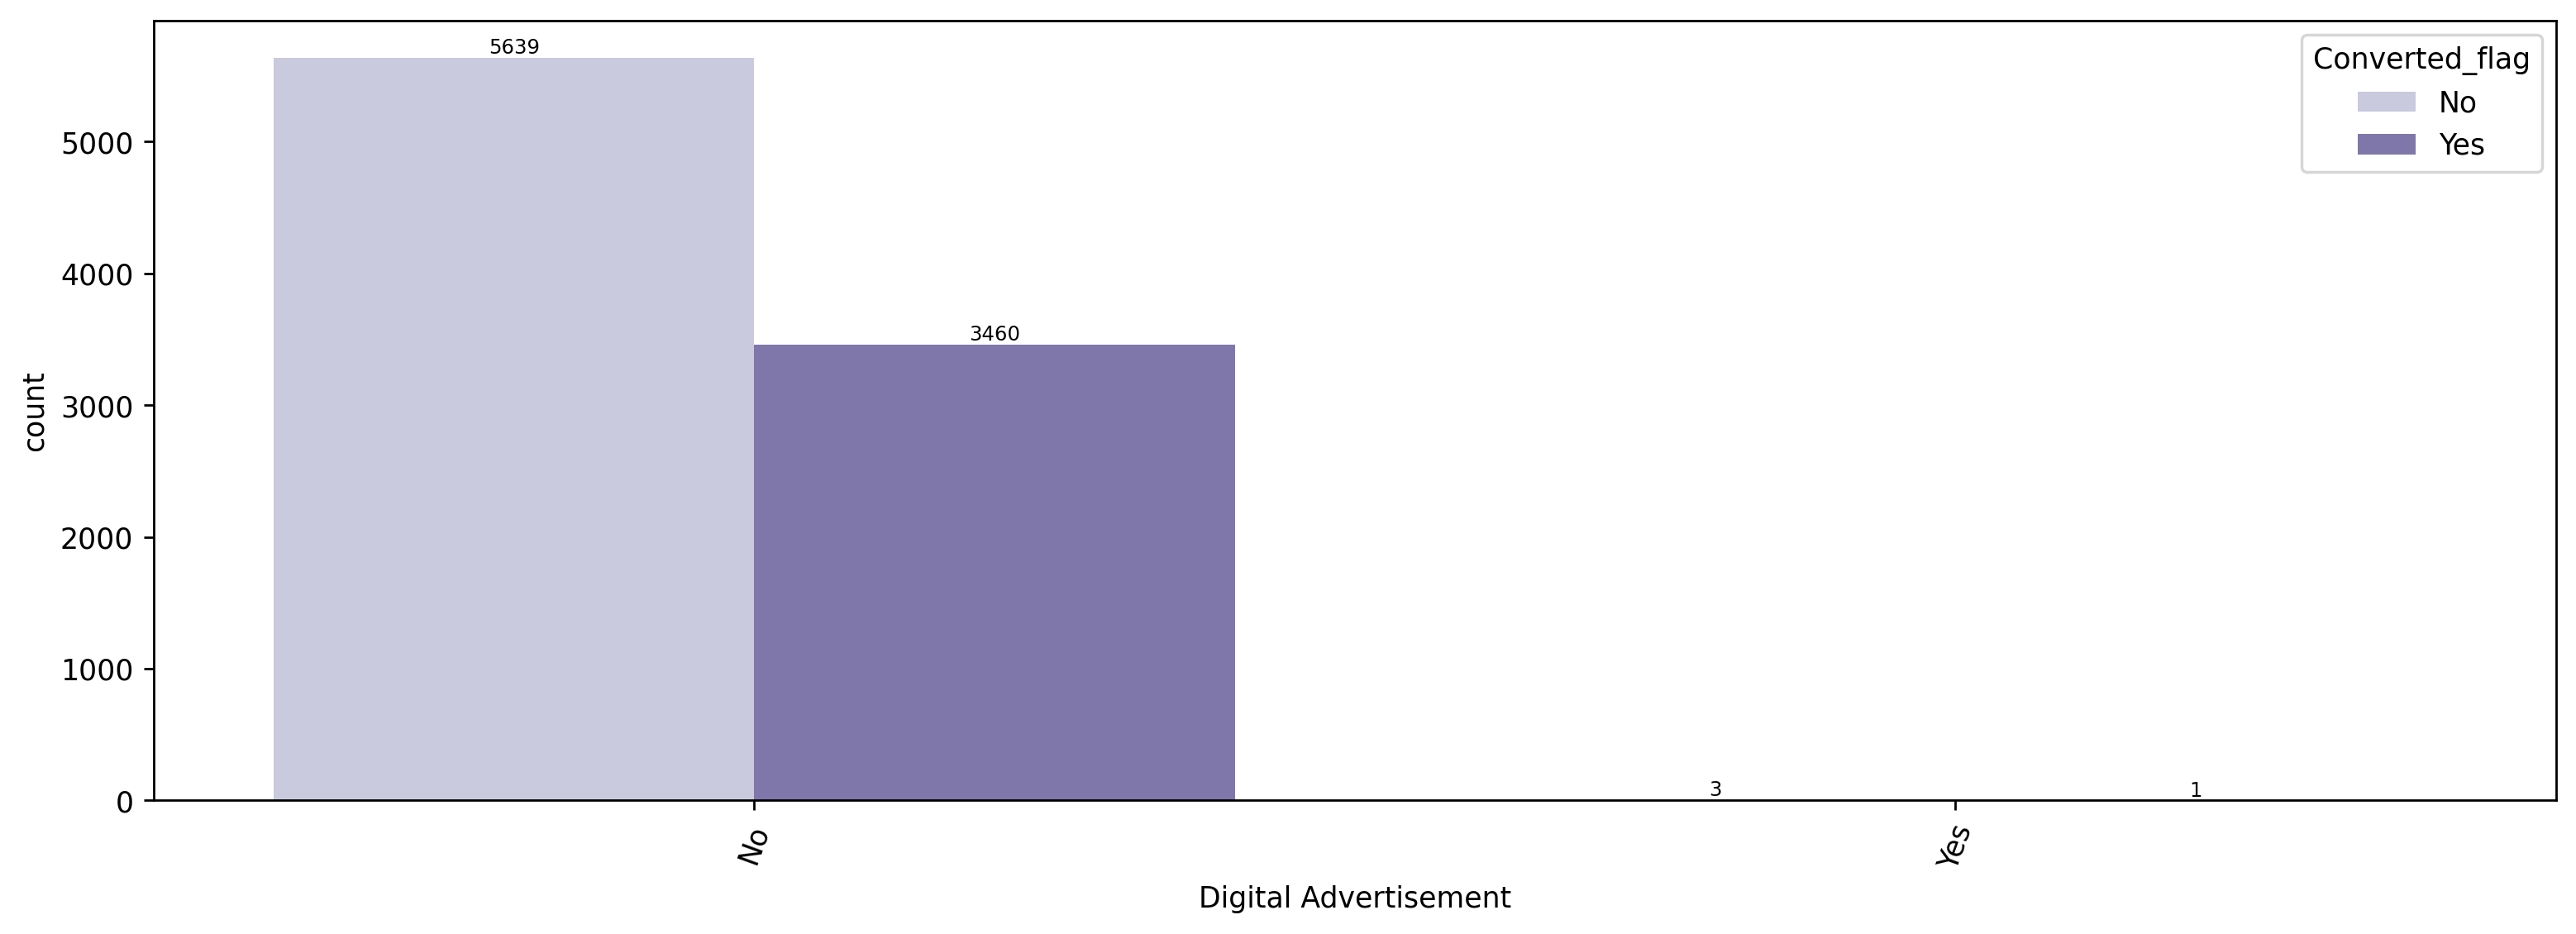

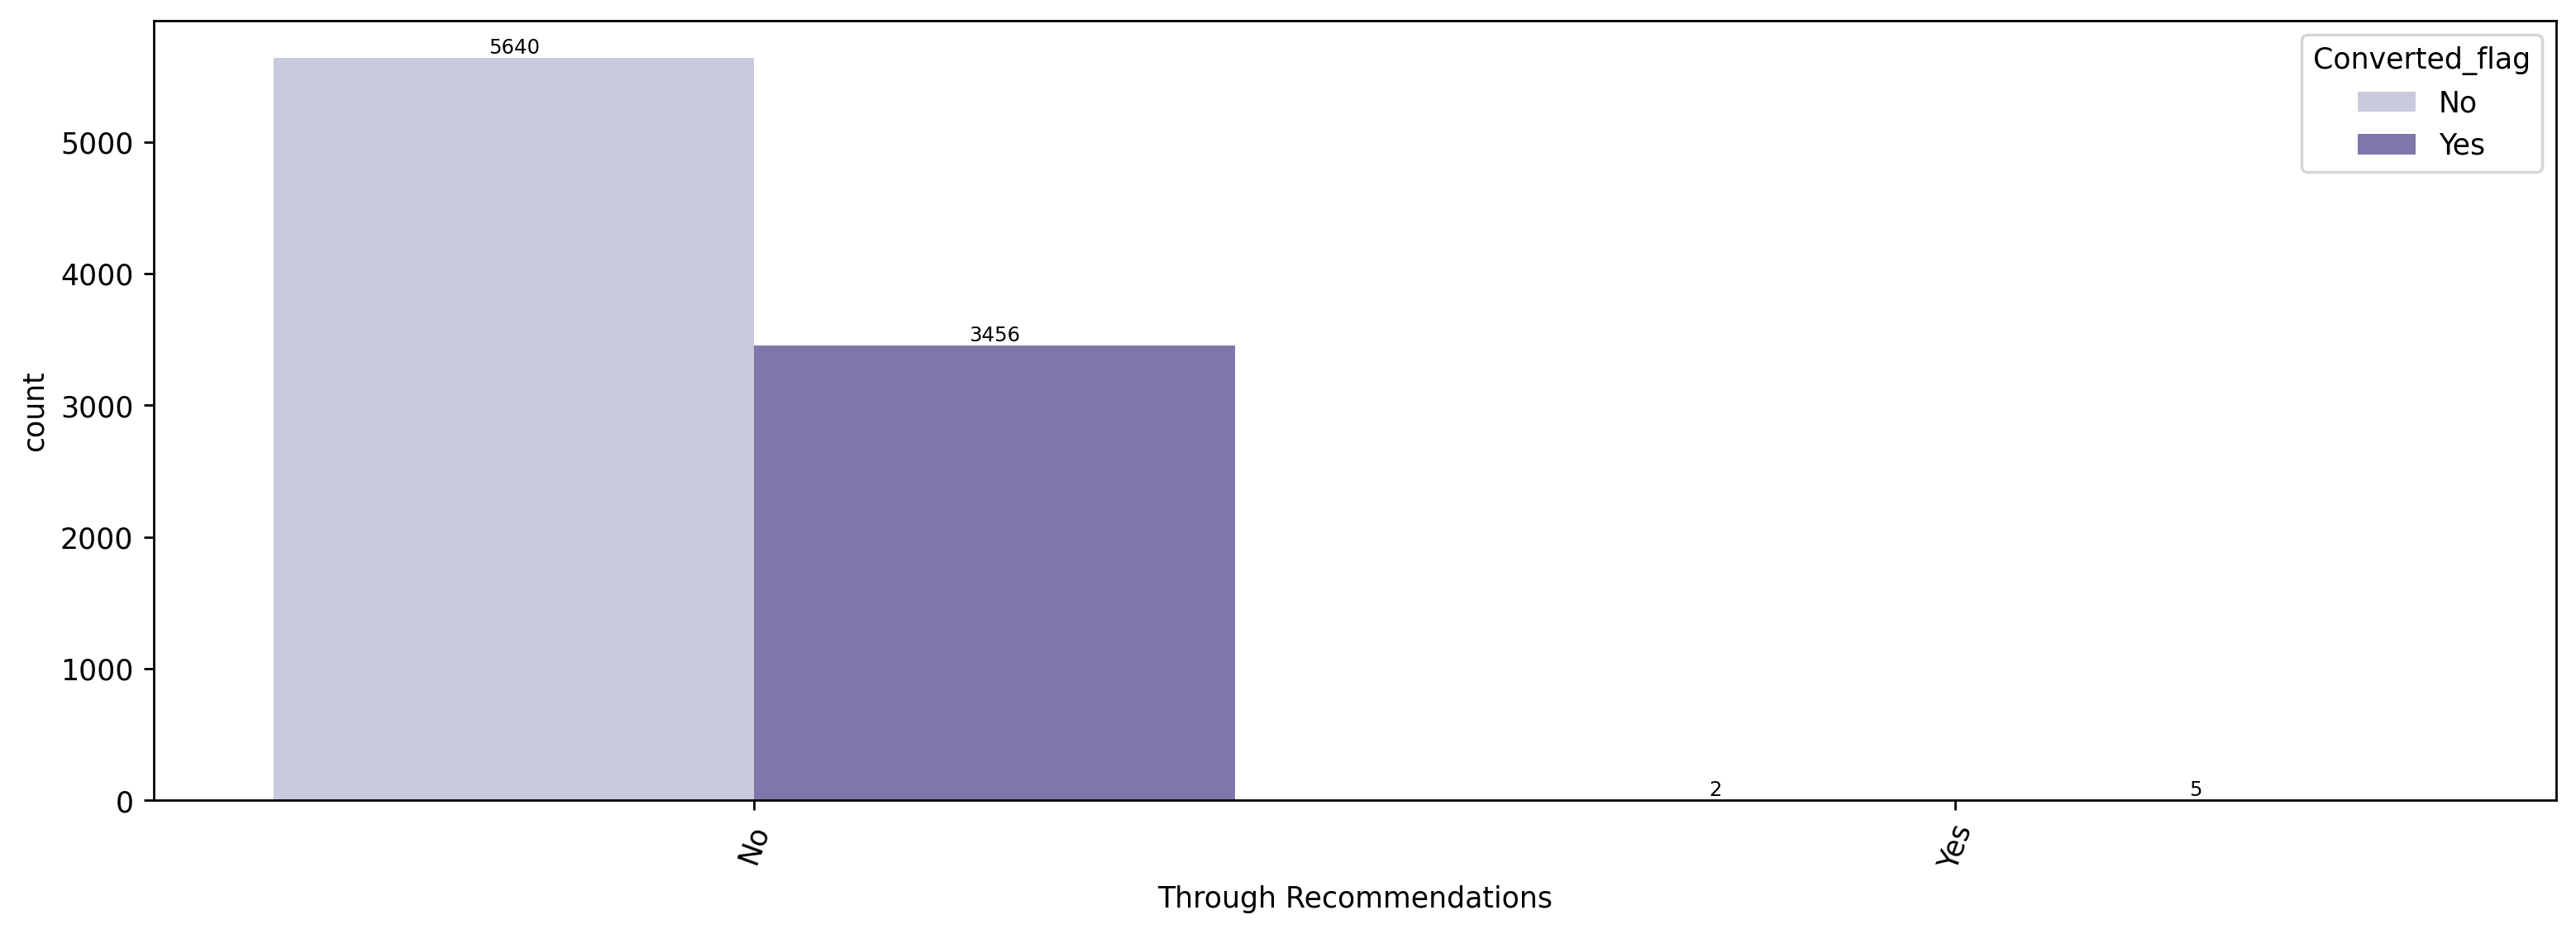

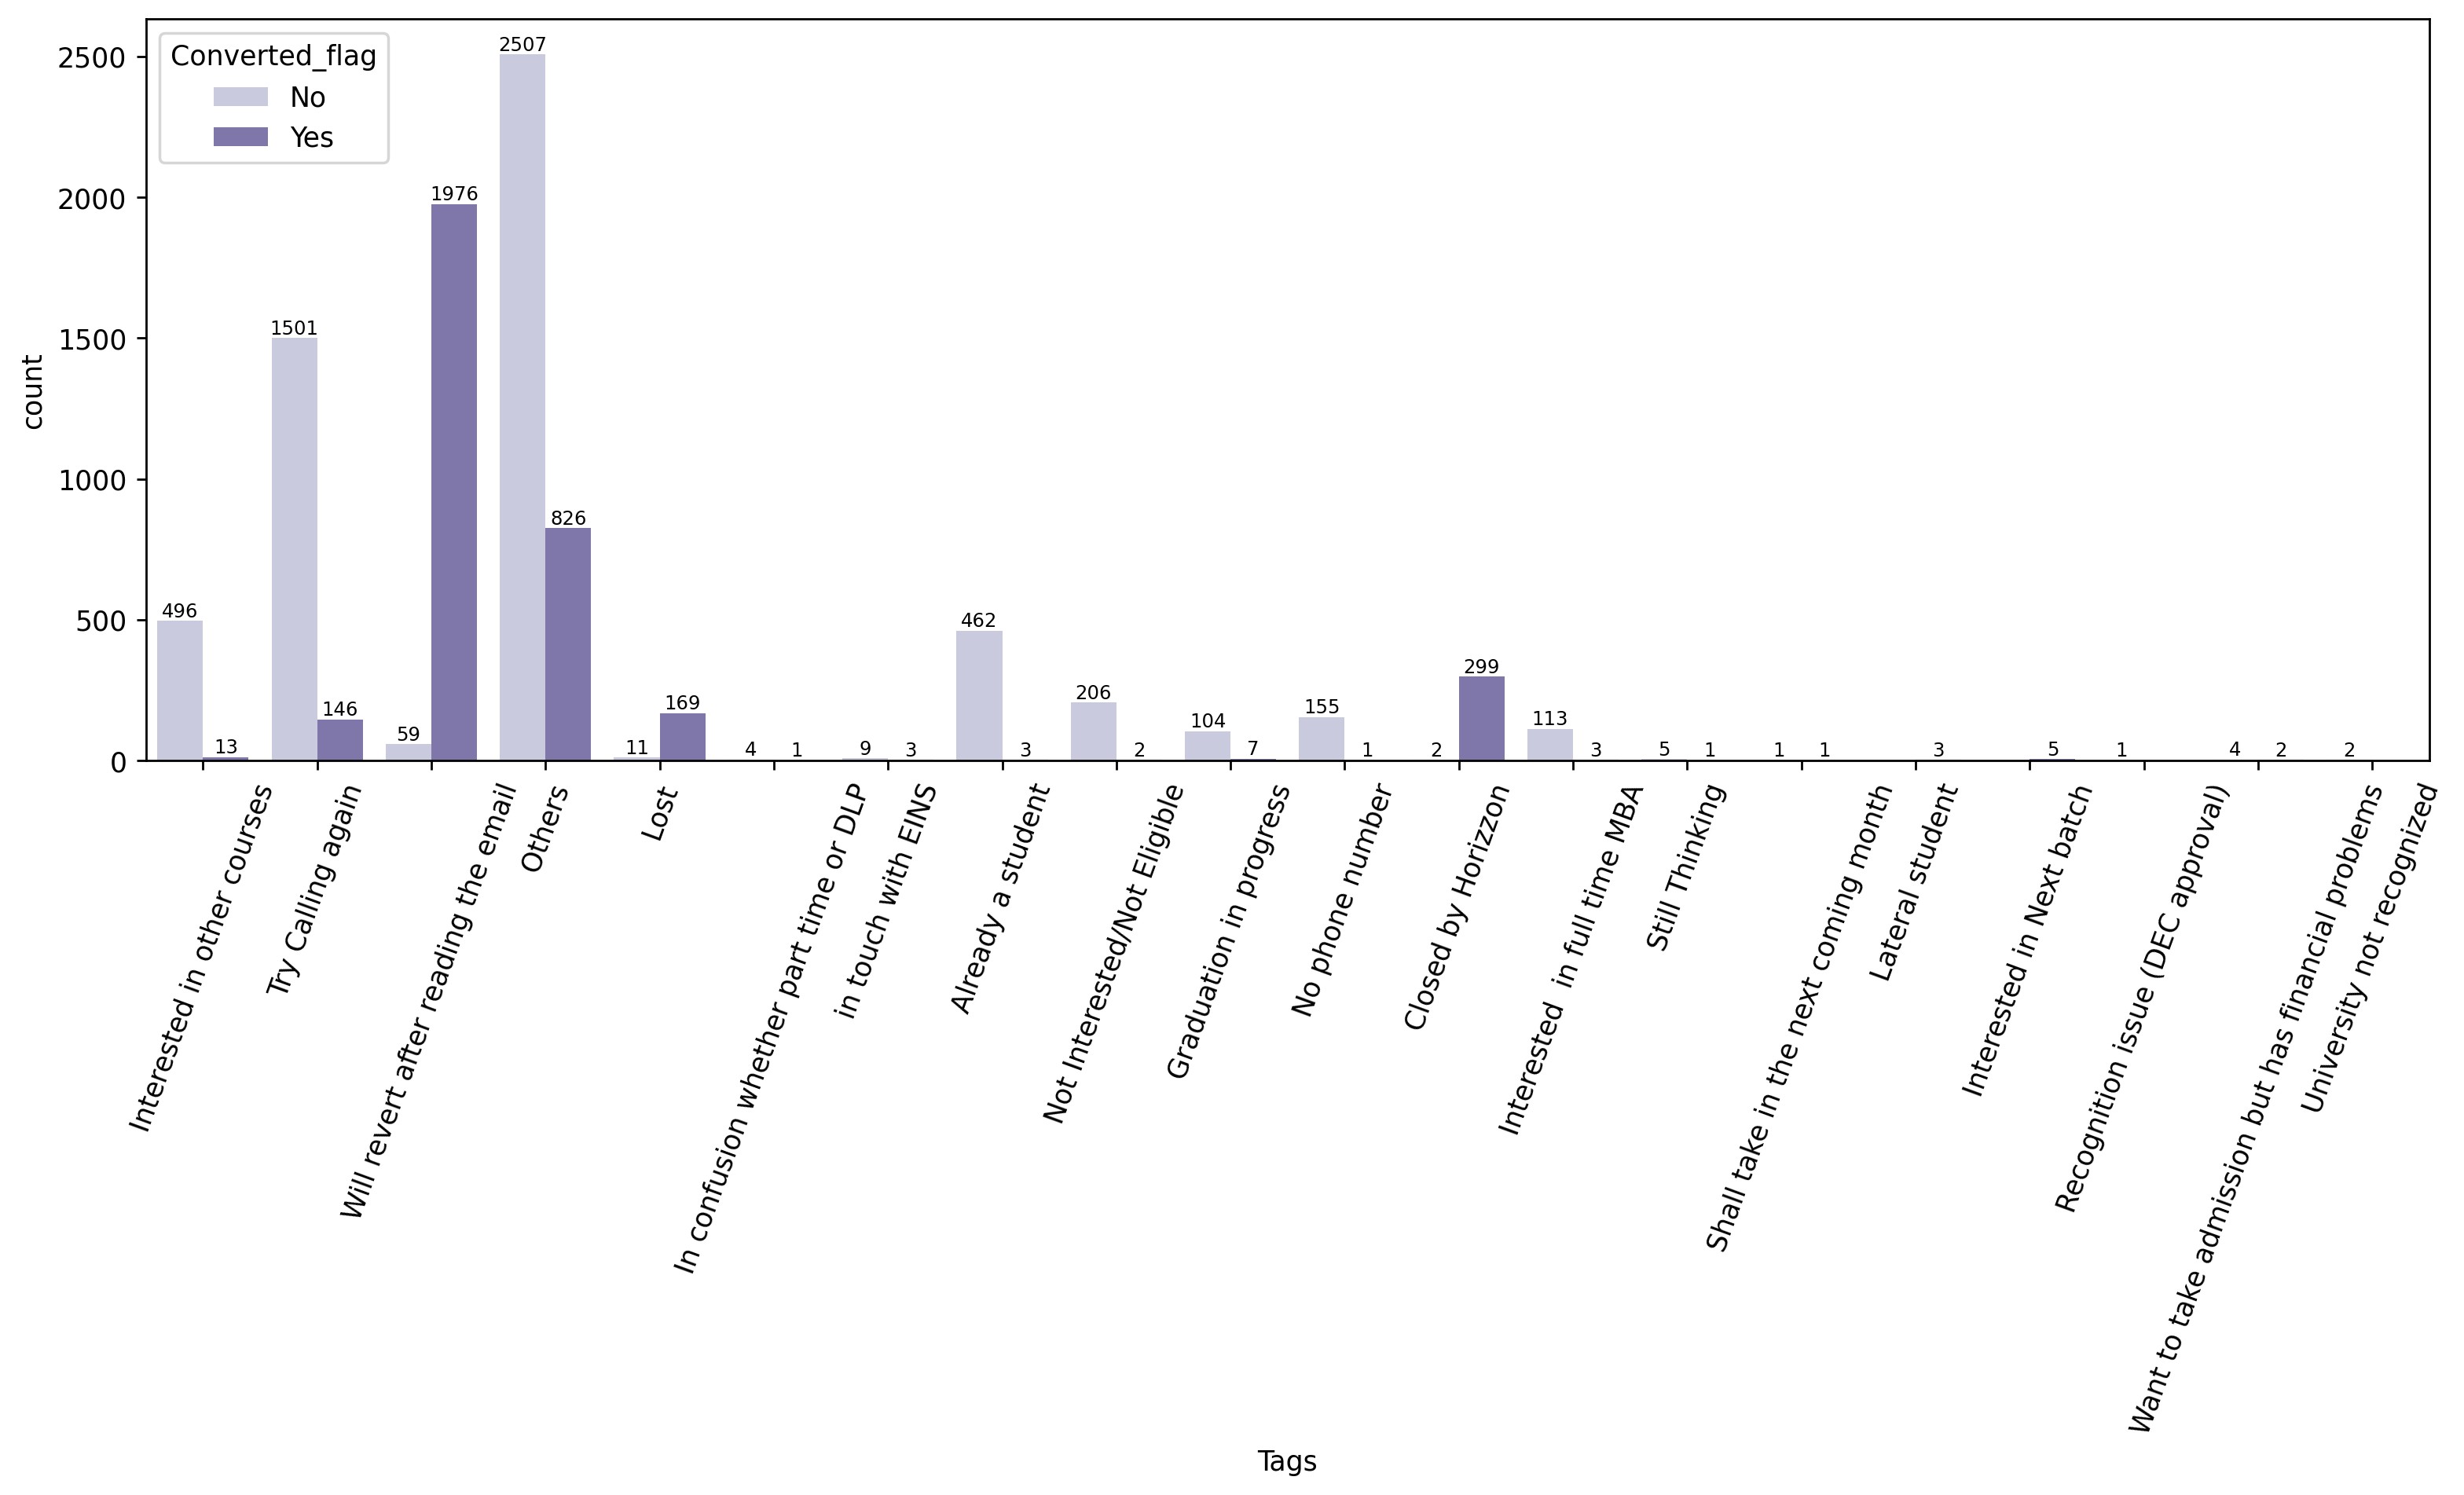

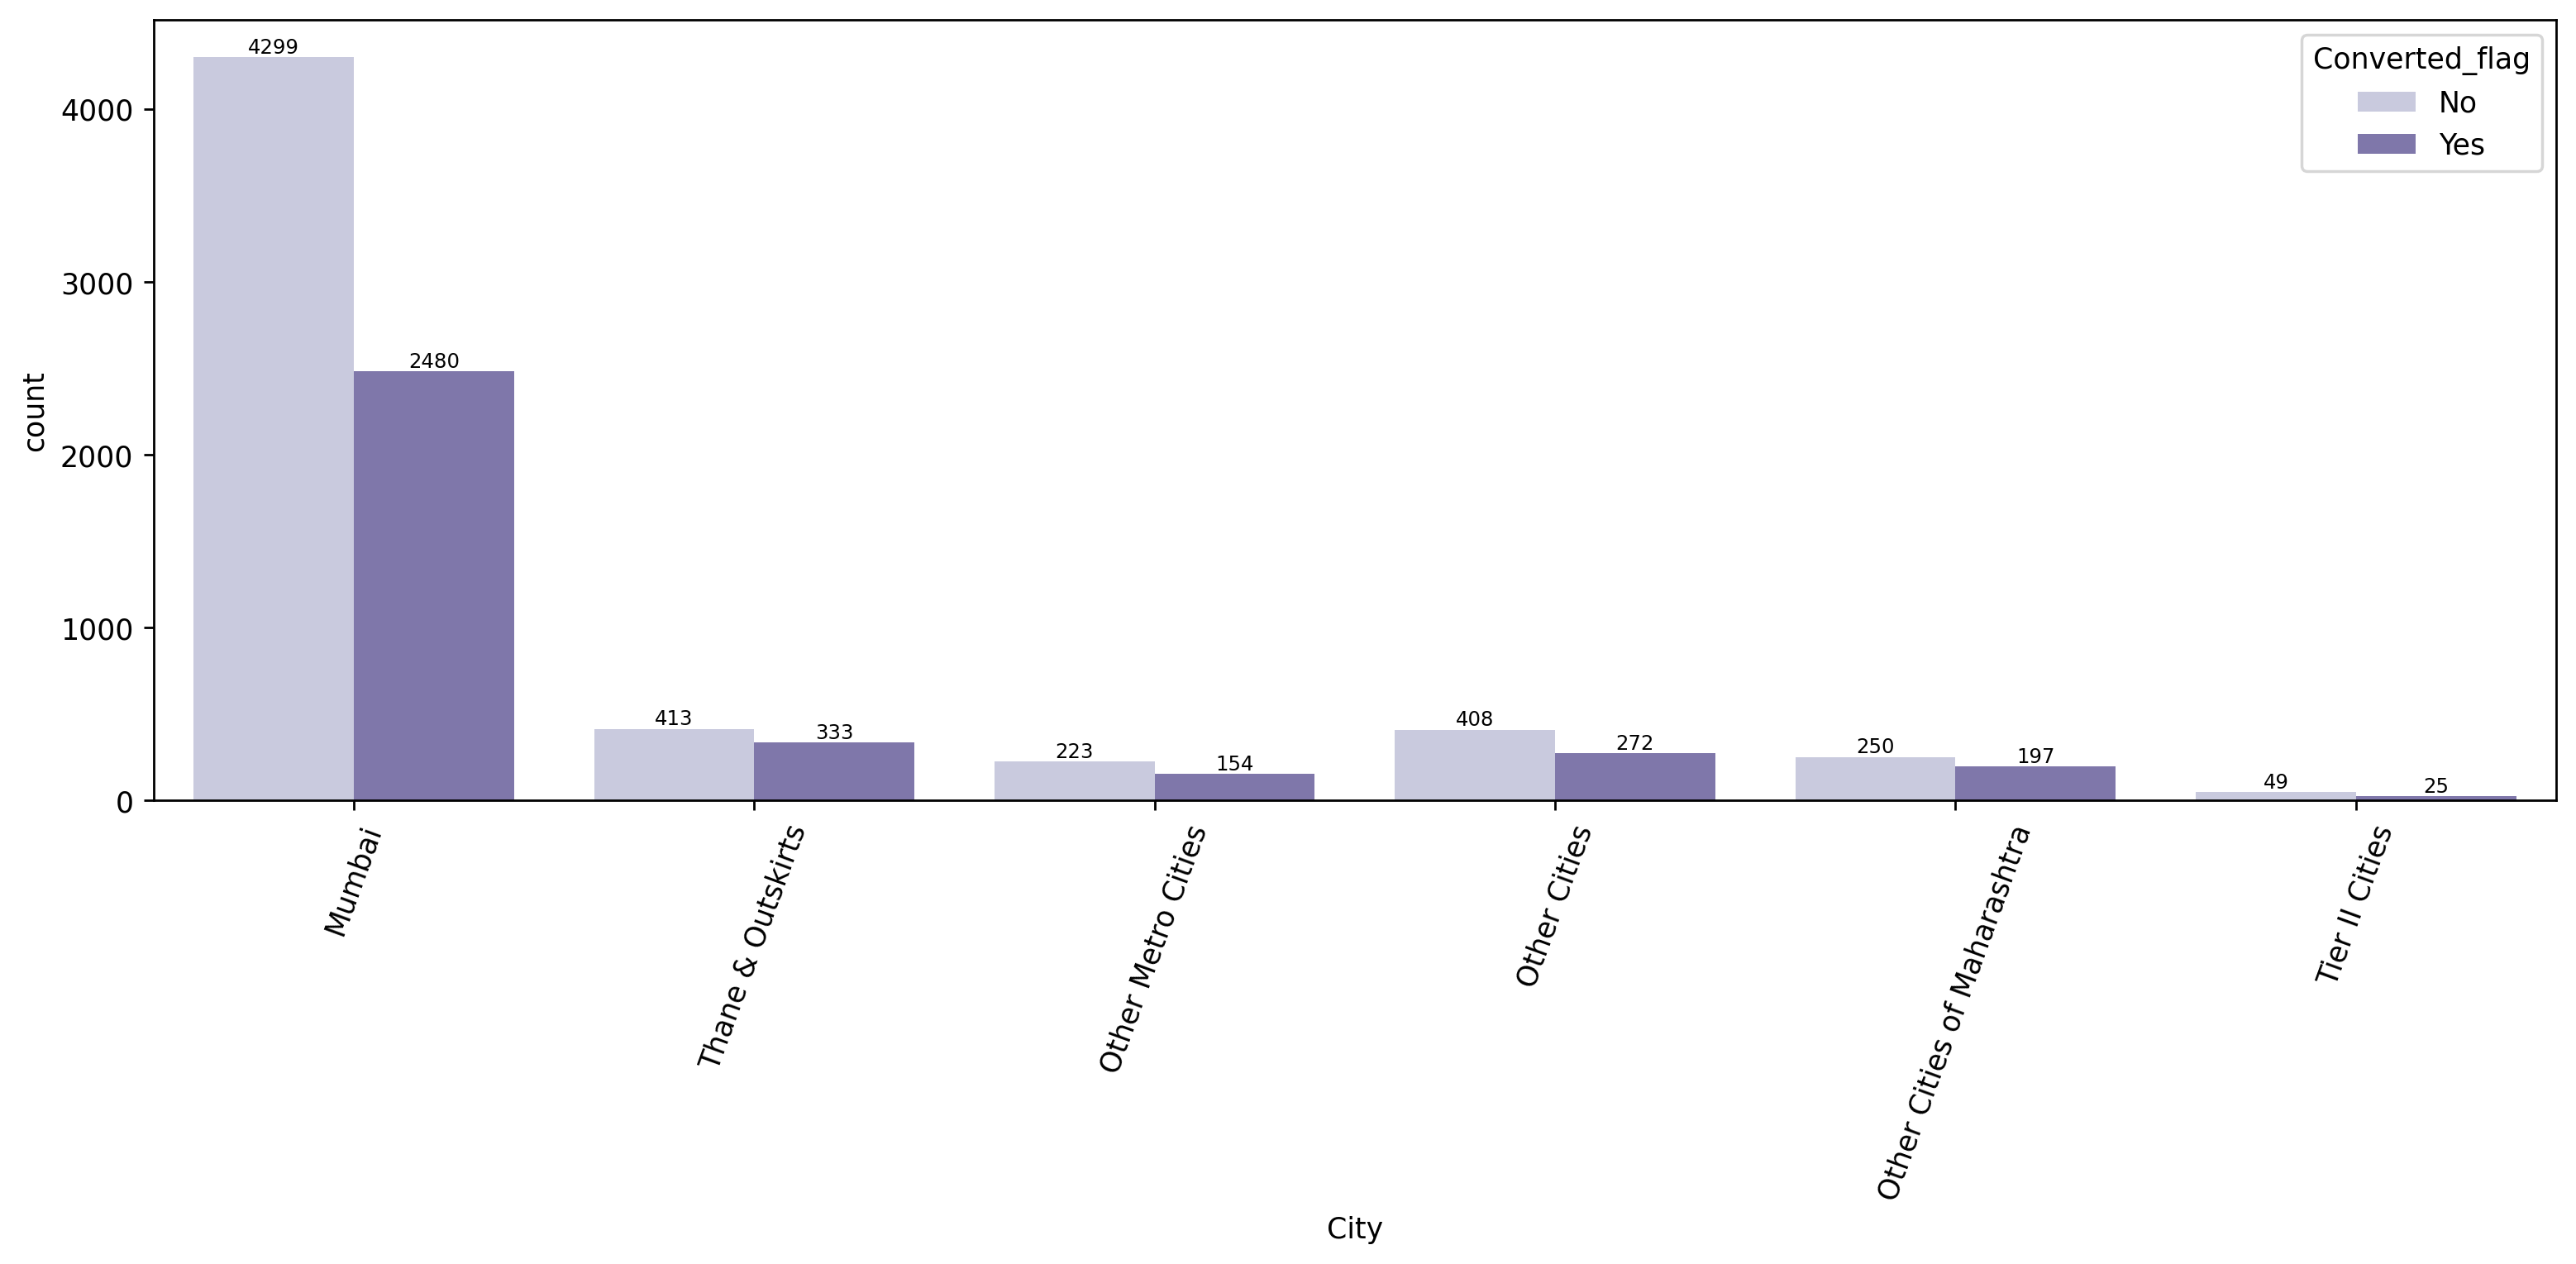

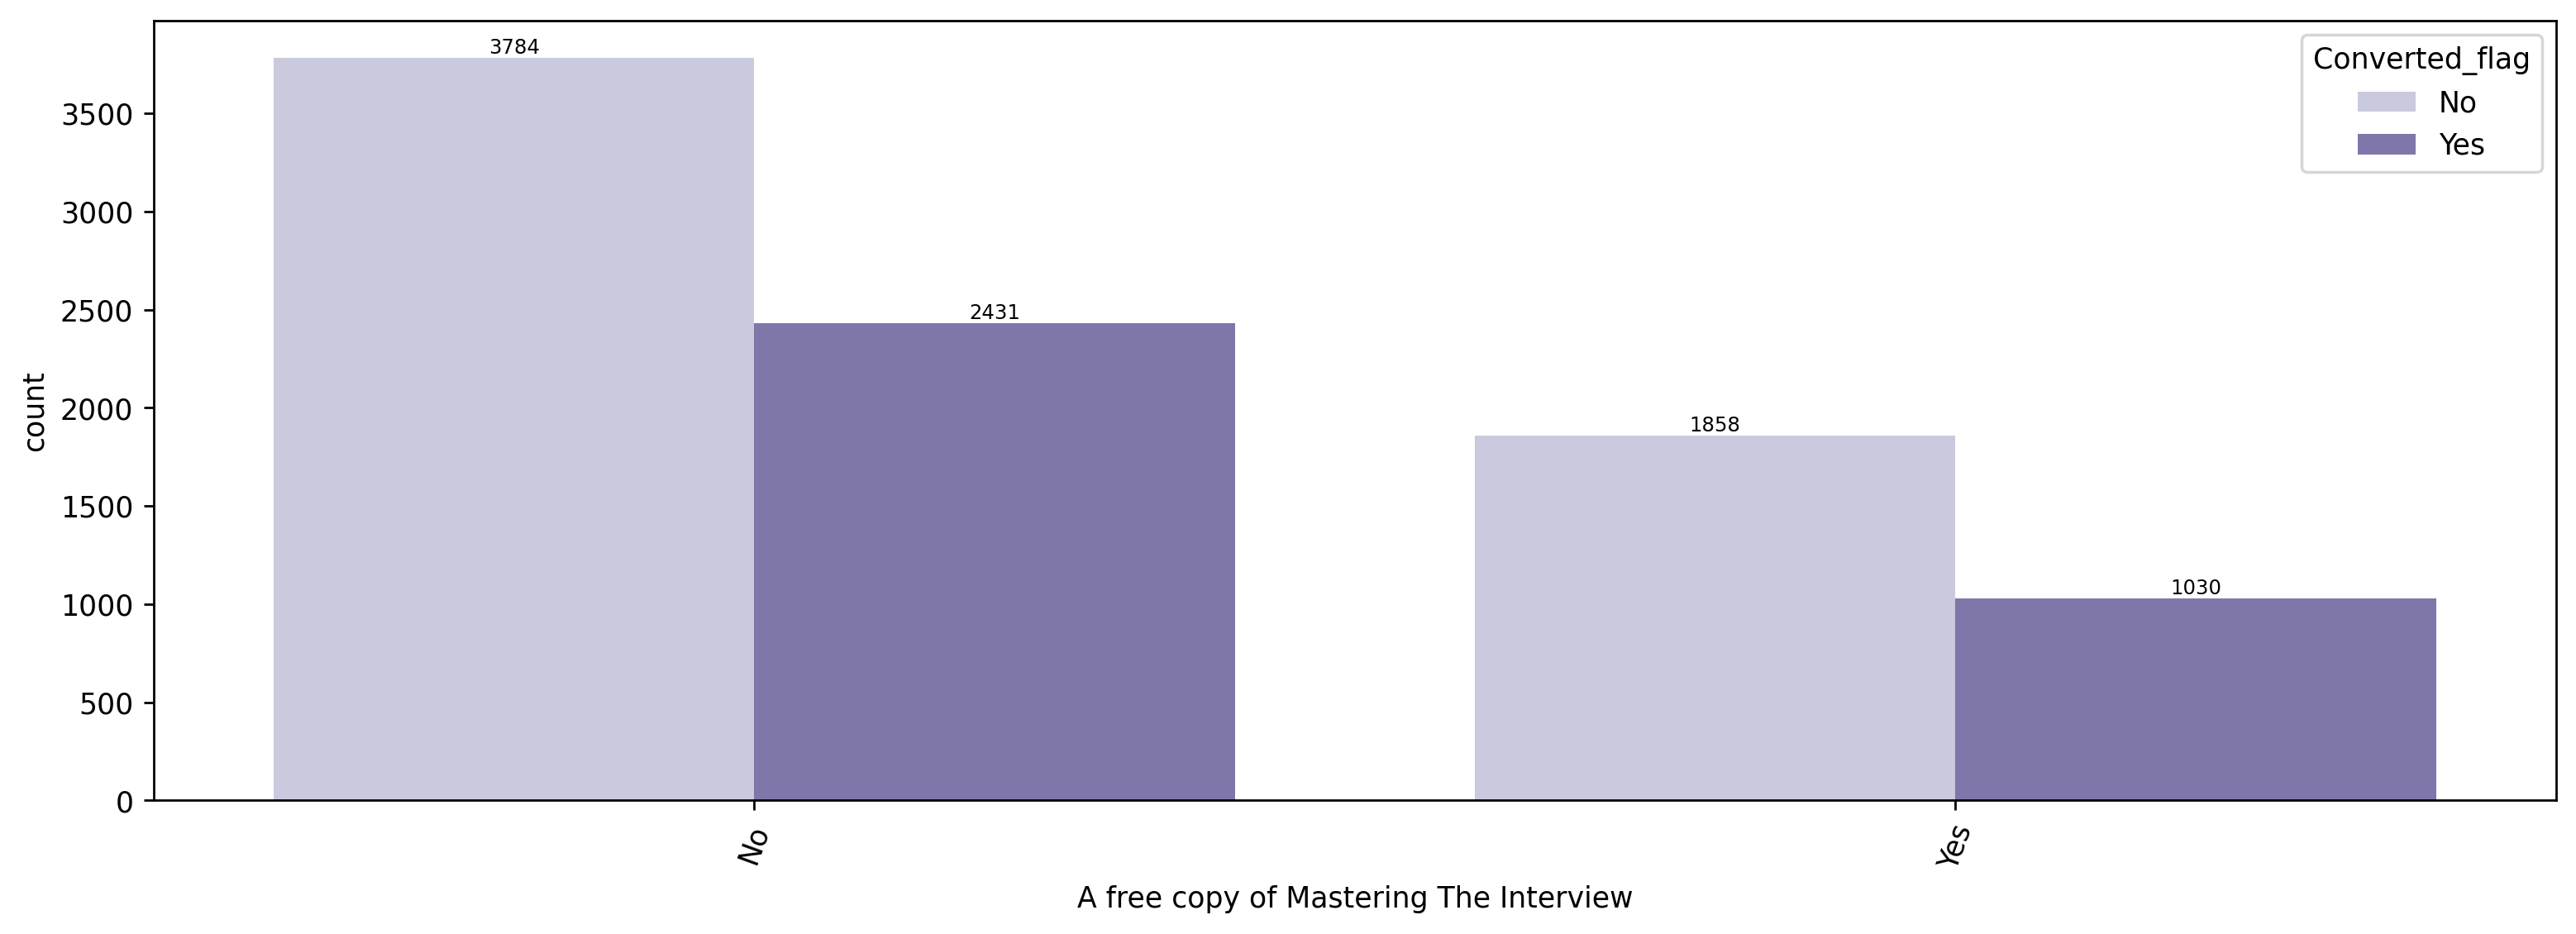

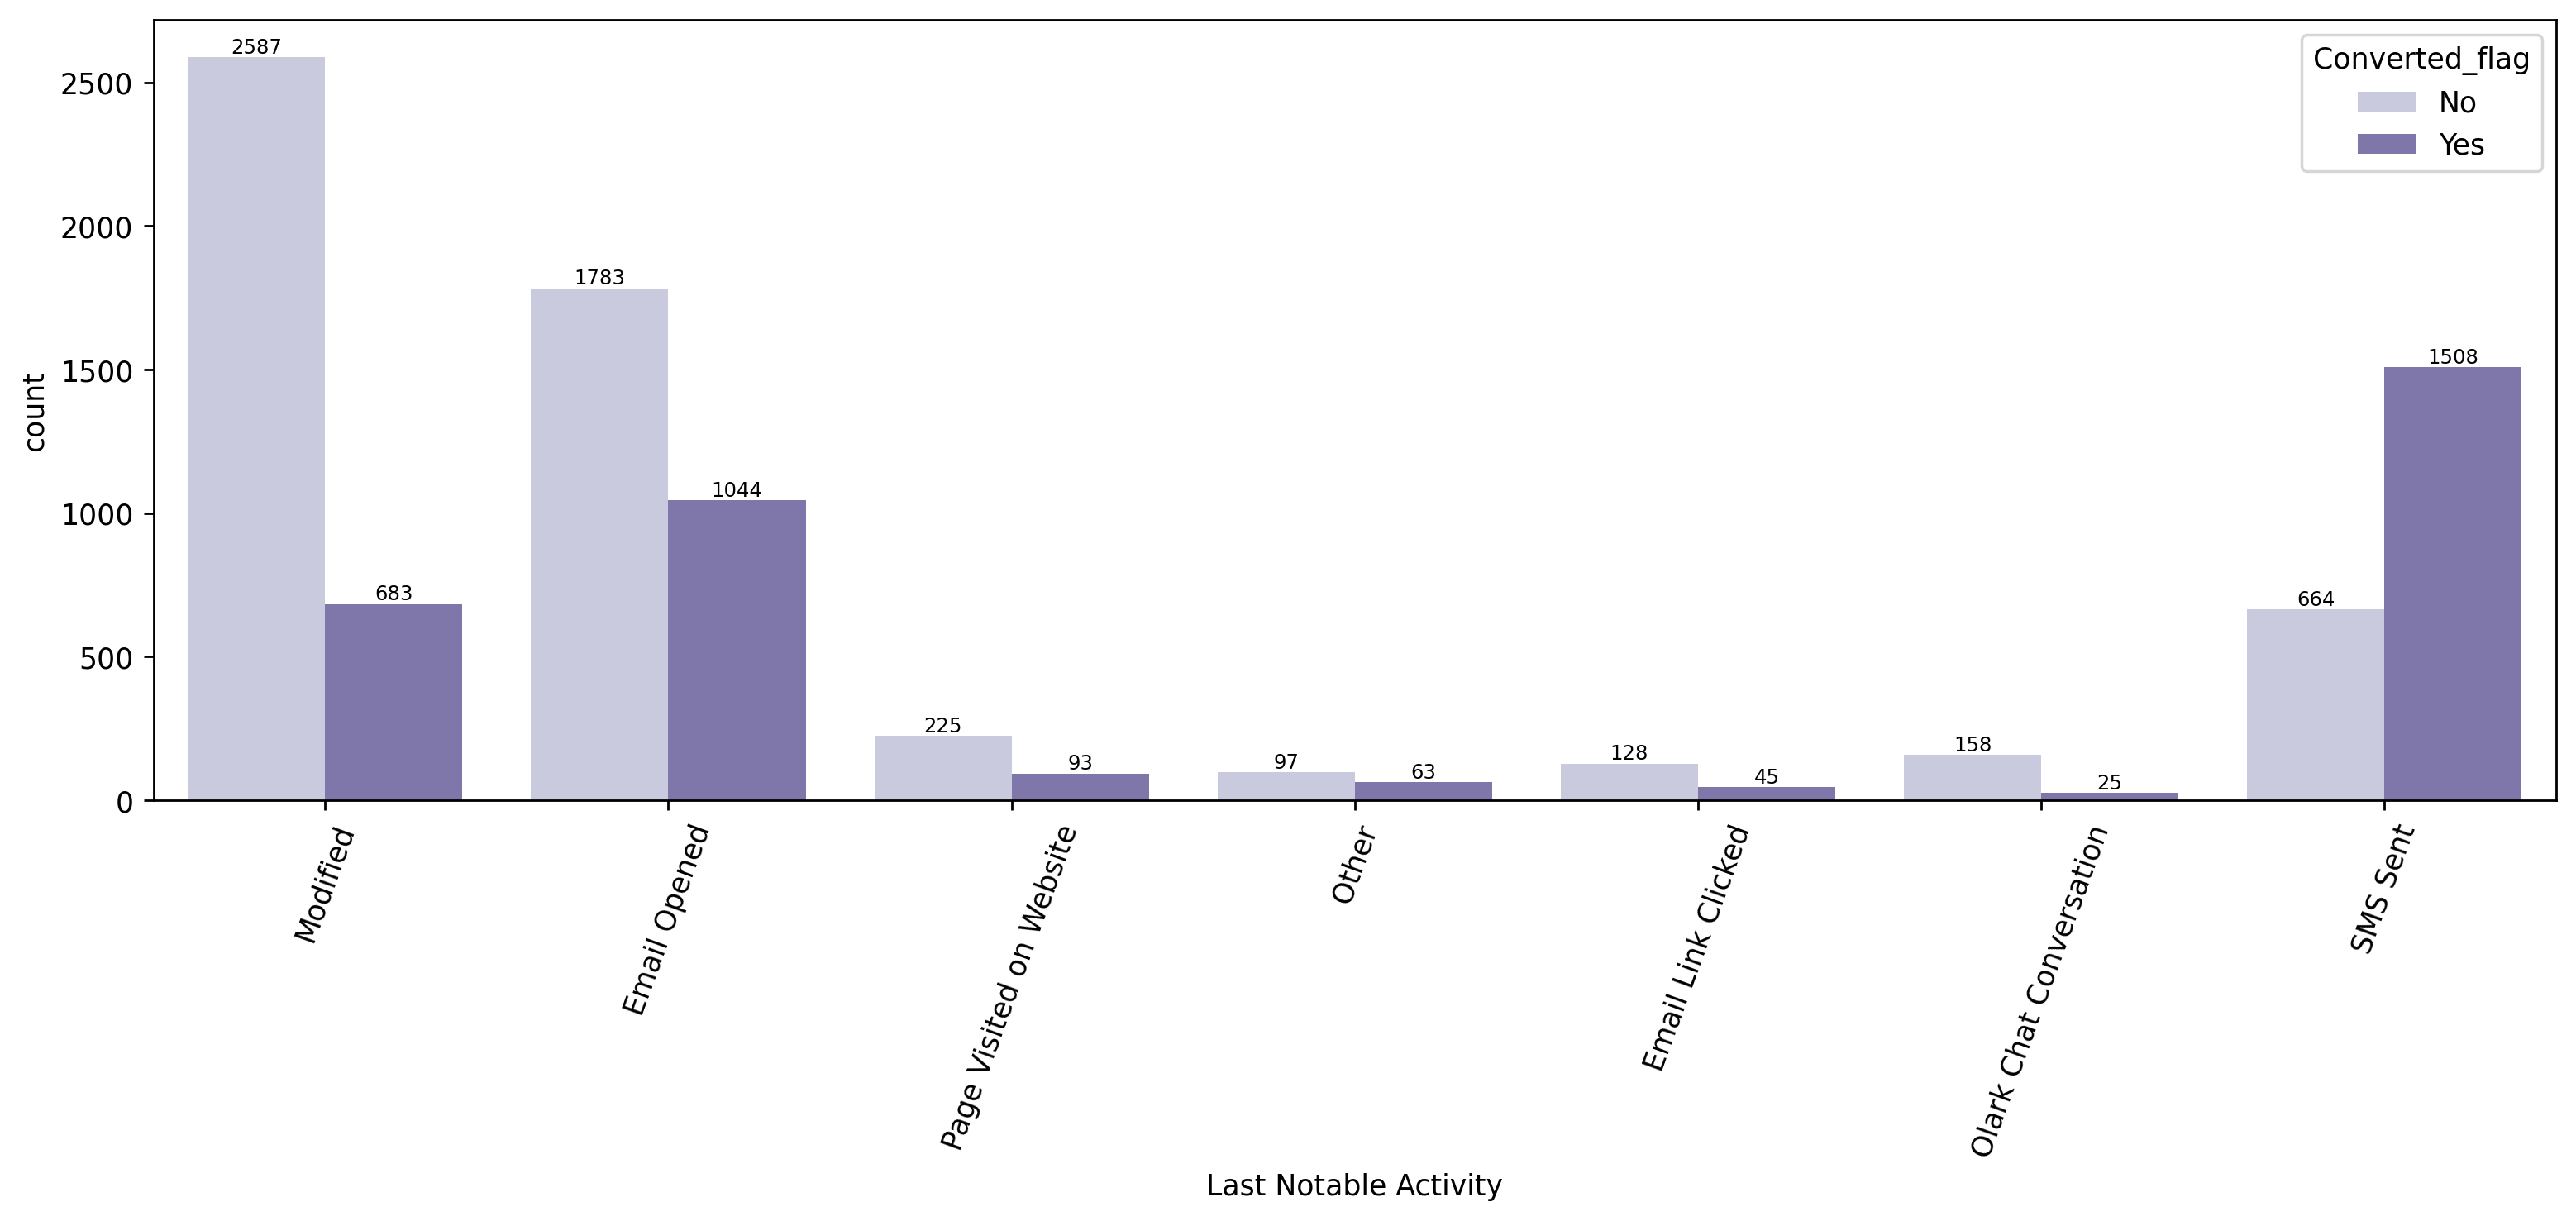

In [94]:
# Using Countplot For Visualizing Categorical Variables.

for i in categorical_Val:
    plt.figure(figsize=(15,5),dpi=250)
    c = sns.countplot(leads_df[i],hue=leads_df.Converted_flag,palette='Purples')
    plt.bar_label(c.containers[0],size = 7)
    plt.bar_label(c.containers[1],size = 7)
    plt.xticks(rotation = 70)
    plt.show()

### <a>**Inferences:** <br>
<a>
    
 - Lead Origin<br>
 
    1.)Customers who were identified as Lead from `Landing Page submission`, constitute the majority of the leads.<br>
    2.)Customers originating from `Lead Add Form` have high probability of conversion. These Customers are very few in number.<br>
    3.)Lead origin-`API` & `Lead Import` have the least conversion rate. Customers from Lead Import are very few in number.<br>
        
To improve overall lead conversion rate, we need to focus more on improving lead converion rate of Customers originating from API and Landing Page Submission and generate more leads from Lead Add Form.<br>

 - Lead Source <br>
    1.)Majority source of the lead is Google & Direct Traffic. 
    2.)Lead source from `Google` has highest probabilty of conversion.
    3.)leads with source `Reference` has maximum probabilty of conversion.

 - Do Not Email<br>
 
    1.)Customers who opt for `Do Not Mail` have lower conversion rate. <br>
    2.)Customers who do not opt for `Do Not Mail` have higher conversion rate which is around 40%. These constitute the majority of the leads.<br>


 - Do Not Call<br>
 
   Customers who do not opt for `Do Not call` have Higher conversion rate which is around 38%.These constitute the majority of the leads.<br><br>
   
 - Last Activity<br>
 
    1.)Customers who last activity was `SMS Sent` have higher conversion rate which is around 63%. 
    2.)Customers who last activity was `Email Opened` constitute majority of the customers. They have around 36% of conversion rate.<br>

To improve overall lead conversion rate, we need to focus more on improving lead converion rate of Customers whose last activity was `Email Opened` and generate more leads from the ones whose last activity was `SMS Sent`.<br>

- Specialisation<br>
    1.)Maximum Leads have specialisation as `Management` & `Others`.
    2.)Leads with specialisation as `Rural & Agribusiness` have least probabilty of conversion.<br>
    
    
- What is your current occupation<br>
    1.)Maximum Leads have occupation as `Unemployed`.<bR>
    2.)Very few leads are Housewives <br>
    
    
- What matters most to you in choosing a career<br>
    Number of Leads to whom better career aspects matters most in choosing a career are more & have higher probabilty of conversion.<br>
    
    
- Search, Newspaper Article,X Education Forums, Newspaper & Digital Advertisement  <br>
    Customers who have seen the add of the education company in any form, are very few in number. Nothing meaningful insight can be concluded from the plot that will impove the overall lead conversion rate.<br>
    
    
- Tags<br>
     More focus shall be given on the leads as `will revert after reading the mail` & `others` as these are potential leads and have higher rate of conversion.<br>
    
    
- City<br>
     Majority of the leads are from `Mumbai` city. Customers from mumbai city should be targeted more as these are the potential leads.<br>
    
    
- A Free Copy Of Mastering the Interview<br>
     Customers who ask for ` afree copy of mastering the interview` are less in number but the conversion probabilty for both type of customers is similar.<br>


- Last Notable Activity <br>
    1.)ustomers whose last notable activity was `Modified` are more in number.<br>
    2.)Customers whose last notable activity was `SMS Sent` have higher probability of conversion.


In [95]:
categorical_Val #sanity check

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

#### Handling Varibles With High Data Imbalance

By Going Through Above Plots, We Have Observed That There Is Data Imbalance In Some Variables. 
These May Give Us Unsatisfactory Results So Will Be Dropping The Columns Mentioned Below :<br>

 - 'Do Not Call'
 - 'Country'
 - 'Search',
 - 'Newspaper Article', 
 - 'X Education Forums', 
 - 'Newspaper',
 - 'Digital Advertisement', 
 - 'Through Recommendations'
 - 'What matters most to you in choosing a course'

In [96]:
# Dropping some of the column creating imbalance

imbalance_var = ['Do Not Call','Country','Search','Newspaper Article','X Education Forums','Newspaper',
                  'Digital Advertisement', 'Through Recommendations','What matters most to you in choosing a course','Converted_flag']
leads_df = leads_df.drop(imbalance_var,axis =1)

In [97]:
leads_df.shape #Checking Shape

(9103, 15)

In [98]:
leads_df.size #Checking Size

136545

#### Visualizing Continuous Variables.

In [99]:
numerical_var  # ['Lead Number','Converted'] are not required in this visualization,thus masking them out.

Index(['Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit'],
      dtype='object')

In [100]:
numerical_var1 = numerical_var.drop(['Lead Number','Converted'])

#Just Masked Out 'Lead Number' and 'Converted' as we don't want them for visualization.

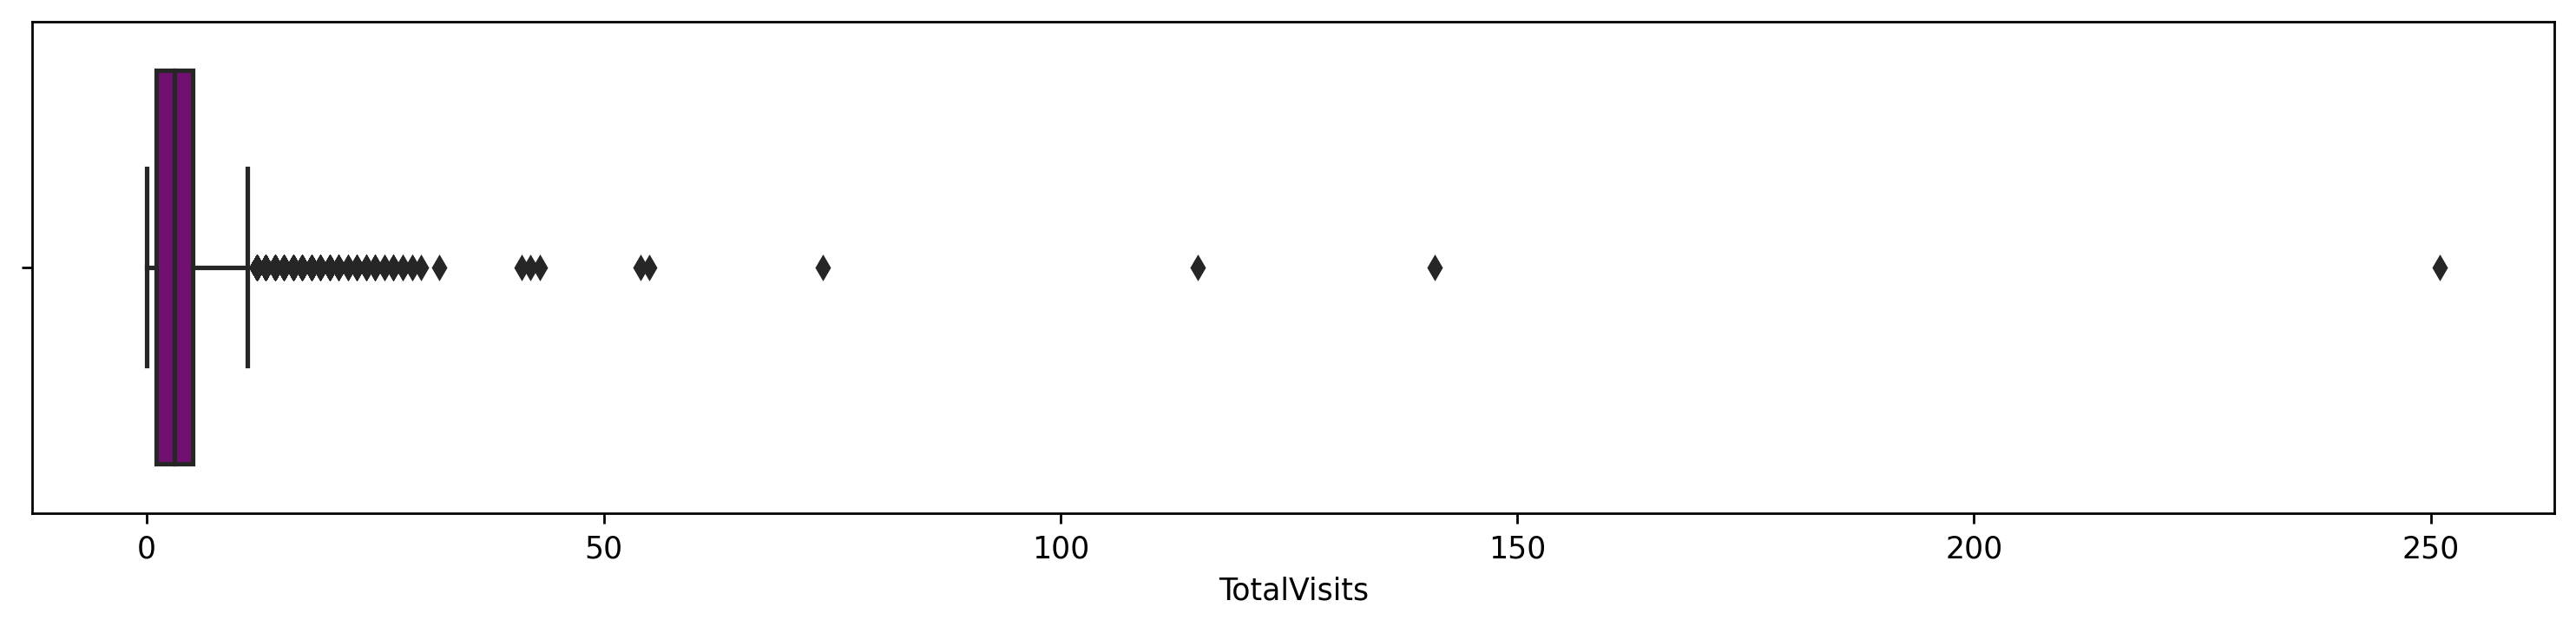

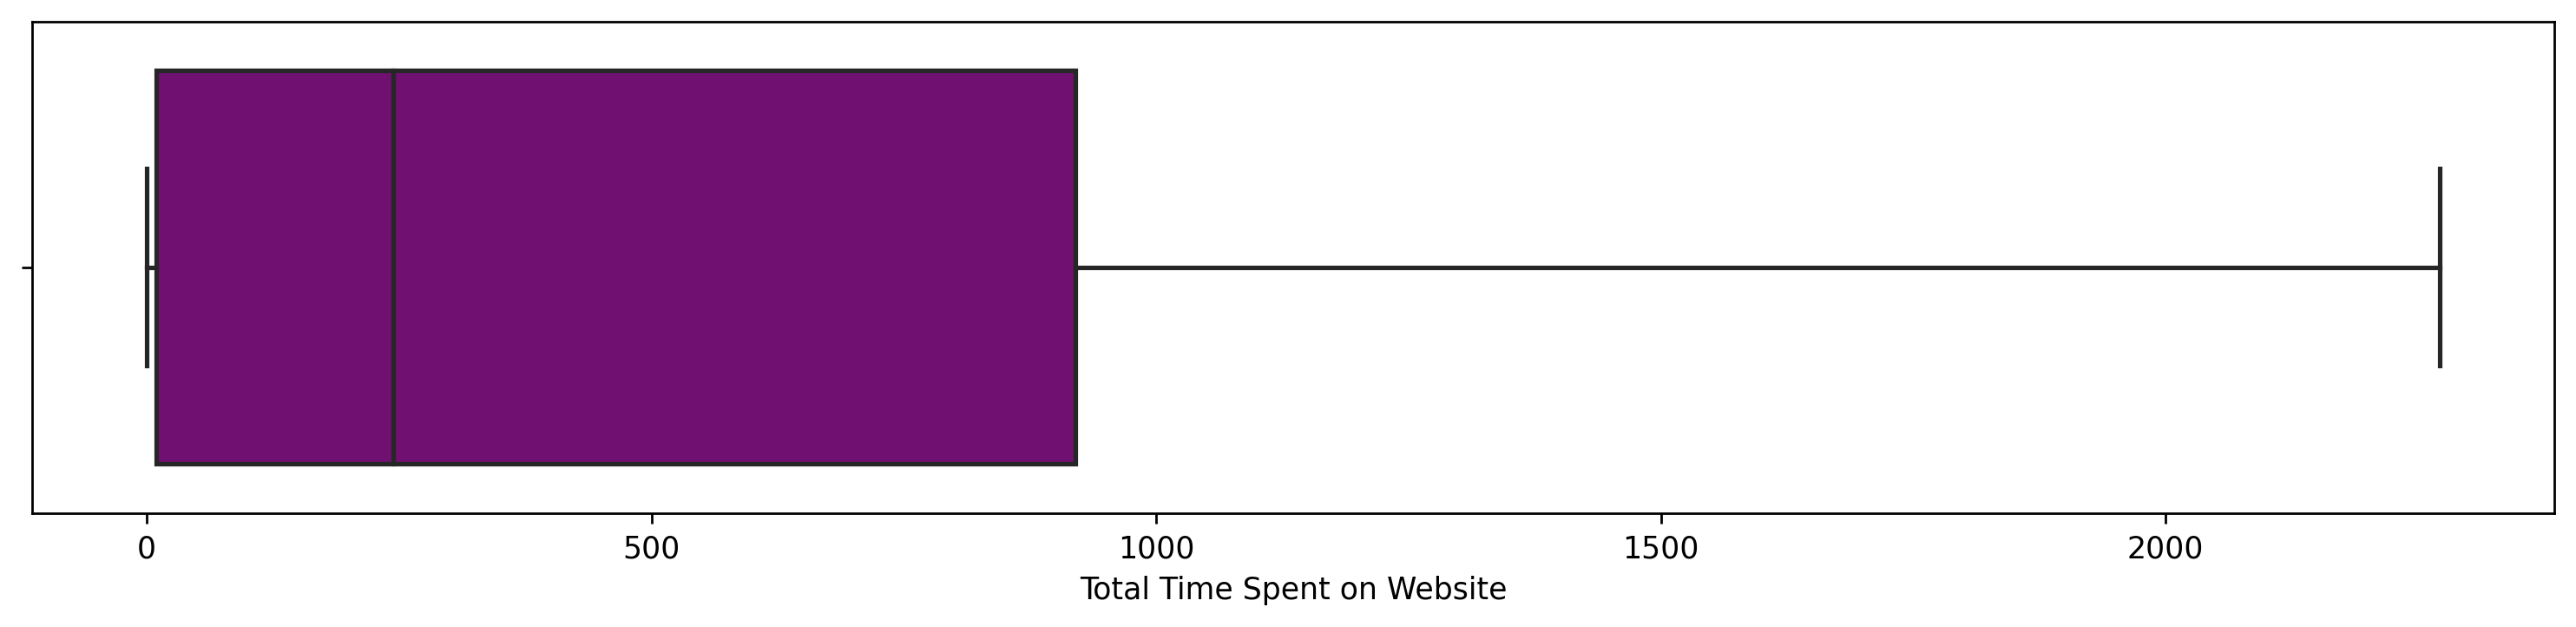

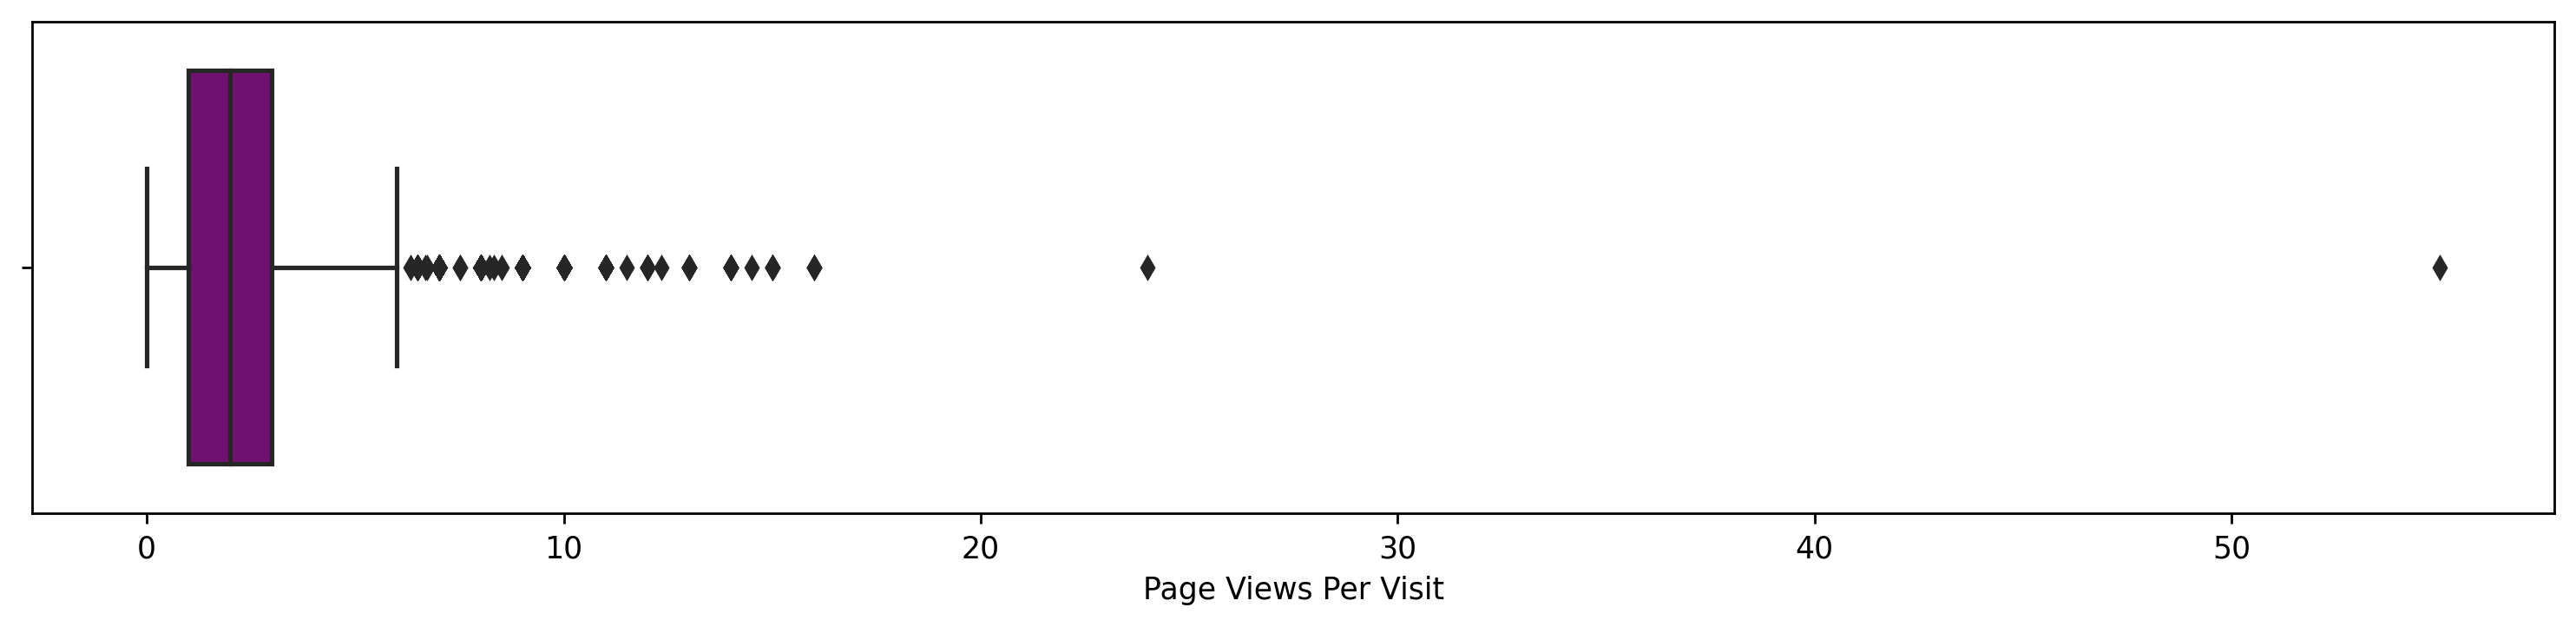

In [101]:
#Checking Outliers

for i in numerical_var1:
    plt.figure(figsize=(15,3),dpi=250)
    sns.boxplot(leads_df[i],color='purple')
    plt.show()

In [102]:
# Checking percentile values 

leads_df[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']].describe(percentiles=[0.01,0.05,.25, .5, .75, .90, .95, .99])

Total Time Spent on Website  TotalVisits  Page Views Per Visit
count                  9103.000000  9103.000000           9103.000000
mean                    481.350104     3.445238              2.362820
std                     545.066142     4.854853              2.161418
min                       0.000000     0.000000              0.000000
1%                        0.000000     0.000000              0.000000
5%                        0.000000     0.000000              0.000000
25%                       9.000000     1.000000              1.000000
50%                     244.000000     3.000000              2.000000
75%                     919.500000     5.000000              3.000000
90%                    1372.000000     7.000000              5.000000
95%                    1556.900000    10.000000              6.000000
99%                    1838.960000    17.000000              9.000000
max                    2272.000000   251.000000             55.000000

In [103]:
# removing outliers using the IQR Method

Q1 = leads_df['TotalVisits'].quantile(0.01)
Q3 = leads_df['TotalVisits'].quantile(0.99)
leads_df = leads_df.loc[(leads_df['TotalVisits'] >= Q1) & (leads_df['TotalVisits'] <= Q3)]

Q1 = leads_df['Page Views Per Visit'].quantile(0.01)
Q3 = leads_df['Page Views Per Visit'].quantile(0.99)
leads_df=leads_df.loc[(leads_df['Page Views Per Visit'] >= Q1) & (leads_df['Page Views Per Visit'] <= Q3)]

Q1 = leads_df['Total Time Spent on Website'].quantile(0.01)
Q3 = leads_df['Total Time Spent on Website'].quantile(0.99)
leads_df=leads_df.loc[(leads_df['Total Time Spent on Website'] >= Q1) & (leads_df['Total Time Spent on Website'] <= Q3)]

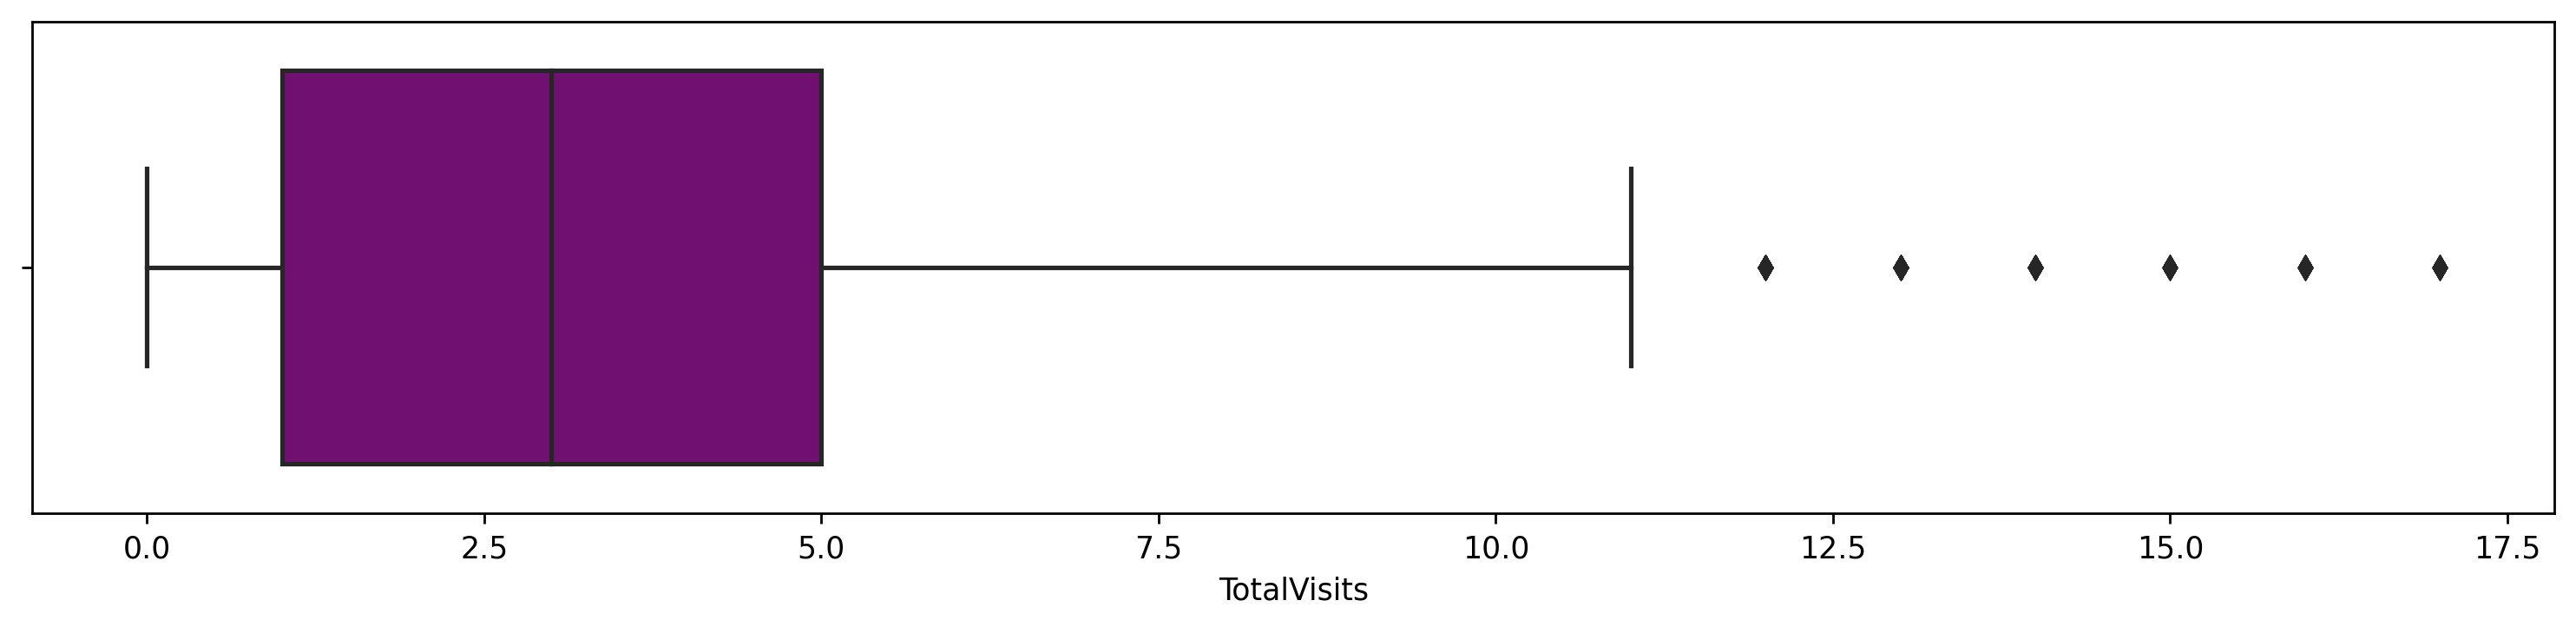

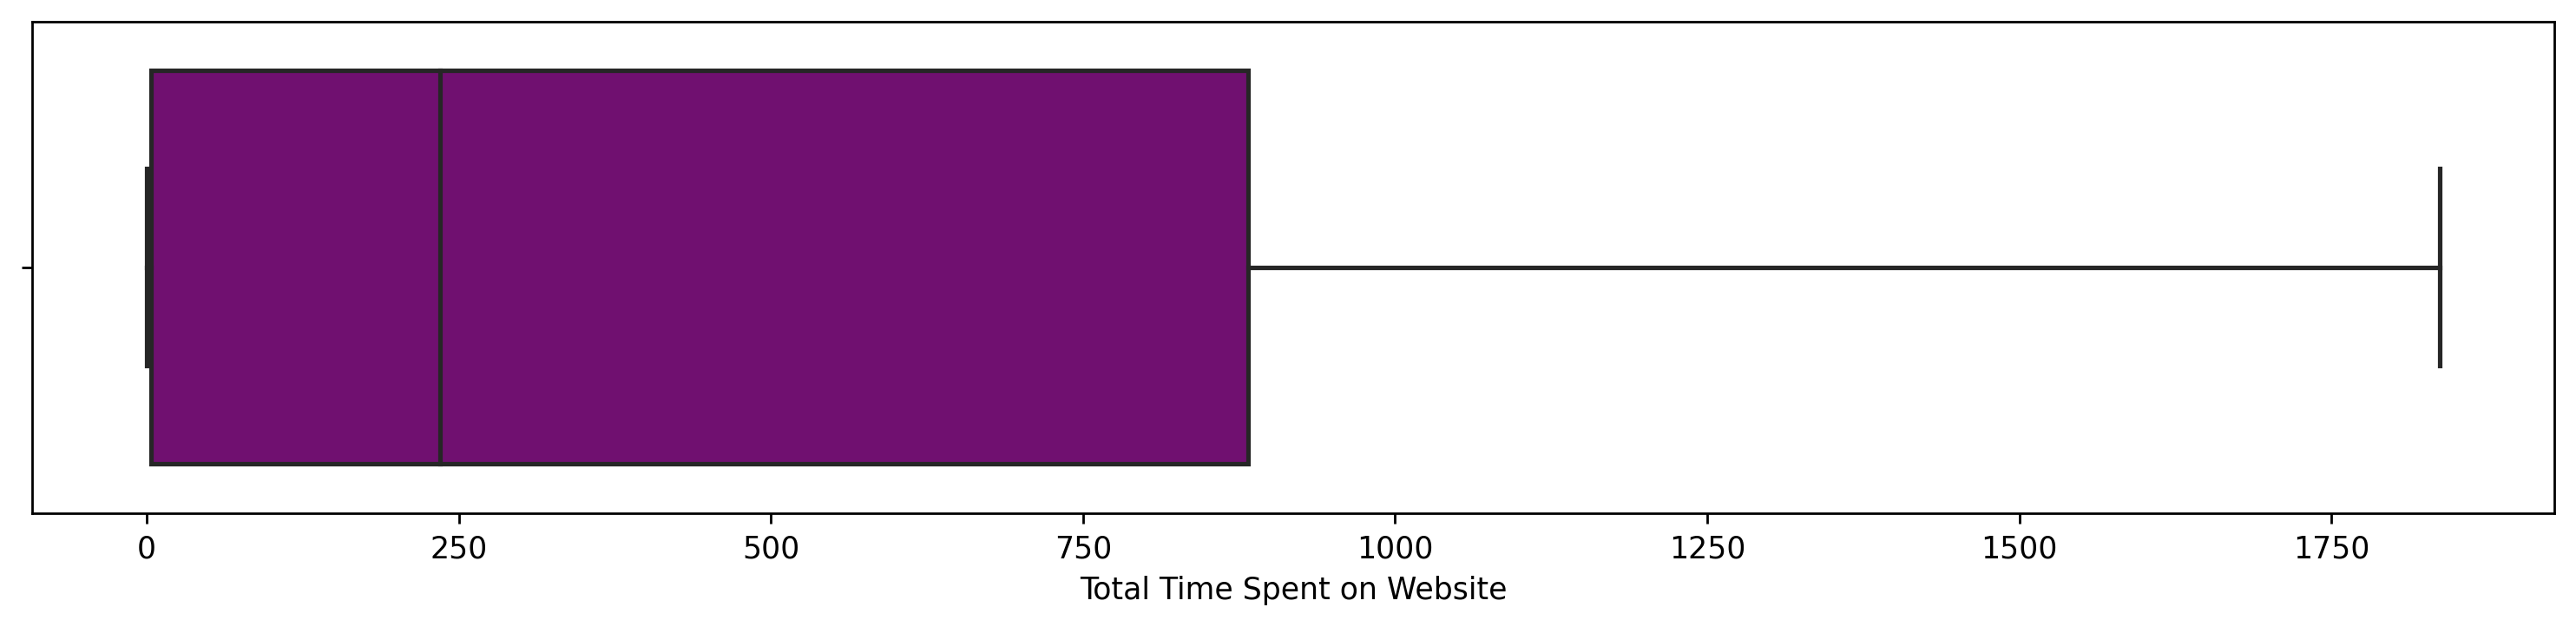

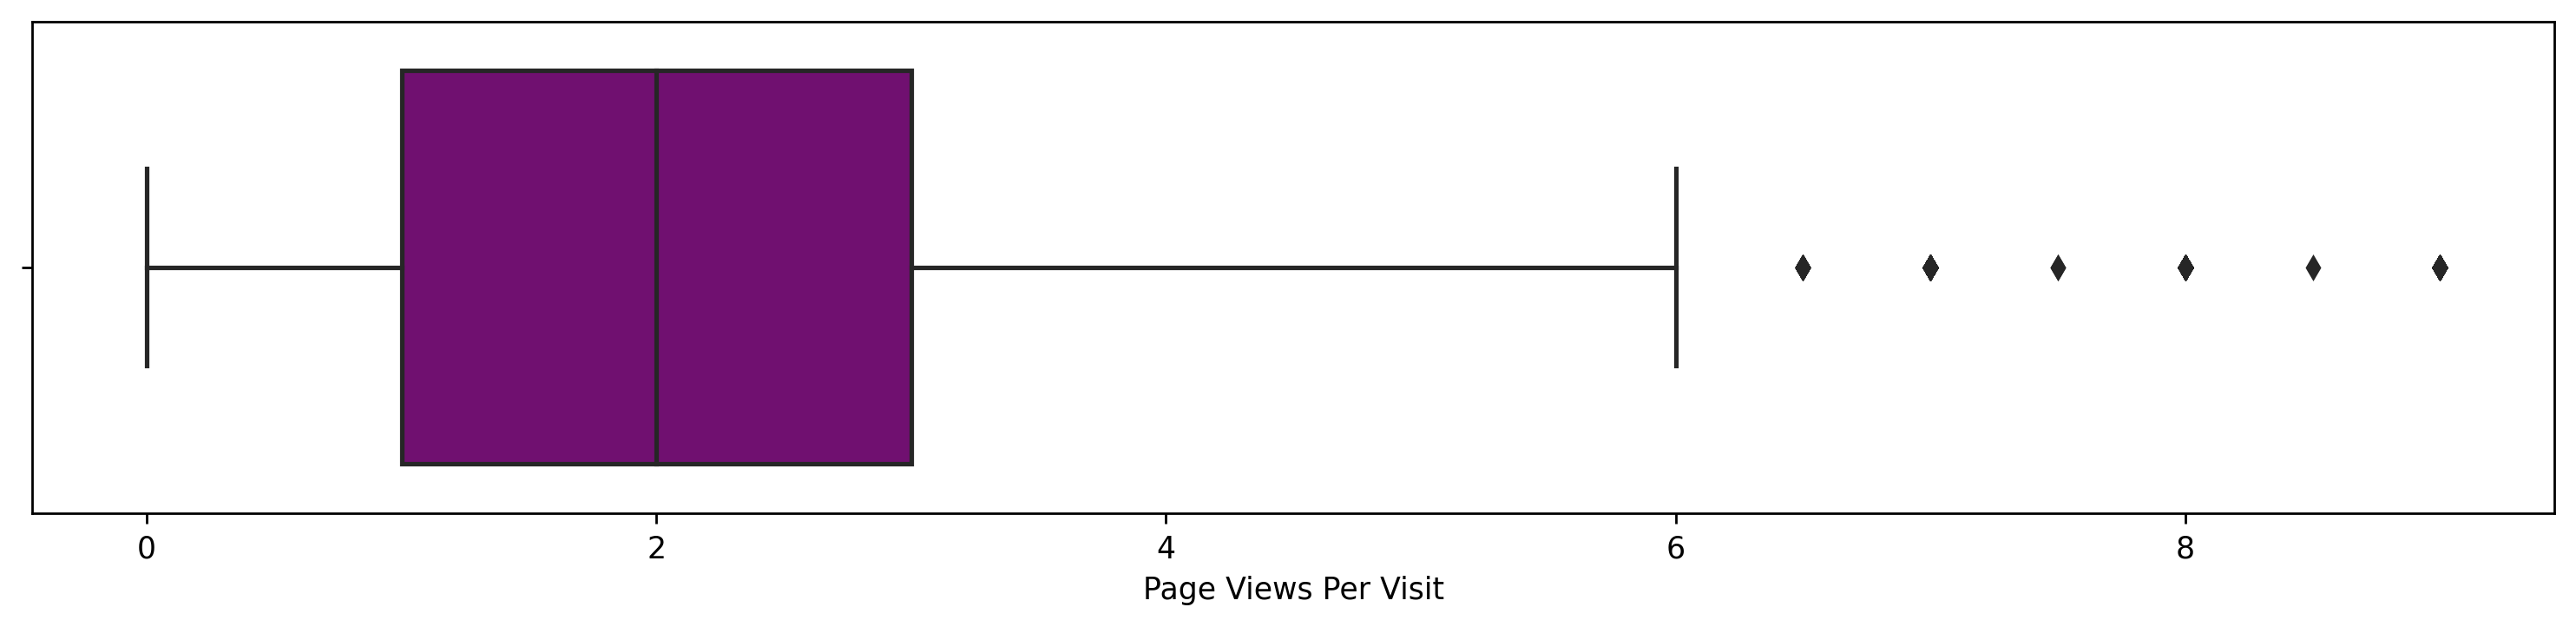

In [104]:
# Checking Outliers After Fixing

for i in numerical_var1:
    plt.figure(figsize=(15,3),dpi=250)
    sns.boxplot(leads_df[i],color='purple')
    plt.show()
    
# Now They Seems Uniform

In [105]:
leads_df.shape #checking shape

(8863, 15)

In [106]:
leads_df.size #checking size

132945

#### Visualizing Continuous Variables With Target Variable

In [107]:
list(numerical_var1) #checking continuous variables

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [108]:
#Creating function for plotting boxplot

def boxplot(y):
    plt.figure(figsize=(8,5),dpi=300)
    plt.title('Converted Vs.'+' '+ y)
    sns.boxplot(x = 'Converted', y = y, data = leads_df, palette='Purples')
    plt.xticks([0,1],['No','Yes'])
    plt.xlabel('Converted')
    plt.ylabel(y)
    plt.tight_layout(pad=7)

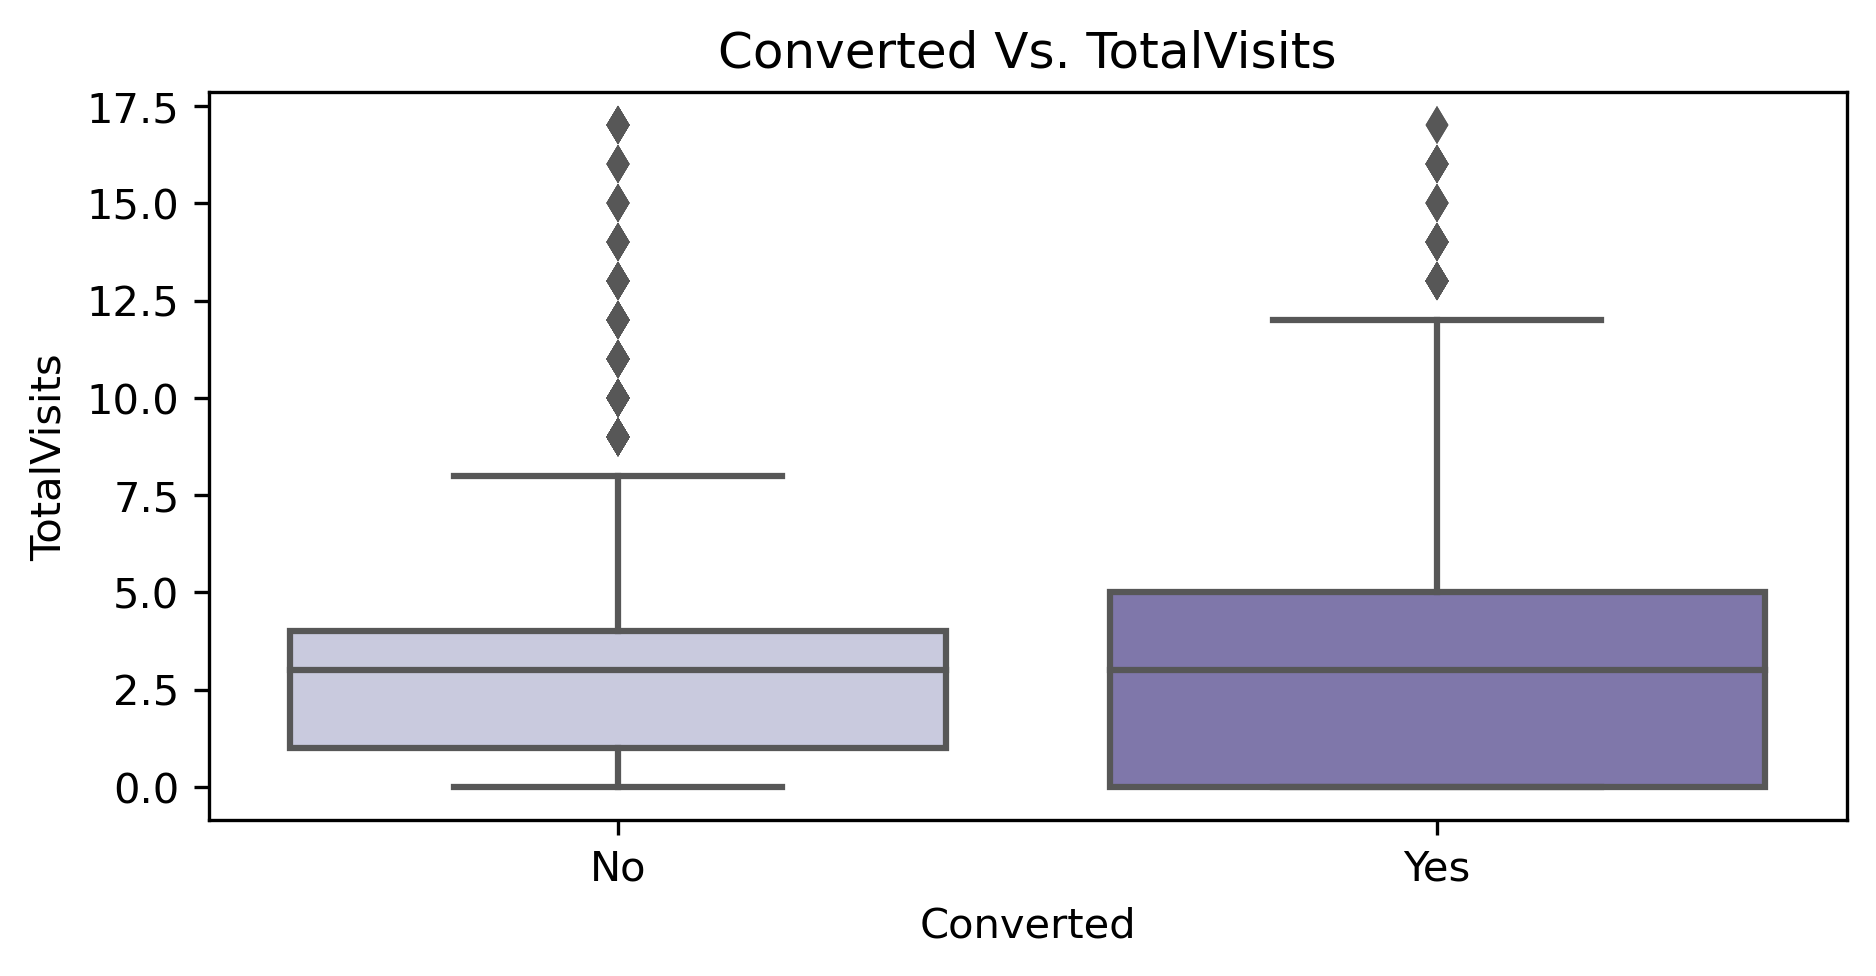

In [109]:
boxplot('TotalVisits')
plt.savefig('Convstotalvis.svg',transparent=True,bbox_inches='tight')
plt.show()

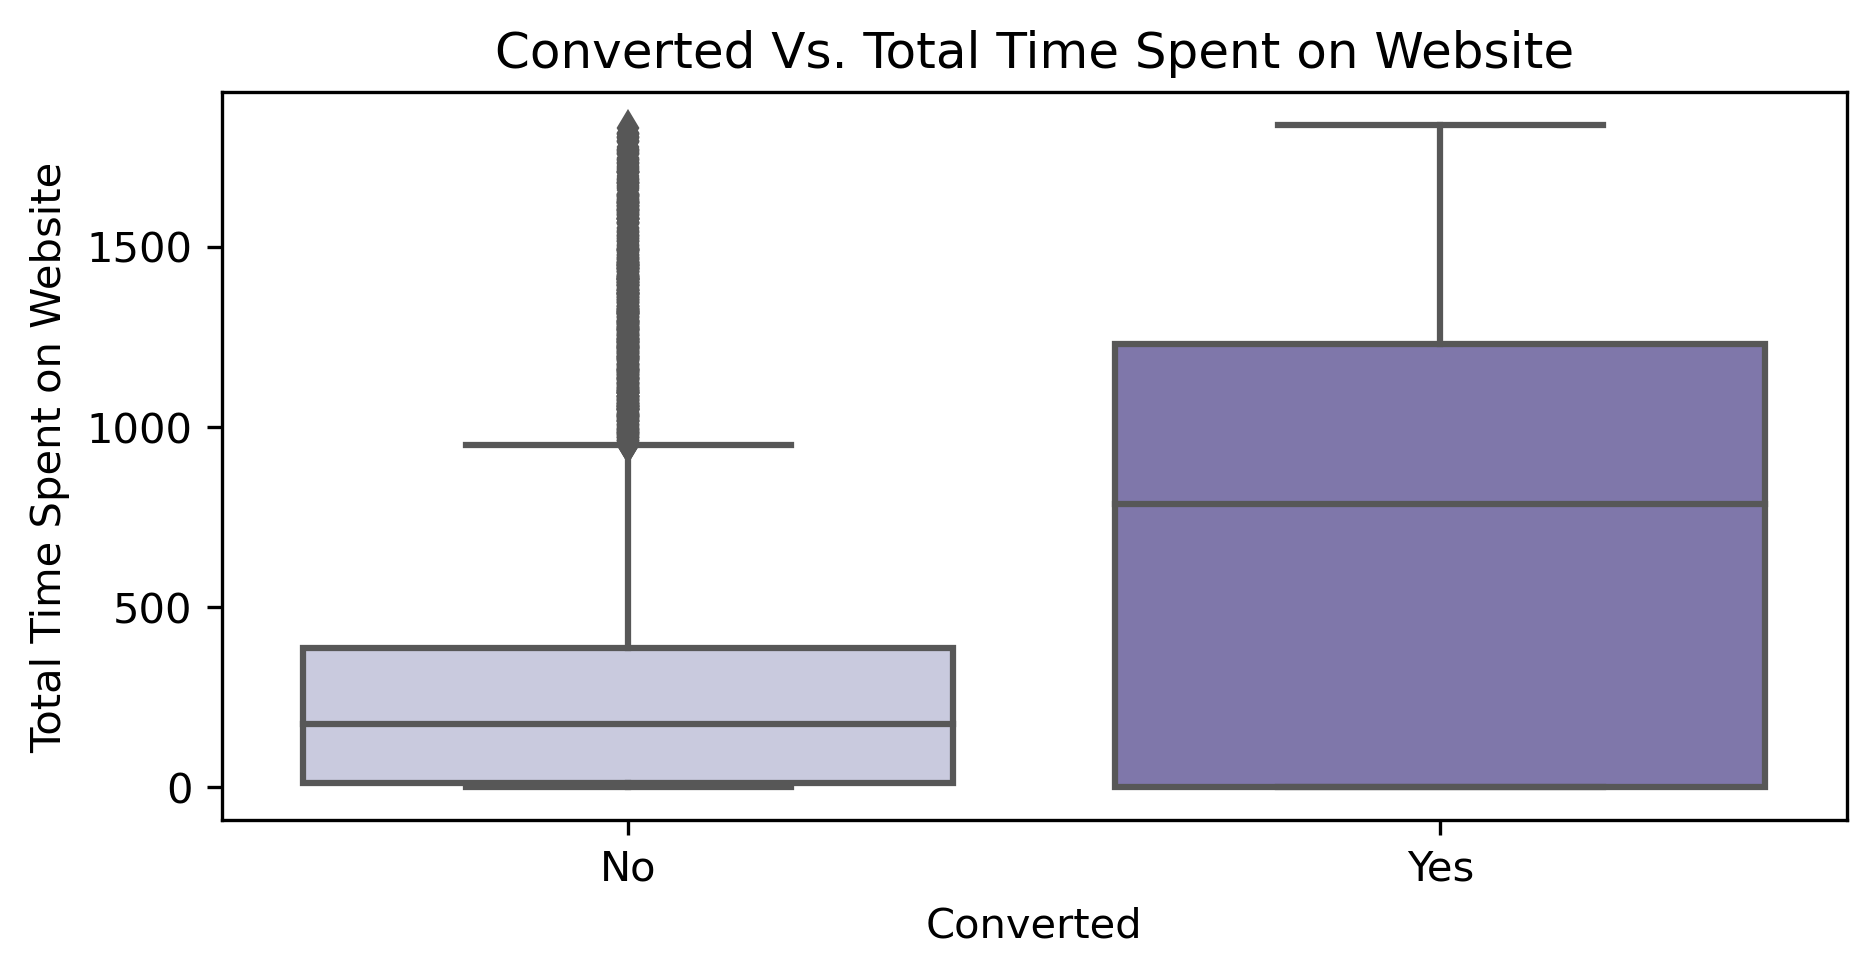

In [110]:
boxplot('Total Time Spent on Website')
plt.savefig('Convertedvstotaltimespent.svg',transparent=True,bbox_inches='tight')
plt.show()

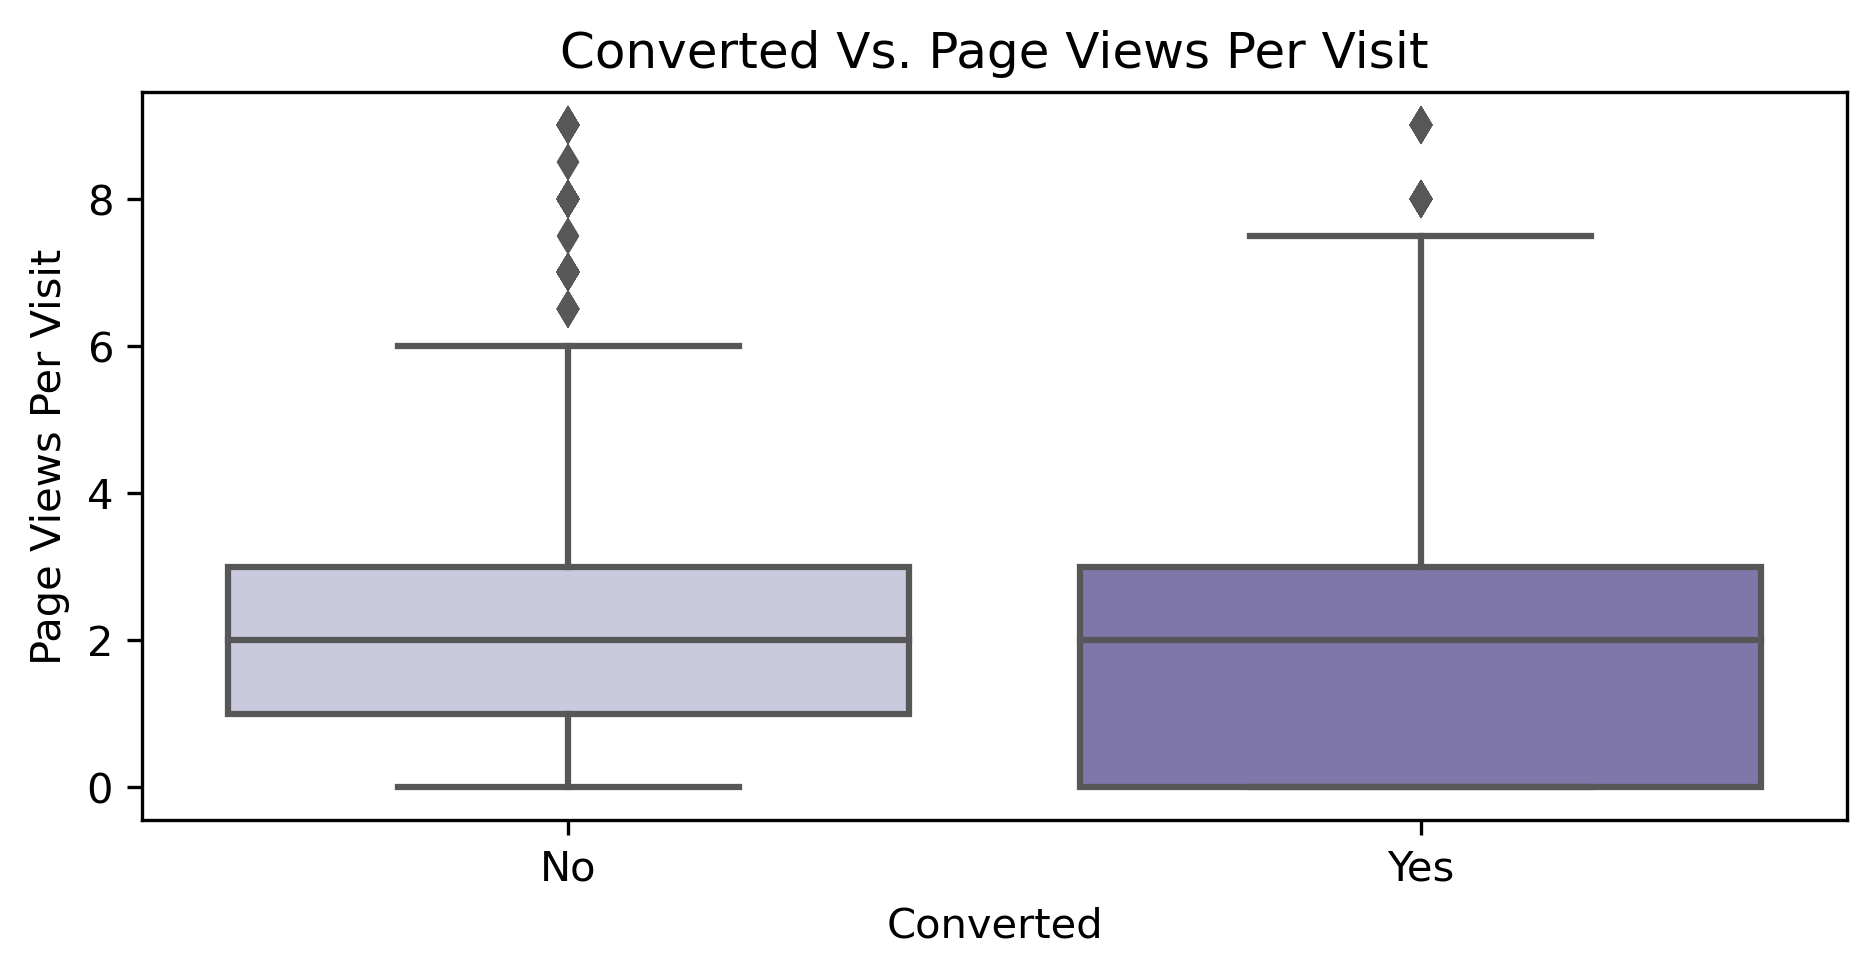

In [111]:
boxplot('Page Views Per Visit')
plt.savefig('Convertedvspageviewsper.svg',transparent=True,bbox_inches='tight')
plt.show()

##### Inferences

 #####                        Total Visits & Page Views Per Visit VS Converted
 #####    - Median for both types of Leads : converted and non-converted are similar.
 #####    - Nothing can be concluded from them.
 #####                              Total Time Spent on website VS Converted
 #####    - Leads who spend more time on the X-education websites, has more chances of converting.

## Data Preparation

In [112]:
# Importing More Libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,recall_score,roc_auc_score,roc_curve,accuracy_score,precision_score,precision_recall_curve,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE

In [113]:
# Keeping The Dataset Safe Lets Copy It First To New Variable i.e 'leads_df_new'

leads_df_new = leads_df.copy()

In [114]:
(leads_df_new.eq('No')).any()

# Here We Can See That Columns 'Do Not Email' and 'A free copy of Mastering The Interview' Contains 'Yes','No' Values
# Will Be Converting Them To Binary {'Yes':1,'No':0} values

Lead Number                               False
Lead Origin                               False
Lead Source                               False
Do Not Email                               True
Converted                                 False
TotalVisits                               False
Total Time Spent on Website               False
Page Views Per Visit                      False
Last Activity                             False
Specialization                            False
What is your current occupation           False
Tags                                      False
City                                      False
A free copy of Mastering The Interview     True
Last Notable Activity                     False
dtype: bool

In [115]:
leads_df_new.head() #sanity check

Lead Number              Lead Origin     Lead Source Do Not Email  \
0       660737                      API      Olark Chat           No   
1       660728                      API  Organic Search           No   
2       660727  Landing Page Submission  Direct Traffic           No   
3       660719  Landing Page Submission  Direct Traffic           No   
4       660681  Landing Page Submission          Google           No   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0            0                            0                   0.0   
1          0            5                          674                   2.5   
2          1            2                         1532                   2.0   
3          0            1                          305                   1.0   
4          1            2                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Others   
1             Email Opened                   Others   
2             Email Opened  Business Administration   
3                   others    Media and Advertising   
4        Converted to Lead                   Others   

  What is your current occupation                                 Tags  \
0                      Unemployed          Interested in other courses   
1                      Unemployed                    Try Calling again   
2                         Student  Will revert after reading the email   
3                      Unemployed                    Try Calling again   
4                      Unemployed  Will revert after reading the email   

     City A free copy of Mastering The Interview Last Notable Activity  
0  Mumbai                                     No              Modified  
1  Mumbai                                     No          Email Opened  
2  Mumbai                                    Yes          Email Opened  
3  Mumbai                                     No              Modified  
4  Mumbai                                     No              Modified

In [116]:
leads_df_new['Do Not Email'] = leads_df_new['Do Not Email'].replace({'Yes':1,'No':0})
leads_df_new['A free copy of Mastering The Interview'] = leads_df_new['A free copy of Mastering The Interview'].replace({'Yes':1,'No':0})

# Converted 'A free copy of Mastering The Interview' and 'Do Not Email' values to binary numbers 0(No) and 1(Yes).

In [117]:
leads_df_new.head(10) #Checking upto 10 rows

Lead Number              Lead Origin     Lead Source  Do Not Email  \
0       660737                      API      Olark Chat             0   
1       660728                      API  Organic Search             0   
2       660727  Landing Page Submission  Direct Traffic             0   
3       660719  Landing Page Submission  Direct Traffic             0   
4       660681  Landing Page Submission          Google             0   
5       660680                      API      Olark Chat             0   
6       660673  Landing Page Submission          Google             0   
7       660664                      API      Olark Chat             0   
8       660624  Landing Page Submission  Direct Traffic             0   
9       660616                      API          Google             0   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0            0                            0                   0.0   
1          0            5                          674                   2.5   
2          1            2                         1532                   2.0   
3          0            1                          305                   1.0   
4          1            2                         1428                   1.0   
5          0            0                            0                   0.0   
6          1            2                         1640                   2.0   
7          0            0                            0                   0.0   
8          0            2                           71                   2.0   
9          0            4                           58                   4.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Others   
1             Email Opened                   Others   
2             Email Opened  Business Administration   
3                   others    Media and Advertising   
4        Converted to Lead                   Others   
5  Olark Chat Conversation                   Others   
6             Email Opened               Management   
7  Olark Chat Conversation                   Others   
8             Email Opened               Management   
9             Email Opened               Management   

  What is your current occupation                                 Tags  \
0                      Unemployed          Interested in other courses   
1                      Unemployed                    Try Calling again   
2                         Student  Will revert after reading the email   
3                      Unemployed                    Try Calling again   
4                      Unemployed  Will revert after reading the email   
5                      Unemployed                               Others   
6                      Unemployed  Will revert after reading the email   
7                      Unemployed                               Others   
8                      Unemployed                               Others   
9                      Unemployed                               Others   

                City  A free copy of Mastering The Interview  \
0             Mumbai                                       0   
1             Mumbai                                       0   
2             Mumbai                                       1   
3             Mumbai                                       0   
4             Mumbai                                       0   
5             Mumbai                                       0   
6             Mumbai                                       0   
7             Mumbai                                       0   
8  Thane & Outskirts                                       1   
9             Mumbai                                       0   

  Last Notable Activity  
0              Modified  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified  
5              Modified  
6         

In [118]:
leads_df_new['Do Not Email'].value_counts() #Checking Value Counts of Do Not Email

0    8170
1     693
Name: Do Not Email, dtype: int64

In [119]:
leads_df_new['A free copy of Mastering The Interview'].value_counts() #Checking Value Counts of A free copy of Mastering The Interview

0    6102
1    2761
Name: A free copy of Mastering The Interview, dtype: int64

In [120]:
leads_df['Do Not Email'].value_counts() # Confirming The Values With Old Dataframe

No     8170
Yes     693
Name: Do Not Email, dtype: int64

In [121]:
leads_df['A free copy of Mastering The Interview'].value_counts() # Confirming The Values With Old Dataframe

No     6102
Yes    2761
Name: A free copy of Mastering The Interview, dtype: int64

In [122]:
# Now Will Be Checking All Categorical Variables For Dummy Creation

categorical_Val_new = list(leads_df_new.columns[leads_df_new.dtypes == 'object'])
categorical_Val_new

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Tags',
 'City',
 'Last Notable Activity']

#### Dummy Creation

In [123]:
# Creating dummy variables for the categorical variables and droppong the first one
cols1 = [i for i in leads_df_new.select_dtypes(include ='object').columns if len(leads_df_new[i].value_counts()) >2 and i != 'Lead Number']

dummy1 = pd.get_dummies(leads_df[cols1], drop_first= True)
leads_df_new.head()

Lead Number              Lead Origin     Lead Source  Do Not Email  \
0       660737                      API      Olark Chat             0   
1       660728                      API  Organic Search             0   
2       660727  Landing Page Submission  Direct Traffic             0   
3       660719  Landing Page Submission  Direct Traffic             0   
4       660681  Landing Page Submission          Google             0   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0            0                            0                   0.0   
1          0            5                          674                   2.5   
2          1            2                         1532                   2.0   
3          0            1                          305                   1.0   
4          1            2                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Others   
1             Email Opened                   Others   
2             Email Opened  Business Administration   
3                   others    Media and Advertising   
4        Converted to Lead                   Others   

  What is your current occupation                                 Tags  \
0                      Unemployed          Interested in other courses   
1                      Unemployed                    Try Calling again   
2                         Student  Will revert after reading the email   
3                      Unemployed                    Try Calling again   
4                      Unemployed  Will revert after reading the email   

     City  A free copy of Mastering The Interview Last Notable Activity  
0  Mumbai                                       0              Modified  
1  Mumbai                                       0          Email Opened  
2  Mumbai                                       1          Email Opened  
3  Mumbai                                       0              Modified  
4  Mumbai                                       0              Modified

In [124]:
#concatenating the dummy variables with Original DataFrame
leads_df_new = pd.concat([leads_df_new,dummy1], axis =1)

In [125]:
leads_df_new.shape #sanity check

(8863, 78)

In [126]:
leads_df_new.head() #sanity check

Lead Number              Lead Origin     Lead Source  Do Not Email  \
0       660737                      API      Olark Chat             0   
1       660728                      API  Organic Search             0   
2       660727  Landing Page Submission  Direct Traffic             0   
3       660719  Landing Page Submission  Direct Traffic             0   
4       660681  Landing Page Submission          Google             0   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0            0                            0                   0.0   
1          0            5                          674                   2.5   
2          1            2                         1532                   2.0   
3          0            1                          305                   1.0   
4          1            2                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Others   
1             Email Opened                   Others   
2             Email Opened  Business Administration   
3                   others    Media and Advertising   
4        Converted to Lead                   Others   

  What is your current occupation                                 Tags  \
0                      Unemployed          Interested in other courses   
1                      Unemployed                    Try Calling again   
2                         Student  Will revert after reading the email   
3                      Unemployed                    Try Calling again   
4                      Unemployed  Will revert after reading the email   

     City  A free copy of Mastering The Interview Last Notable Activity  \
0  Mumbai                                       0              Modified   
1  Mumbai                                       0          Email Opened   
2  Mumbai                                       1          Email Opened   
3  Mumbai                                       0              Modified   
4  Mumbai                                       0              Modified   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Google  Lead Source_Olark Chat  \
0                        0                   0                       1   
1                        0                   0                       0   
2                        0                   0                       0   
3                        0                   0                       0   
4                        0                   1                       0   

   Lead Source_Organic Search  Lead Source_Others  Lead Source_Reference  \
0                           0                   0                      0   
1                           1                   0                      0   
2                           0                   0                      0   
3                           0                   0                      0   
4                           0                   0                      0   

   Lead Source_Referral Sites  Lead Source_Social Media  \
0                           0                         0   
1                           0                         0   
2                           0                         0   
3                           0                         0   
4                           0                         0   

   Lead Source_Welingak Website  Last Activity_Email Bounced  \
0                             0                            0   
1                             0                         

In [127]:
cols1 = [i for i in leads_df_new.select_dtypes(include ='object').columns if len(leads_df_new[i].value_counts()) >2 and i != 'Prospect ID']

#Dropping the variables which were converted into Dummies
leads_df_new.drop(cols1, axis =1, inplace = True)
leads_df_new.shape

(8863, 70)

In [128]:
leads_df_new.head() #sanity check

Lead Number  Do Not Email  Converted  TotalVisits  \
0       660737             0          0            0   
1       660728             0          0            5   
2       660727             0          1            2   
3       660719             0          0            1   
4       660681             0          1            2   

   Total Time Spent on Website  Page Views Per Visit  \
0                            0                   0.0   
1                          674                   2.5   
2                         1532                   2.0   
3                          305                   1.0   
4                         1428                   1.0   

   A free copy of Mastering The Interview  \
0                                       0   
1                                       0   
2                                       1   
3                                       0   
4                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Google  Lead Source_Olark Chat  \
0                        0                   0                       1   
1                        0                   0                       0   
2                        0                   0                       0   
3                        0                   0                       0   
4                        0                   1                       0   

   Lead Source_Organic Search  Lead Source_Others  Lead Source_Reference  \
0                           0                   0                      0   
1                           1                   0                      0   
2                           0                   0                      0   
3                           0                   0                      0   
4                           0                   0                      0   

   Lead Source_Referral Sites  Lead Source_Social Media  \
0                           0                         0   
1                           0                         0   
2                           0                         0   
3                           0                         0   
4                           0                         0   

   Lead Source_Welingak Website  Last Activity_Email Bounced  \
0                             0                            0   
1                             0                            0   
2                             0                            0   
3                             0                            0   
4                             0                            0   

   Last Activity_Email Link Clicked  Last Activity_Email Opened  \
0                                 0                           0   
1                                 0                           1   
2                                 0                           1   
3                                 0                           0   
4                                 0                           0   

   Last Activity_Form Submitted on Website  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   Last Activity_Olark Chat Conversation  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   Last Activity_Page Visited on Website  Last Activity_

In [129]:
#Seprarting Target Column from original Dataframe.

y = leads_df_new['Converted']
X = leads_df_new.drop(['Converted','Lead Number'],axis = 1)

In [130]:
y #sanity check

0       0
1       0
2       1
3       0
4       1
       ..
9234    1
9236    0
9237    0
9238    1
9239    1
Name: Converted, Length: 8863, dtype: int64

In [131]:
X.head() #checking X data

Do Not Email  TotalVisits  Total Time Spent on Website  \
0             0            0                            0   
1             0            5                          674   
2             0            2                         1532   
3             0            1                          305   
4             0            2                         1428   

   Page Views Per Visit  A free copy of Mastering The Interview  \
0                   0.0                                       0   
1                   2.5                                       0   
2                   2.0                                       1   
3                   1.0                                       0   
4                   1.0                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Google  Lead Source_Olark Chat  \
0                        0                   0                       1   
1                        0                   0                       0   
2                        0                   0                       0   
3                        0                   0                       0   
4                        0                   1                       0   

   Lead Source_Organic Search  Lead Source_Others  Lead Source_Reference  \
0                           0                   0                      0   
1                           1                   0                      0   
2                           0                   0                      0   
3                           0                   0                      0   
4                           0                   0                      0   

   Lead Source_Referral Sites  Lead Source_Social Media  \
0                           0                         0   
1                           0                         0   
2                           0                         0   
3                           0                         0   
4                           0                         0   

   Lead Source_Welingak Website  Last Activity_Email Bounced  \
0                             0                            0   
1                             0                            0   
2                             0                            0   
3                             0                            0   
4                             0                            0   

   Last Activity_Email Link Clicked  Last Activity_Email Opened  \
0                                 0                           0   
1                                 0                           1   
2                                 0                           1   
3                                 0                           0   
4                                 0                           0   

   Last Activity_Form Submitted on Website  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   Last Activity_Olark Chat Conversation  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
0                                      1                       0   
1                                      0                       0   
2                          

## Train Test Split

In [132]:
#splitting the data into train and test 
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7, random_state = 100)

In [133]:
X_train.shape #sanity check

(6204, 68)

In [134]:
y_train.shape #sanity check

(6204,)

## Scaling

In [135]:
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

#scaling these three variables ['TotalVisits','Total Time Spent on Website','Page Views Per Visit'].

Do Not Email  TotalVisits  Total Time Spent on Website  \
5428             0    -1.071483                    -0.871984   
8583             0     0.641520                     2.066787   
4637             0    -0.386282                    -0.740141   
4468             0    -0.043681                    -0.205124   
2058             0     1.326721                    -0.583457   

      Page Views Per Visit  A free copy of Mastering The Interview  \
5428             -1.184151                                       0   
8583              0.128349                                       0   
4637             -0.134151                                       1   
4468              0.390849                                       1   
2058             -0.449151                                       0   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
5428                                    0                          0   
8583                                    1                          0   
4637                                    1                          0   
4468                                    1                          0   
2058                                    1                          0   

      Lead Origin_Lead Import  Lead Source_Google  Lead Source_Olark Chat  \
5428                        0                   0                       1   
8583                        0                   1                       0   
4637                        0                   0                       0   
4468                        0                   0                       0   
2058                        0                   0                       0   

      Lead Source_Organic Search  Lead Source_Others  Lead Source_Reference  \
5428                           0                   0                      0   
8583                           0                   0                      0   
4637                           0                   0                      0   
4468                           0                   0                      0   
2058                           0                   0                      0   

      Lead Source_Referral Sites  Lead Source_Social Media  \
5428                           0                         0   
8583                           0                         0   
4637                           0                         0   
4468                           0                         0   
2058                           0                         0   

      Lead Source_Welingak Website  Last Activity_Email Bounced  \
5428                             0                            0   
8583                             0                            0   
4637                             0                            0   
4468                             0                            0   
2058                             0                            0   

      Last Activity_Email Link Clicked  Last Activity_Email Opened  \
5428                                 0                           1   
8583                                 0                           1   
4637                                 1                           0   
4468                                 0                           1   
2058                                 0                           1   

      Last Activity_Form Submitted on Website  \
5428                                        0   
8583                                        0   
4637                                        0   
4468                                        0   
2058                                        0   

      Last Activity_Olark Chat Conversation  \
5428                                      0   
8583                                      0   
4637                                      0   
4468                                      0   
2058                                      0   

      Last Activity_Page Visited on Website  Last Acti

In [136]:
# To check the conversion rate

conversion = (sum(leads_df_new['Converted'])/len(leads_df_new['Converted'].index))*100
print(round(conversion,2),'%')

37.63 %


## Model Building

In [137]:
#import stats library

from scipy import stats
import statsmodels.api as sm

In [138]:
logreg = sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
logreg.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6135
Model Family:                Binomial   Df Model:                           68
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1223.1
Date:                Tue, 13 Sep 2022   Deviance:                       2446.2
Time:                        13:30:03   Pearson chi2:                 7.65e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -7.0819      5.682     -1.246      0.213     -18.219       4.055
Do Not Email                                              -0.6656      0.290     -2.292      0.022      -1.235      -0.096
TotalVisits                                                0.2653      0.082      3.255      0.001       0.106       0.425
Total Time Spent on Website                                1.1019      0.063     17.539      0.000       0.979       1.225
Page Views Per Visit                                      -0.2144      0.095     -2.261      0.024      -0.400      -0.029
A free copy of Mastering The Interview                    -0.1045      0.180     -0.581      0.561      -0.457       0.248
Lead Origin_Landing Page Submission                       -0.2001      0.237     -0.843      0.399      -0.665       0.265
Lead Origin_Lead Add Form                                  1.5740      1.154      1.364      0.173      -0.688       3.836
Lead Origin_Lead Import                                  -17.9176   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Google                                         0.2081      0.187      1.112      0.266      -0.159       0.575
Lead Source_Olark Chat                                     1.4227      0.254      5.598      0.000       0.925       1.921
Lead Source_Organic Search                                -0.0548      0.217     -0.252      0.801      -0.480       0.371
Lead Source_Others                                         1.3489      0.953      1.416      0.157      -0.519       3.216
Lead Source_Reference                                     -0.6725      1.220     -0.551      0.582      -3.064       1.719
Lead Source_Referral Sites                                 0.3835      0.445      0.862      0.389      -0.488       1.255
Lead Source_Social Media                                  18.8733   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Welingak Website                               4.0395      1.371      2.945      0.003       1.351       6.727
Last Activity_Email Bounced                               -1.0228      0.717     -1.427      0.153      -2.427       0.382
Last Activity_Email Link Clicked                           1.0981      0.600      1.831      0.067      -0.077       2.274
Last Activity_Email Opened                                 0.3196      0.410      0.779      0.436      -0.485       1.124
Last Activity_Form Submitted on Website                    1.0610      0.631      1.681      0.093      -0.176       2.298
Last Activity_Olark Chat Conversation                     -0.4351      0.424     -1.025      0.305      -1.267       0.397
Last Act

#### Feature Selection By RFE Technique

In [139]:
# To create an instance of Logistic Regression

logreg = LogisticRegression()

In [140]:
rfe = RFE(logreg, 15)                                 # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [141]:
# To check output of RFE
rfe.support_

array([False, False,  True, False, False, False,  True, False, False,
        True, False, False, False, False, False,  True,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
        True,  True, False,  True, False, False, False, False, False,
       False,  True, False, False, False, False, False, False,  True,
       False, False,  True, False,  True])

In [142]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_)) #Checking list of all variable selected by RFE

[('Do Not Email', False, 8),
 ('TotalVisits', False, 28),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 29),
 ('A free copy of Mastering The Interview', False, 26),
 ('Lead Origin_Landing Page Submission', False, 16),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 31),
 ('Lead Source_Google', False, 36),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 52),
 ('Lead Source_Others', False, 7),
 ('Lead Source_Reference', False, 12),
 ('Lead Source_Referral Sites', False, 35),
 ('Lead Source_Social Media', False, 22),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 42),
 ('Last Activity_Email Opened', False, 23),
 ('Last Activity_Form Submitted on Website', False, 15),
 ('Last Activity_Olark Chat Conversation', False, 5),
 ('Last Activity_Page Visited on Website', False, 53),
 ('Last Activity_SMS Sent', True, 1),
 ('Last

In [143]:
# Features selected

col = X_train.columns[rfe.support_]
list(col)

['Total Time Spent on Website',
 'Lead Origin_Lead Add Form',
 'Lead Source_Olark Chat',
 'Lead Source_Welingak Website',
 'Last Activity_Email Bounced',
 'Last Activity_SMS Sent',
 'Tags_Closed by Horizzon',
 'Tags_Lateral student',
 'Tags_Lost',
 'Tags_No phone number',
 'Tags_Others',
 'Tags_Will revert after reading the email',
 'Last Notable Activity_Email Opened',
 'Last Notable Activity_Other',
 'Last Notable Activity_SMS Sent']

In [144]:
col.size #checking number of variables

15

In [145]:
# Features eliminated

X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_others',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_International Business', 'Specialization_Management',
       'Specialization_Media and Advertising', 'Specialization_Others',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism',
       'What is your current oc

In [146]:
X_train.columns[~rfe.support_].size #sanity check

53

## `MODEL 1`

In [147]:
logreg1 = sm.GLM(y_train,(sm.add_constant(X_train[col])),family=sm.families.Binomial())
res = logreg1.fit()
res.summary()

#Checking Summary Of Model 1

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6188
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1271.5
Date:                Tue, 13 Sep 2022   Deviance:                       2542.9
Time:                        13:30:06   Pearson chi2:                 7.80e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -5.3916      0.184    -29.234      0.000      -5.753      -5.030
Total Time Spent on Website                  1.1005      0.060     18.370      0.000       0.983       1.218
Lead Origin_Lead Add Form                    1.4582      0.360      4.054      0.000       0.753       2.163
Lead Source_Olark Chat                       1.3854      0.145      9.562      0.000       1.101       1.669
Lead Source_Welingak Website                 4.2373      0.818      5.182      0.000       2.635       5.840
Last Activity_Email Bounced                 -1.6042      0.517     -3.103      0.002      -2.617      -0.591
Last Activity_SMS Sent                       1.2776      0.222      5.753      0.000       0.842       1.713
Tags_Closed by Horizzon                      9.6934      1.028      9.425      0.000       7.678      11.709
Tags_Lateral student                        24.2666   1.25e+04      0.002      0.998   -2.45e+04    2.46e+04
Tags_Lost                                    7.3327      0.441     16.631      0.000       6.469       8.197
Tags_No phone number                        -2.3228      1.042     -2.230      0.026      -4.364      -0.281
Tags_Others                                  2.2418      0.140     16.039      0.000       1.968       2.516
Tags_Will revert after reading the email     6.8045      0.222     30.666      0.000       6.370       7.239
Last Notable Activity_Email Opened           1.4621      0.145     10.057      0.000       1.177       1.747
Last Notable Activity_Other                  1.7310      0.453      3.817      0.000       0.842       2.620
Last Notable Activity_SMS Sent               2.3071      0.216     10.670      0.000       1.883       2.731
============================================================================================================
"""

In [148]:
#Calculating and checking VIF of the model

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train[col]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif.sort_values(by = 'VIF',ascending = False)

Features   VIF
5                     Last Activity_SMS Sent  5.48
14            Last Notable Activity_SMS Sent  5.15
1                  Lead Origin_Lead Add Form  1.85
11  Tags_Will revert after reading the email  1.84
10                               Tags_Others  1.71
2                     Lead Source_Olark Chat  1.57
0                Total Time Spent on Website  1.47
12        Last Notable Activity_Email Opened  1.39
3               Lead Source_Welingak Website  1.36
6                    Tags_Closed by Horizzon  1.19
4                Last Activity_Email Bounced  1.11
13               Last Notable Activity_Other  1.09
8                                  Tags_Lost  1.04
9                       Tags_No phone number  1.04
7                       Tags_Lateral student  1.01

In [149]:
# 'Tags_Lateral student' has a very high p-value > 0.05. Hence, it is insignificant and can be dropped. Dropping 'Tags_Lateral student' 

col = col.drop('Tags_Lateral student')

## `Model 2`

In [150]:
#Checking Summary Of Model 2

logreg2 = sm.GLM(y_train,(sm.add_constant(X_train[col])),family = sm.families.Binomial())
res = logreg2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6189
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1278.8
Date:                Tue, 13 Sep 2022   Deviance:                       2557.6
Time:                        13:30:06   Pearson chi2:                 7.72e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -5.3618      0.183    -29.262      0.000      -5.721      -5.003
Total Time Spent on Website                  1.0959      0.060     18.365      0.000       0.979       1.213
Lead Origin_Lead Add Form                    1.4500      0.359      4.041      0.000       0.747       2.153
Lead Source_Olark Chat                       1.3941      0.144      9.651      0.000       1.111       1.677
Lead Source_Welingak Website                 4.2379      0.817      5.185      0.000       2.636       5.840
Last Activity_Email Bounced                 -1.6007      0.517     -3.098      0.002      -2.613      -0.588
Last Activity_SMS Sent                       1.3480      0.220      6.125      0.000       0.917       1.779
Tags_Closed by Horizzon                      9.6619      1.028      9.397      0.000       7.647      11.677
Tags_Lost                                    7.2949      0.440     16.563      0.000       6.432       8.158
Tags_No phone number                        -2.3390      1.041     -2.246      0.025      -4.380      -0.298
Tags_Others                                  2.2061      0.139     15.923      0.000       1.935       2.478
Tags_Will revert after reading the email     6.7713      0.221     30.645      0.000       6.338       7.204
Last Notable Activity_Email Opened           1.4607      0.145     10.062      0.000       1.176       1.745
Last Notable Activity_Other                  1.7311      0.453      3.822      0.000       0.844       2.619
Last Notable Activity_SMS Sent               2.2253      0.213     10.427      0.000       1.807       2.644
============================================================================================================
"""

In [151]:
# Checking VIF values

vif = pd.DataFrame()
X = X_train[col]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif.sort_values(by ='VIF', ascending = False)

Features       VIF
5                     Last Activity_SMS Sent  5.442579
13            Last Notable Activity_SMS Sent  5.129032
1                  Lead Origin_Lead Add Form  1.852070
10  Tags_Will revert after reading the email  1.839623
9                                Tags_Others  1.705945
2                     Lead Source_Olark Chat  1.573952
0                Total Time Spent on Website  1.466080
11        Last Notable Activity_Email Opened  1.392233
3               Lead Source_Welingak Website  1.357694
6                    Tags_Closed by Horizzon  1.190339
4                Last Activity_Email Bounced  1.109567
12               Last Notable Activity_Other  1.090760
7                                  Tags_Lost  1.043395
8                       Tags_No phone number  1.037544

In [152]:
# 'Last Activity_SMS Sent' has a very high VIF value > 5. Hence, it is insignificant and can be dropped. Dropping 'Last Activity_SMS Sent'.

col = col.drop("Last Activity_SMS Sent")

## `Model 3`

In [153]:
logreg3 = sm.GLM(y_train,(sm.add_constant(X_train[col])),family = sm.families.Binomial())
res = logreg3.fit()
res.summary()

#Checking Summary of Model 3

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6190
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1296.6
Date:                Tue, 13 Sep 2022   Deviance:                       2593.2
Time:                        13:30:06   Pearson chi2:                 8.09e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -5.0439      0.169    -29.760      0.000      -5.376      -4.712
Total Time Spent on Website                  1.1032      0.060     18.472      0.000       0.986       1.220
Lead Origin_Lead Add Form                    1.5528      0.349      4.447      0.000       0.868       2.237
Lead Source_Olark Chat                       1.3015      0.143      9.120      0.000       1.022       1.581
Lead Source_Welingak Website                 4.3190      0.814      5.304      0.000       2.723       5.915
Last Activity_Email Bounced                 -1.8003      0.510     -3.533      0.000      -2.799      -0.801
Tags_Closed by Horizzon                      9.4714      1.025      9.241      0.000       7.463      11.480
Tags_Lost                                    7.2043      0.437     16.503      0.000       6.349       8.060
Tags_No phone number                        -2.3519      1.041     -2.259      0.024      -4.393      -0.311
Tags_Others                                  2.2322      0.138     16.120      0.000       1.961       2.504
Tags_Will revert after reading the email     6.7201      0.218     30.886      0.000       6.294       7.147
Last Notable Activity_Email Opened           1.1515      0.130      8.851      0.000       0.896       1.406
Last Notable Activity_Other                  1.4696      0.447      3.287      0.001       0.593       2.346
Last Notable Activity_SMS Sent               3.2566      0.146     22.308      0.000       2.970       3.543
============================================================================================================
"""

In [154]:
# Checking VIF values

vif = pd.DataFrame()
X = X_train[col]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif.sort_values(by ='VIF', ascending = False)

Features       VIF
1                  Lead Origin_Lead Add Form  1.848799
9   Tags_Will revert after reading the email  1.796038
8                                Tags_Others  1.603732
2                     Lead Source_Olark Chat  1.571823
12            Last Notable Activity_SMS Sent  1.491925
0                Total Time Spent on Website  1.466019
10        Last Notable Activity_Email Opened  1.360579
3               Lead Source_Welingak Website  1.357386
5                    Tags_Closed by Horizzon  1.185303
4                Last Activity_Email Bounced  1.107259
11               Last Notable Activity_Other  1.089648
7                       Tags_No phone number  1.035173
6                                  Tags_Lost  1.032308

#### None of the VIFs are above 5.0 and from the summary we can conclude that none of them have p-value more than (0.05). 
#### So we can conclude that this is our `Final Model`.

### `Final Variables`

In [155]:
print('  Number Of Variables =',col.size) 
list(col)

#Checking number and list of final variables

  Number Of Variables = 13


['Total Time Spent on Website',
 'Lead Origin_Lead Add Form',
 'Lead Source_Olark Chat',
 'Lead Source_Welingak Website',
 'Last Activity_Email Bounced',
 'Tags_Closed by Horizzon',
 'Tags_Lost',
 'Tags_No phone number',
 'Tags_Others',
 'Tags_Will revert after reading the email',
 'Last Notable Activity_Email Opened',
 'Last Notable Activity_Other',
 'Last Notable Activity_SMS Sent']


#### Predicting Train Set.

In [156]:
# Getting the predicted values of the train set

X_train_sm = sm.add_constant(X_train[col])
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5428    0.210713
8583    0.993986
4637    0.002842
4468    0.131643
2058    0.090803
1720    0.968237
2287    0.077837
1434    0.001504
5553    0.994895
8330    0.996063
dtype: float64

In [157]:
y_train_pred = y_train_pred.values.reshape(-1) #Reshaping and assigning y_train_pred variable to it.
y_train_pred[:10] #checking upto only 10 values.

array([0.21071328, 0.99398642, 0.00284207, 0.13164311, 0.09080296,
       0.96823711, 0.0778375 , 0.00150423, 0.99489487, 0.99606327])

In [158]:
#Creating a dataframe with the actual and the predicted probabilities

y_train_pred_final = pd.DataFrame()
y_train_pred_final['Lead ID'] = y_train.index
y_train_pred_final['Converted'] = y_train.values
y_train_pred_final['Converted_prob'] = y_train_pred
y_train_pred_final.head()

Lead ID  Converted  Converted_prob
0     5428          0        0.210713
1     8583          1        0.993986
2     4637          0        0.002842
3     4468          0        0.131643
4     2058          0        0.090803

In [159]:
#Creating new column 'predicted' with 1 if Probobility > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Lead ID  Converted  Converted_prob  predicted
0     5428          0        0.210713          0
1     8583          1        0.993986          1
2     4637          0        0.002842          0
3     4468          0        0.131643          0
4     2058          0        0.090803          0

In [160]:
# Confusion matrix for the target column : `converted `

confusion = confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['predicted'] )
print(confusion)

[[3730  171]
 [ 320 1983]]


This is our **Final Model**:
1. All p-values are very close to zero.
2. VIFs for all features are very low. There is hardly any multicollinearity present.
3. Training accuracy of **92%** at a probability threshold of 0.05 is also very good.

In [161]:
#classification report

print(classification_report(y_train_pred_final['Converted'], y_train_pred_final['predicted'] ))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3901
           1       0.92      0.86      0.89      2303

    accuracy                           0.92      6204
   macro avg       0.92      0.91      0.91      6204
weighted avg       0.92      0.92      0.92      6204



#### `Summary`

#### Accuracy : 92%
#### Precision : 92%
####  § Recall §     : 86%
#### F-1 Score : 89%

In [162]:
# Function for calculating metrics for sensitivity,specificity,positive predictive value,negative predictive value,etc.

def metrics_other(confusion):
    TP = confusion[1,1]    # True positives 
    TN = confusion[0,0]    # True negatives
    FP = confusion[0,1]    # False positives
    FN = confusion[1,0]    # False negatives
    print(f"Sensitivity:                                                                        {round((TP / float(TP+FN))*100,3)} %")
    print(f"Specificity:                                                                        {round((TN / float(TN+FP))*100,3)} %")
    print(f"False postive rate - predicting the lead conversion when the lead does not convert: {round((FP / float(TN+FP))*100,3)} %")
    print(f"Positive predictive value:                                                          {round((TP / float(TP+FP))*100,3)} %")
    print(f"Negative predictive value:                                                          {round((TN / float(TN+FN))*100,3)} %")

In [163]:
metrics_other(confusion) #Checking matrix of Train data

Sensitivity:                                                                        86.105 %
Specificity:                                                                        95.617 %
False postive rate - predicting the lead conversion when the lead does not convert: 4.383 %
Positive predictive value:                                                          92.061 %
Negative predictive value:                                                          92.099 %


In [164]:
#Plotting ROC Curve

def ROC_Curve( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(10, 10),dpi=200)
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score ,color = 'red')
    plt.plot([0, 1], [0, 1], 'k-.')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('\nFalse Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate\n')
    plt.title('Receiver Operating Characteristic Example\n')
    plt.legend(loc="lower right")

In [165]:
fpr, tpr, thresholds = roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

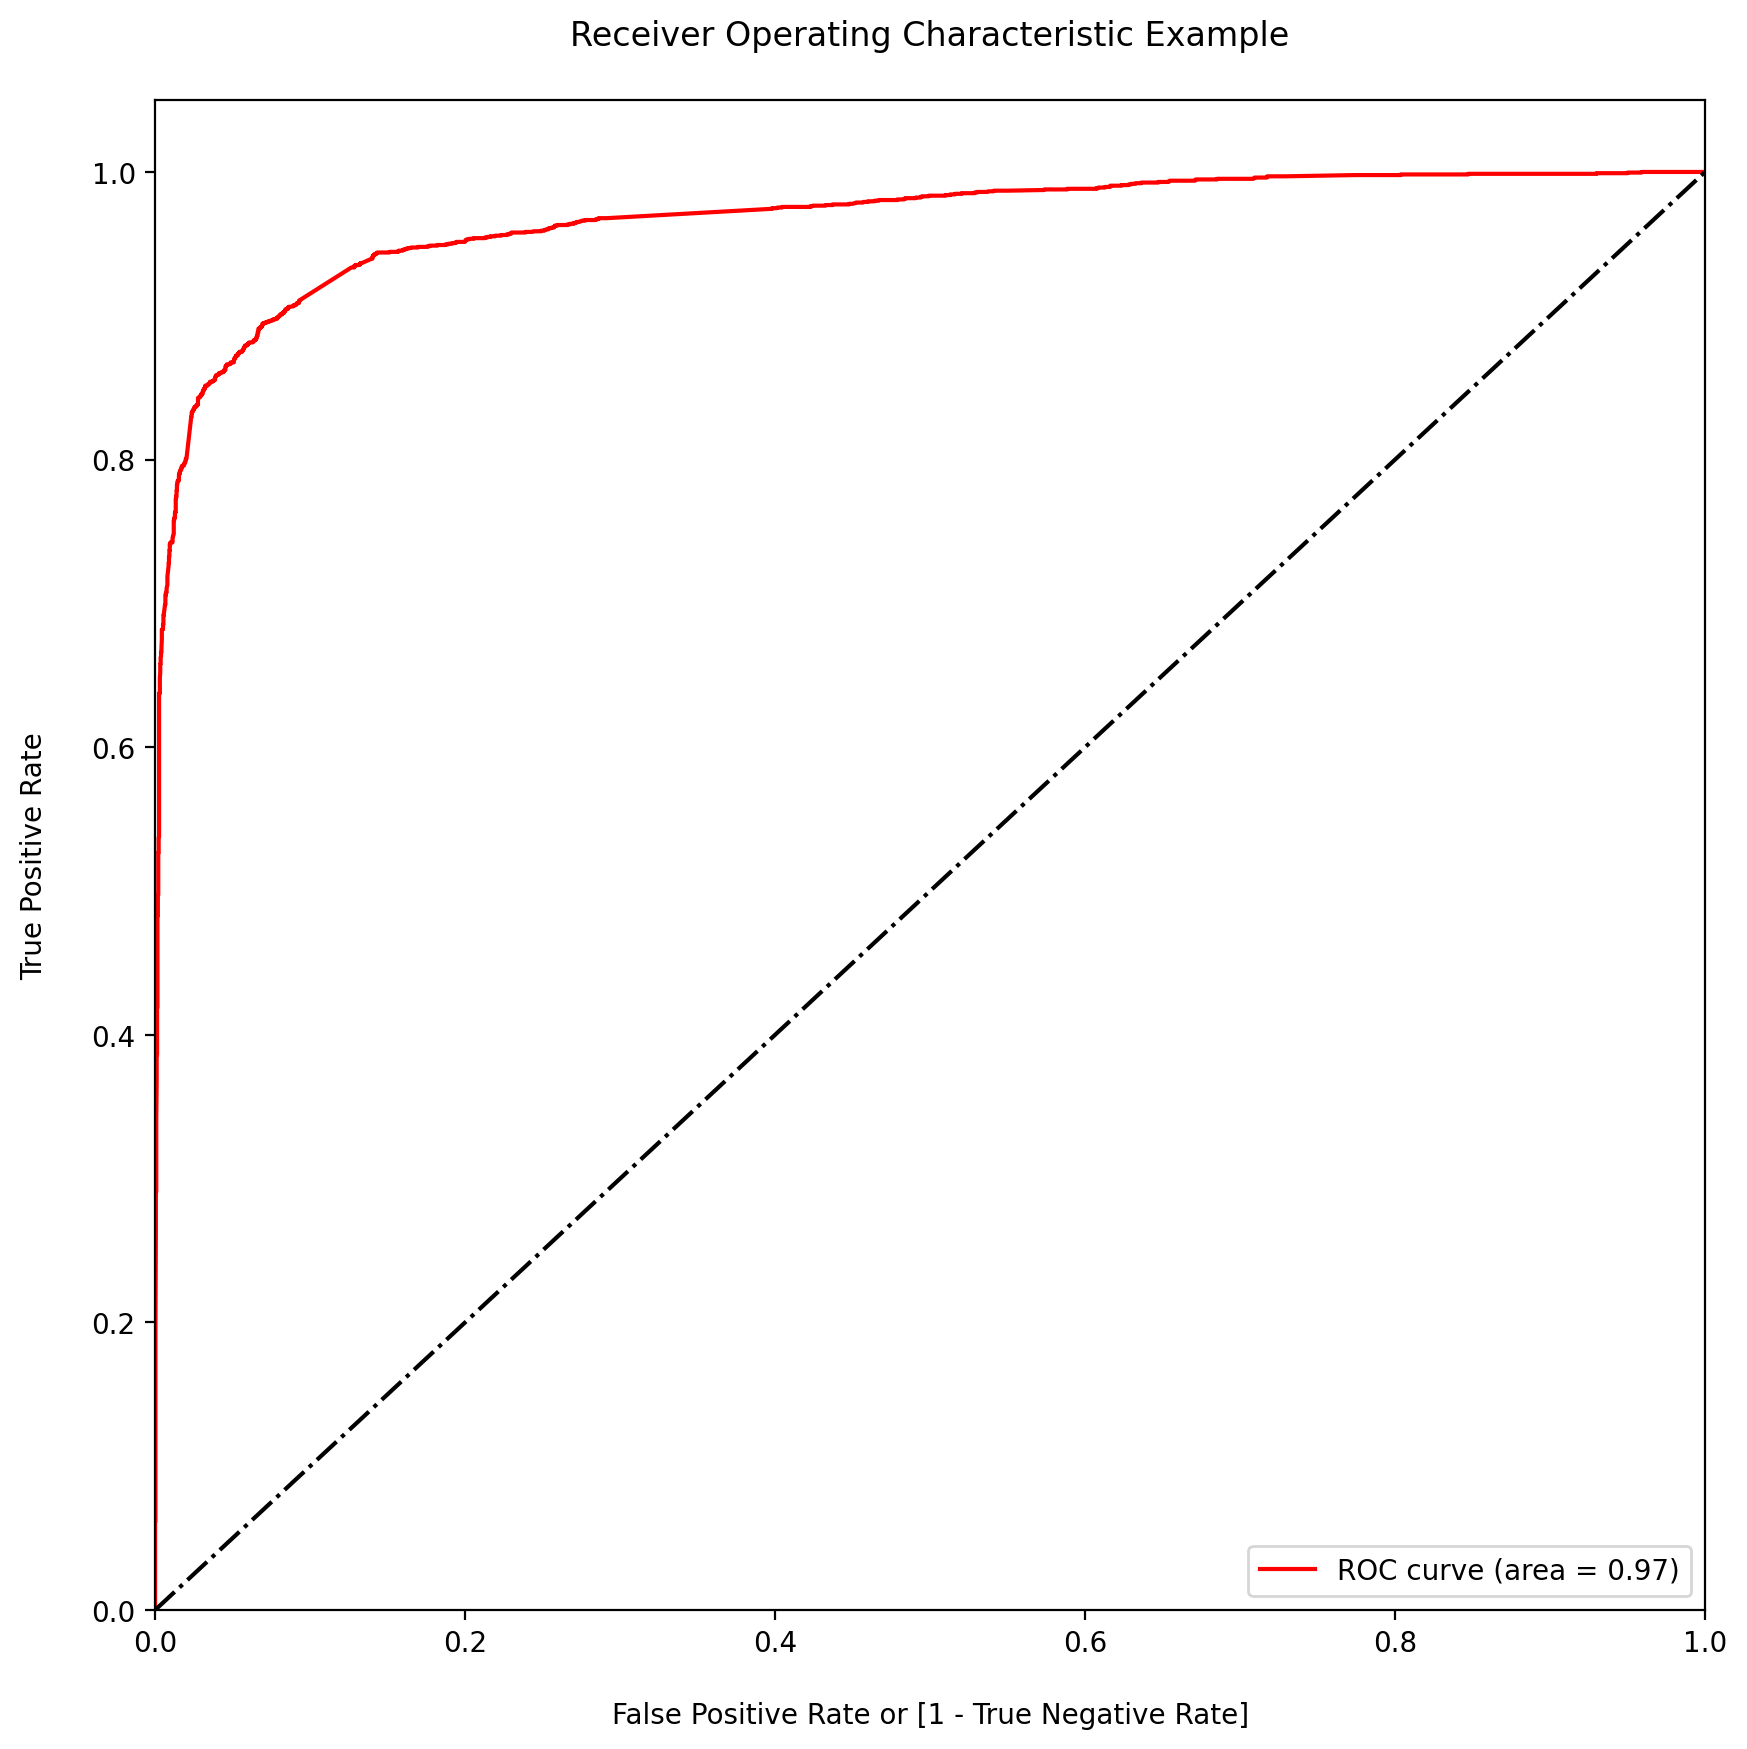

In [166]:
ROC_Curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)
plt.savefig('roc.svg',transparent=True,bbox_inches='tight')
plt.show()

#plotting ROC curve.

In [167]:
# Let's create columns with different probability cutoffs

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Lead ID  Converted  Converted_prob  predicted  0.0  0.1  0.2  0.3  0.4  \
0     5428          0        0.210713          0    1    1    1    0    0   
1     8583          1        0.993986          1    1    1    1    1    1   
2     4637          0        0.002842          0    1    0    0    0    0   
3     4468          0        0.131643          0    1    1    0    0    0   
4     2058          0        0.090803          0    1    0    0    0    0   

   0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0  
1    1    1    1    1    1  
2    0    0    0    0    0  
3    0    0    0    0    0  
4    0    0    0    0    0

In [168]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     Probability  Accuracy  Sensitivity  Specificity
0.0          0.0  0.371212     1.000000     0.000000
0.1          0.1  0.837685     0.957881     0.766726
0.2          0.2  0.894584     0.935302     0.870546
0.3          0.3  0.914249     0.897091     0.924378
0.4          0.4  0.917956     0.881025     0.939759
0.5          0.5  0.920858     0.861051     0.956165
0.6          0.6  0.923759     0.844116     0.970777
0.7          0.7  0.912798     0.798089     0.980518
0.8          0.8  0.904255     0.764655     0.986670
0.9          0.9  0.886041     0.704299     0.993335


<Figure size 3600x1800 with 0 Axes>

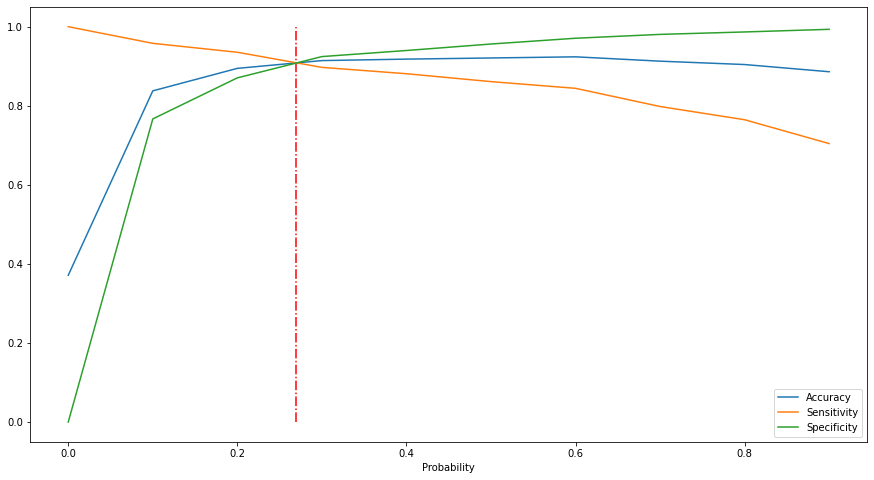

In [169]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

plt.figure(figsize=(12,6),dpi=300)
plt.rcParams["figure.figsize"] = (15,8) #Used rcParam to save file in high resolution.
cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'])
plt.vlines(x=0.269,ymax = 1.0,ymin=0.0,color='r',linestyle='-.')
plt.savefig('leadprobab.svg',transparent=True,bbox_inches='tight')
plt.show()

In [170]:
# From the curve above, 0.269 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.269 else 0)

y_train_pred_final.head()

Lead ID  Converted  Converted_prob  predicted  0.0  0.1  0.2  0.3  0.4  \
0     5428          0        0.210713          0    1    1    1    0    0   
1     8583          1        0.993986          1    1    1    1    1    1   
2     4637          0        0.002842          0    1    0    0    0    0   
3     4468          0        0.131643          0    1    1    0    0    0   
4     2058          0        0.090803          0    1    0    0    0    0   

   0.5  0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0    0                0  
1    1    1    1    1    1                1  
2    0    0    0    0    0                0  
3    0    0    0    0    0                0  
4    0    0    0    0    0                0

In [171]:
#Assigning Lead Score

y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

Lead ID  Converted  Converted_prob  predicted  0.0  0.1  0.2  0.3  0.4  \
0     5428          0        0.210713          0    1    1    1    0    0   
1     8583          1        0.993986          1    1    1    1    1    1   
2     4637          0        0.002842          0    1    0    0    0    0   
3     4468          0        0.131643          0    1    1    0    0    0   
4     2058          0        0.090803          0    1    0    0    0    0   

   0.5  0.6  0.7  0.8  0.9  final_predicted  Lead_Score  
0    0    0    0    0    0                0          21  
1    1    1    1    1    1                1          99  
2    0    0    0    0    0                0           0  
3    0    0    0    0    0                0          13  
4    0    0    0    0    0                0           9

In [172]:
# Let's check the overall accuracy.

print(round(accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted),5)*100,'%')

# Overall Accuracy Is 91.264%

91.264 %


In [173]:
confusion2 = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

#Checking Confusion Matrix For Test Data.

array([[3590,  311],
       [ 231, 2072]], dtype=int64)

In [174]:
metrics_other(confusion2)

#Checking matrix of Test data

Sensitivity:                                                                        89.97 %
Specificity:                                                                        92.028 %
False postive rate - predicting the lead conversion when the lead does not convert: 7.972 %
Positive predictive value:                                                          86.949 %
Negative predictive value:                                                          93.954 %


In [175]:
#classification report

print(classification_report(y_train_pred_final.Converted, y_train_pred_final.final_predicted ))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      3901
           1       0.87      0.90      0.88      2303

    accuracy                           0.91      6204
   macro avg       0.90      0.91      0.91      6204
weighted avg       0.91      0.91      0.91      6204



### `Summary`

#### Accuracy = 91%
#### Precision = 87%
#### Recall = 90%
#### F1-score = 88%

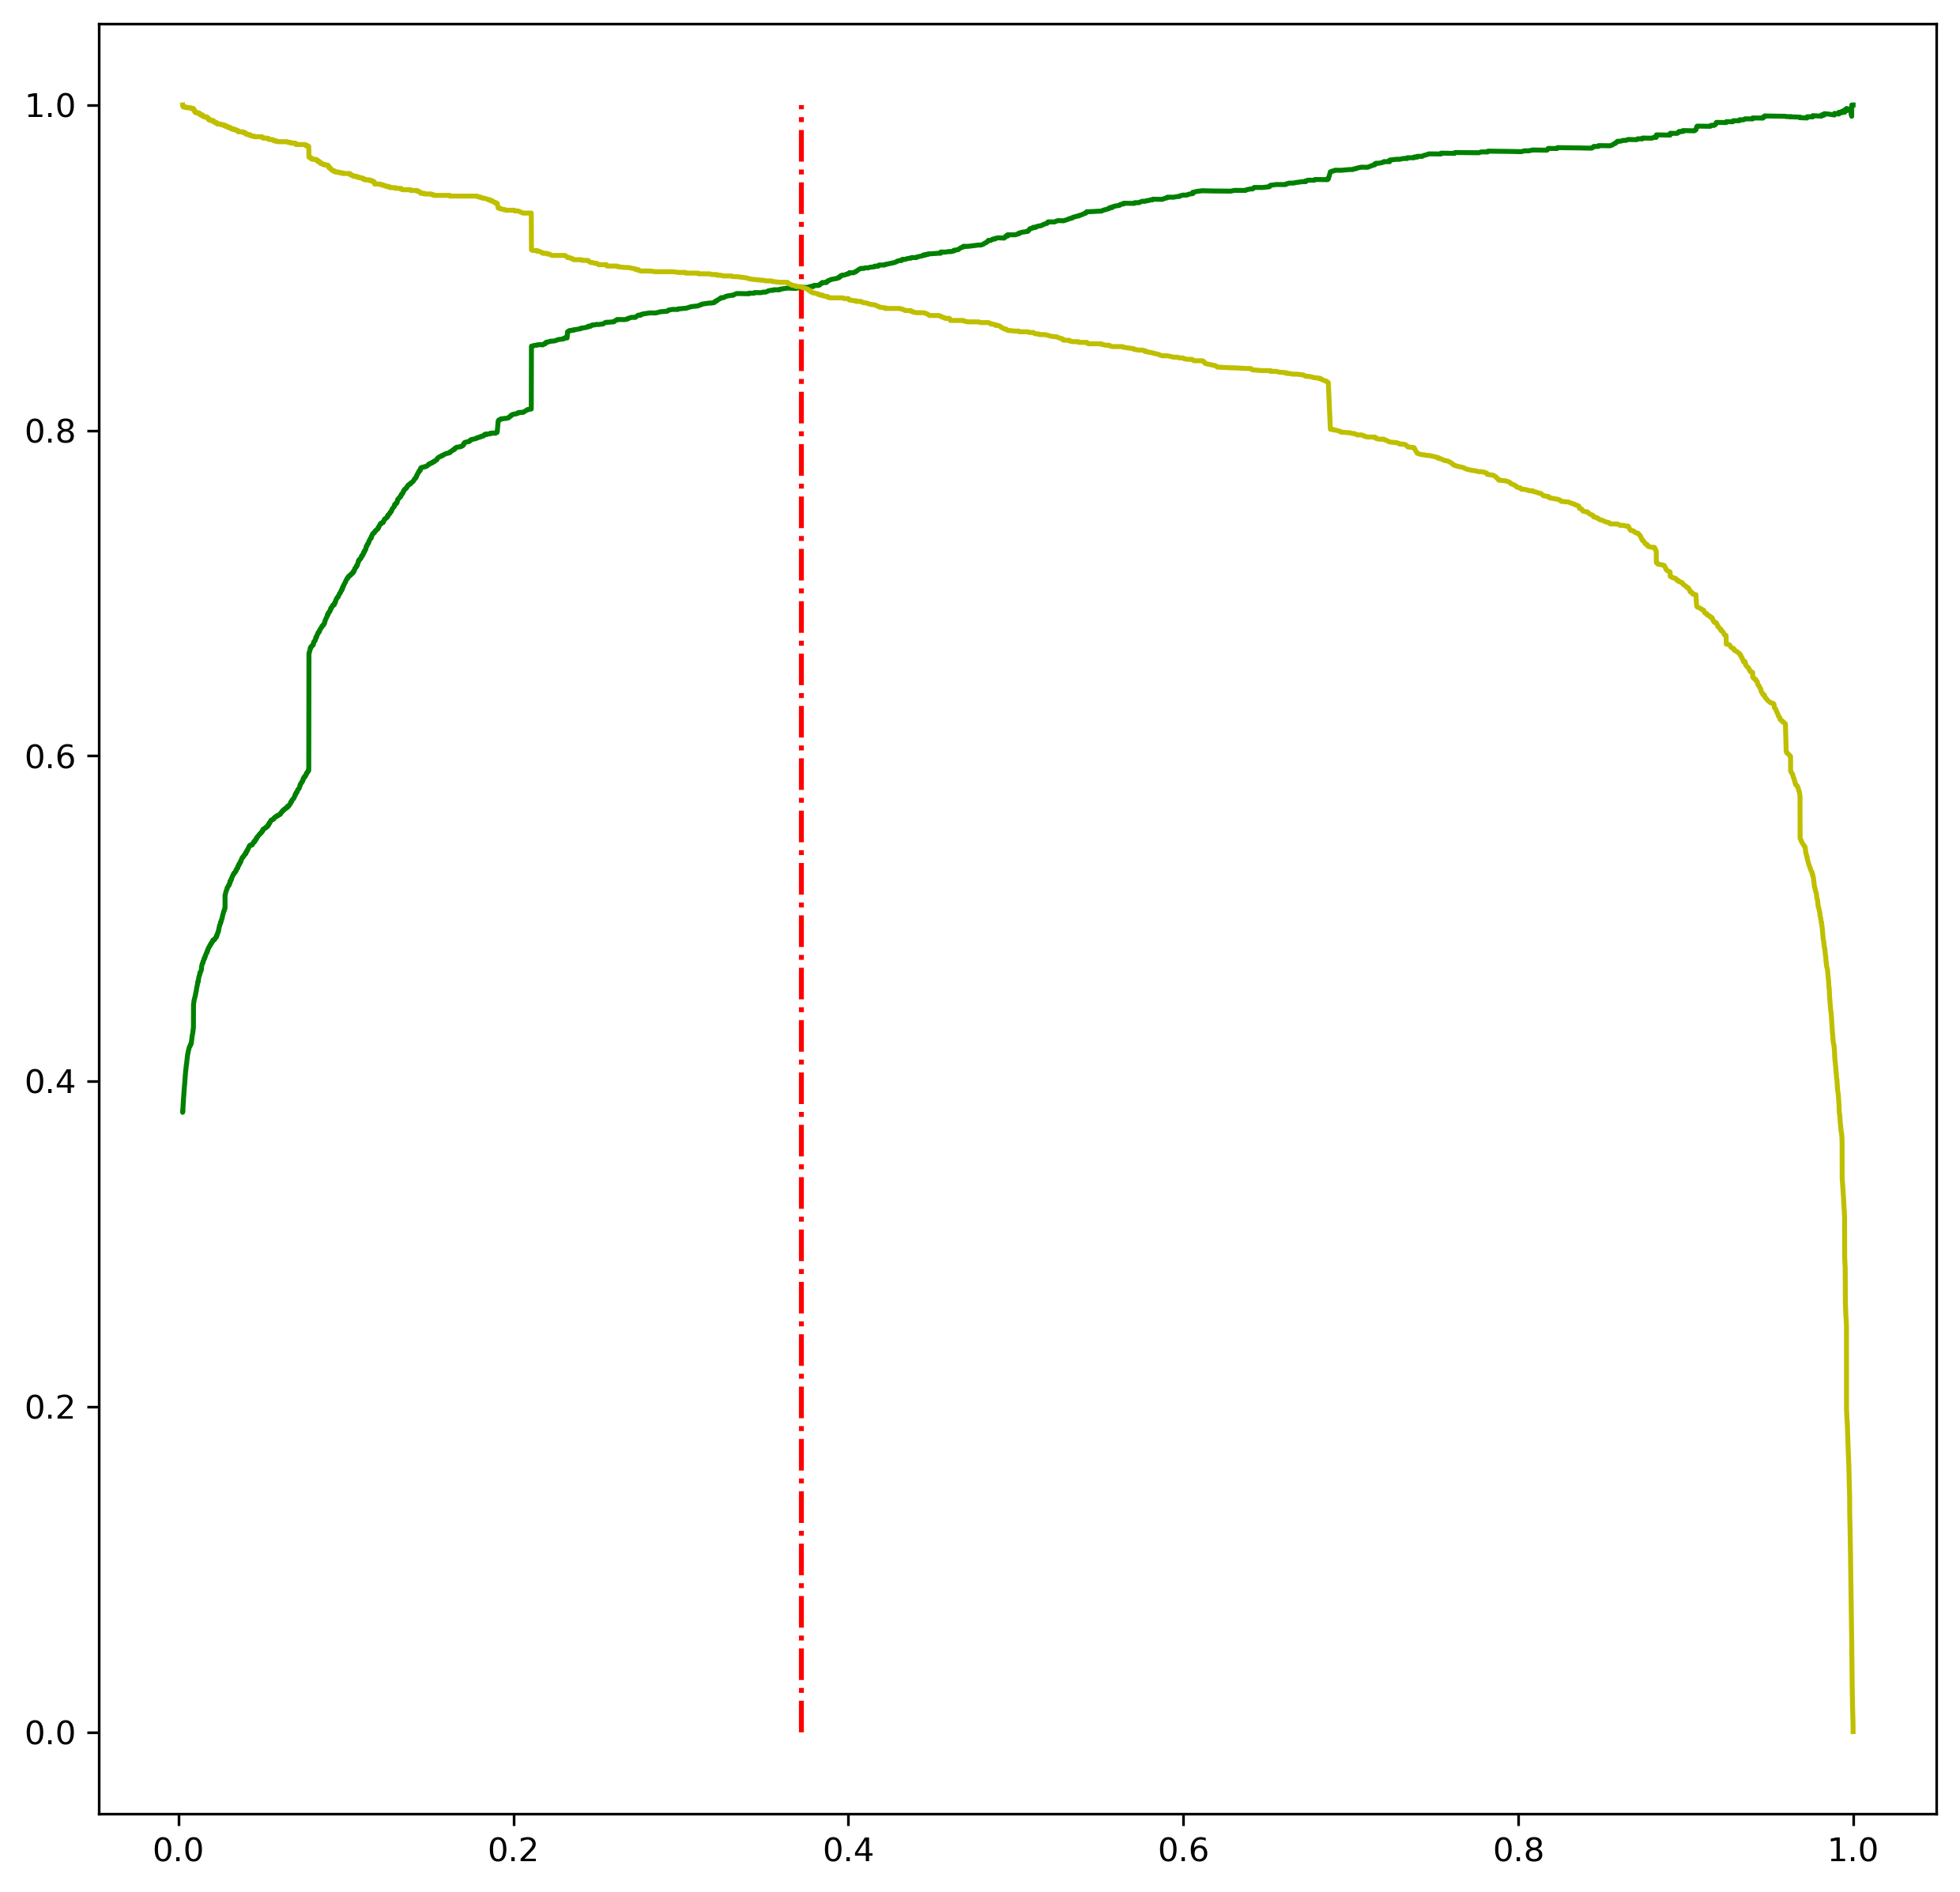

In [176]:
## precision or recall tradeoff

p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)
plt.figure(figsize = (10,10),dpi=300)
plt.plot(thresholds, p[:-1], "g")
plt.plot(thresholds, r[:-1], "y")
plt.vlines(x=0.372,ymax = 1.0,ymin=0.0,color='r',linestyle='-.')
plt.savefig('recall.svg',transparent=True,bbox_inches='tight')
plt.show()

### Making Prediction On The Test Set

In [177]:
#Making predictions on the test set

X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_test.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
8786             0    -1.071483                    -0.871984   
7813             0    -0.043681                    -0.375183   
2405             0     1.326721                     0.121618   
7246             0    -0.043681                    -0.508937   
5366             0     0.984121                     0.515238   

      Page Views Per Visit  A free copy of Mastering The Interview  \
8786             -1.184151                                       0   
7813              0.390849                                       0   
2405              0.653349                                       0   
7246              0.390849                                       0   
5366             -0.134151                                       1   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
8786                                    0                          1   
7813                                    1                          0   
2405                                    1                          0   
7246                                    0                          0   
5366                                    1                          0   

      Lead Origin_Lead Import  Lead Source_Google  Lead Source_Olark Chat  \
8786                        0                   0                       0   
7813                        0                   1                       0   
2405                        0                   1                       0   
7246                        0                   0                       1   
5366                        0                   1                       0   

      Lead Source_Organic Search  Lead Source_Others  Lead Source_Reference  \
8786                           0                   0                      0   
7813                           0                   0                      0   
2405                           0                   0                      0   
7246                           0                   0                      0   
5366                           0                   0                      0   

      Lead Source_Referral Sites  Lead Source_Social Media  \
8786                           0                         0   
7813                           0                         0   
2405                           0                         0   
7246                           0                         0   
5366                           0                         0   

      Lead Source_Welingak Website  Last Activity_Email Bounced  \
8786                             1                            0   
7813                             0                            0   
2405                             0                            0   
7246                             0                            0   
5366                             0                            0   

      Last Activity_Email Link Clicked  Last Activity_Email Opened  \
8786                                 1                           0   
7813                                 0                           0   
2405                                 0                           0   
7246                                 0                           0   
5366                                 0                           1   

      Last Activity_Form Submitted on Website  \
8786                                        0   
7813                                        1   
2405                                        0   
7246                                        0   
5366                                        0   

      Last Activity_Olark Chat Conversation  \
8786                                      0   
7813                                      0   
2405                                      0   
7246                                      1   
5366                                      0   

      Last Activity_Page Visited on Website  Last Acti

In [178]:
X_test = X_test[col]
X_test.head()

#Checking Data oF Some Specific Columns

Total Time Spent on Website  Lead Origin_Lead Add Form  \
8786                    -0.871984                          1   
7813                    -0.375183                          0   
2405                     0.121618                          0   
7246                    -0.508937                          0   
5366                     0.515238                          0   

      Lead Source_Olark Chat  Lead Source_Welingak Website  \
8786                       0                             1   
7813                       0                             0   
2405                       0                             0   
7246                       1                             0   
5366                       0                             0   

      Last Activity_Email Bounced  Tags_Closed by Horizzon  Tags_Lost  \
8786                            0                        0          0   
7813                            0                        0          0   
2405                            0                        0          0   
7246                            0                        0          0   
5366                            0                        0          0   

      Tags_No phone number  Tags_Others  \
8786                     0            1   
7813                     0            0   
2405                     0            0   
7246                     0            1   
5366                     0            0   

      Tags_Will revert after reading the email  \
8786                                         0   
7813                                         0   
2405                                         1   
7246                                         0   
5366                                         0   

      Last Notable Activity_Email Opened  Last Notable Activity_Other  \
8786                                   0                            0   
7813                                   0                            0   
2405                                   0                            0   
7246                                   0                            0   
5366                                   0                            0   

      Last Notable Activity_SMS Sent  
8786                               0  
7813                               0  
2405                               1  
7246                               0  
5366                               0

In [179]:
#Adding constant

X_test_sm = sm.add_constant(X_test)

In [180]:
#Making Predicition on test set

y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

8786    0.890726
7813    0.004245
2405    0.993738
7246    0.111888
5366    0.011256
3924    0.077837
3349    0.012815
916     0.011053
7732    0.078416
1703    0.072819
dtype: float64

In [181]:
# Converting y_pred to a dataframe

y_pred_df = pd.DataFrame(y_test_pred)

In [182]:
# Let's see the head

y_pred_df.head()

0
8786  0.890726
7813  0.004245
2405  0.993738
7246  0.111888
5366  0.011256

In [183]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting CustID to index
y_test_df['Lead ID'] = y_test_df.index

In [184]:
# Removing index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [185]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
y_pred_final.head()

Converted  Lead ID         0
0          1     8786  0.890726
1          0     7813  0.004245
2          1     2405  0.993738
3          0     7246  0.111888
4          0     5366  0.011256

In [186]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [187]:
# Let's see the head of y_pred_final
y_pred_final.head()

Converted  Lead ID  Converted_prob
0          1     8786        0.890726
1          0     7813        0.004245
2          1     2405        0.993738
3          0     7246        0.111888
4          0     5366        0.011256

In [188]:
# Creating new column "Lead Score" with 1to100 using conversion rates
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))
# Let's see the head
y_pred_final.head()

Converted  Lead ID  Converted_prob  Lead_Score
0          1     8786        0.890726          89
1          0     7813        0.004245           0
2          1     2405        0.993738          99
3          0     7246        0.111888          11
4          0     5366        0.011256           1

In [189]:
#Taking 0.37 as the cutoff using precision recall tradeoff
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.37 else 0)

In [190]:
y_pred_final.head()

Converted  Lead ID  Converted_prob  Lead_Score  final_predicted
0          1     8786        0.890726          89                1
1          0     7813        0.004245           0                0
2          1     2405        0.993738          99                1
3          0     7246        0.111888          11                0
4          0     5366        0.011256           1                0

In [191]:
# Let's check the overall accuracy.

print(f"Model Accuracy on Test data is {round((accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))*100,2)} %")

Model Accuracy on Test data is 92.25 %


In [192]:
confusion2 = confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1533,   94],
       [ 112,  920]], dtype=int64)

In [193]:
metrics_other(confusion2)

Sensitivity:                                                                        89.147 %
Specificity:                                                                        94.222 %
False postive rate - predicting the lead conversion when the lead does not convert: 5.778 %
Positive predictive value:                                                          90.73 %
Negative predictive value:                                                          93.191 %


In [194]:
#classification report
print(classification_report(y_pred_final.Converted, y_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      1627
           1       0.91      0.89      0.90      1032

    accuracy                           0.92      2659
   macro avg       0.92      0.92      0.92      2659
weighted avg       0.92      0.92      0.92      2659



In [195]:
# To select test set
leads_test_pred = y_pred_final.copy()
leads_test_pred.head()

Converted  Lead ID  Converted_prob  Lead_Score  final_predicted
0          1     8786        0.890726          89                1
1          0     7813        0.004245           0                0
2          1     2405        0.993738          99                1
3          0     7246        0.111888          11                0
4          0     5366        0.011256           1                0

In [196]:
# To select train set
leads_train_pred = y_train_pred_final.copy()
leads_train_pred.head()

Lead ID  Converted  Converted_prob  predicted  0.0  0.1  0.2  0.3  0.4  \
0     5428          0        0.210713          0    1    1    1    0    0   
1     8583          1        0.993986          1    1    1    1    1    1   
2     4637          0        0.002842          0    1    0    0    0    0   
3     4468          0        0.131643          0    1    1    0    0    0   
4     2058          0        0.090803          0    1    0    0    0    0   

   0.5  0.6  0.7  0.8  0.9  final_predicted  Lead_Score  
0    0    0    0    0    0                0          21  
1    1    1    1    1    1                1          99  
2    0    0    0    0    0                0           0  
3    0    0    0    0    0                0          13  
4    0    0    0    0    0                0           9

In [197]:
# To drop unnecessary columns from train set
leads_train_pred = leads_train_pred[['Lead ID','Converted','Converted_prob','final_predicted']]
leads_train_pred.head()

Lead ID  Converted  Converted_prob  final_predicted
0     5428          0        0.210713                0
1     8583          1        0.993986                1
2     4637          0        0.002842                0
3     4468          0        0.131643                0
4     2058          0        0.090803                0

In [198]:
# To concatenate 2 datasets
lead_full_pred = leads_train_pred.append(leads_test_pred)
lead_full_pred.head()

Lead ID  Converted  Converted_prob  final_predicted  Lead_Score
0     5428          0        0.210713                0         NaN
1     8583          1        0.993986                1         NaN
2     4637          0        0.002842                0         NaN
3     4468          0        0.131643                0         NaN
4     2058          0        0.090803                0         NaN

In [199]:
# To inspect the shape of the final dataset
print(leads_train_pred.shape)
print(leads_test_pred.shape)
print(lead_full_pred.shape)

(6204, 4)
(2659, 5)
(8863, 5)


In [200]:
# To ensure uniqueness of Lead IDs
len(lead_full_pred['Lead ID'].unique().tolist())

8863

In [201]:
# To calculate the Lead Score
lead_full_pred['Lead_Score'] = lead_full_pred['Converted_prob'].apply(lambda x : round(x*100))
lead_full_pred.head()

Lead ID  Converted  Converted_prob  final_predicted  Lead_Score
0     5428          0        0.210713                0          21
1     8583          1        0.993986                1          99
2     4637          0        0.002842                0           0
3     4468          0        0.131643                0          13
4     2058          0        0.090803                0           9

In [202]:
# To make the Lead ID column as index
lead_full_pred = lead_full_pred.set_index('Lead ID').sort_index(axis = 0, ascending = True)
lead_full_pred.head()

Converted  Converted_prob  final_predicted  Lead_Score
Lead ID                                                        
0                0        0.008975                0           1
1                0        0.031261                0           3
2                1        0.993910                1          99
3                0        0.004665                0           0
4                1        0.976440                1          98

In [203]:
# To get Lead Number column from original data
leads_original = leads_df[['Lead Number']]
leads_original.head()

Lead Number
0       660737
1       660728
2       660727
3       660719
4       660681

In [204]:
# To concatenate the 2 dataframes based on index
leads_with_score = pd.concat([leads_original, lead_full_pred], axis=1)
leads_with_score.head()

Lead Number  Converted  Converted_prob  final_predicted  Lead_Score
0       660737          0        0.008975                0           1
1       660728          0        0.031261                0           3
2       660727          1        0.993910                1          99
3       660719          0        0.004665                0           0
4       660681          1        0.976440                1          98

## `Conclusion`

In [205]:
# Let us concatinate prediction made on test & train dataset.

cols1 = y_pred_final.columns
all_leads = pd.concat([y_train_pred_final[cols1],y_pred_final])

# Let us observe the behaviour of leads for various original attributes of the dataframe.

all_leads = pd.merge(all_leads,leads_df.reset_index(), left_on = 'Lead ID',right_on = 'index', how = 'left').drop(['Converted_y','index','Lead ID'],axis =1)
all_leads.rename(columns = {'Converted_x':'Converted'}, inplace = True)

# Changing the position of `Lead Number` column.

col_position = all_leads.columns.tolist()
col_position.insert(0, col_position.pop(col_position.index('Lead Number')))
all_leads = all_leads.reindex(columns = col_position)
all_leads.head()

Lead Number  Converted  Converted_prob  Lead_Score  final_predicted  \
0       608267          0        0.210713          21                0   
1       584274          1        0.993986          99                1   
2       615279          0        0.002842           0                0   
3       616756          0        0.131643          13                0   
4       639772          0        0.090803           9                0   

               Lead Origin     Lead Source Do Not Email  TotalVisits  \
0                      API      Olark Chat           No            0   
1  Landing Page Submission          Google           No            5   
2  Landing Page Submission  Direct Traffic           No            2   
3  Landing Page Submission  Direct Traffic           No            3   
4  Landing Page Submission  Direct Traffic           No            7   

   Total Time Spent on Website  Page Views Per Visit       Last Activity  \
0                            0                   0.0        Email Opened   
1                         1538                   2.5        Email Opened   
2                           69                   2.0  Email Link Clicked   
3                          349                   3.0        Email Opened   
4                          151                   1.4        Email Opened   

                      Specialization What is your current occupation  \
0                             Others                      Unemployed   
1                         Management                      Unemployed   
2                         Management                      Unemployed   
3                         Management                      Unemployed   
4  Banking, Investment And Insurance                      Unemployed   

                                  Tags               City  \
0                               Others             Mumbai   
1  Will revert after reading the email  Thane & Outskirts   
2                    Try Calling again             Mumbai   
3                               Others             Mumbai   
4                               Others             Mumbai   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No          Email Opened  
1                                     No          Email Opened  
2                                    Yes    Email Link Clicked  
3                                    Yes          Email Opened  
4                                     No          Email Opened

In [206]:
all_leads.shape #sanity check

(8863, 18)

#### Identifying Hot Leads with conversion rate more than 80% (Lead Score)

In [207]:
Hot_leads = all_leads.loc[all_leads['Lead_Score'] > 80,:].sort_values(by = 'Lead_Score', ascending = False)
Hot_leads.head()

Lead Number  Converted  Converted_prob  Lead_Score  final_predicted  \
4354       595167          1        0.998730         100                1   
2215       630828          1        0.996025         100                1   
2223       623455          1        0.996587         100                1   
2232       601680          1        0.997913         100                1   
2234       598202          1        0.998827         100                1   

                  Lead Origin     Lead Source Do Not Email  TotalVisits  \
4354                      API      Olark Chat           No            2   
2215            Lead Add Form       Reference           No            0   
2223  Landing Page Submission  Direct Traffic           No            3   
2232            Lead Add Form       Reference           No            0   
2234  Landing Page Submission  Direct Traffic           No            6   

      Total Time Spent on Website  Page Views Per Visit Last Activity  \
4354                          662                   1.0      SMS Sent   
2215                            0                   0.0      SMS Sent   
2223                         1049                   3.0        others   
2232                            0                   0.0  Email Opened   
2234                         1317                   6.0      SMS Sent   

     Specialization What is your current occupation  \
4354     Management                      Unemployed   
2215         Others                      Unemployed   
2223     Management                      Unemployed   
2232         Others                      Unemployed   
2234     Management                      Unemployed   

                                     Tags          City  \
4354  Will revert after reading the email        Mumbai   
2215  Will revert after reading the email        Mumbai   
2223                   Closed by Horizzon  Other Cities   
2232                   Closed by Horizzon        Mumbai   
2234  Will revert after reading the email        Mumbai   

     A free copy of Mastering The Interview Last Notable Activity  
4354                                     No              SMS Sent  
2215                                     No              SMS Sent  
2223                                    Yes              Modified  
2232                                     No          Email Opened  
2234                                     No              SMS Sent

In [208]:
Hot_leads.shape #checking shape

(2636, 18)

In [209]:
# To display features with corrsponding coefficients in final model

pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

Total Time Spent on Website                 1.10
Lead Origin_Lead Add Form                   1.55
Lead Source_Olark Chat                      1.30
Lead Source_Welingak Website                4.32
Last Activity_Email Bounced                -1.80
Tags_Closed by Horizzon                     9.47
Tags_Lost                                   7.20
Tags_No phone number                       -2.35
Tags_Others                                 2.23
Tags_Will revert after reading the email    6.72
Last Notable Activity_Email Opened          1.15
Last Notable Activity_Other                 1.47
Last Notable Activity_SMS Sent              3.26
dtype: float64

In [210]:
# Relative feature importance

feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Total Time Spent on Website                 11.65
Lead Origin_Lead Add Form                   16.39
Lead Source_Olark Chat                      13.74
Lead Source_Welingak Website                45.60
Last Activity_Email Bounced                -19.01
Tags_Closed by Horizzon                    100.00
Tags_Lost                                   76.06
Tags_No phone number                       -24.83
Tags_Others                                 23.57
Tags_Will revert after reading the email    70.95
Last Notable Activity_Email Opened          12.16
Last Notable Activity_Other                 15.52
Last Notable Activity_SMS Sent              34.38
dtype: float64

In [211]:
# To sort features based on importance

id_sorted = np.argsort(feature_importance,kind='quicksort',order='list of str')
id_sorted

Total Time Spent on Website                  7
Lead Origin_Lead Add Form                    4
Lead Source_Olark Chat                       0
Lead Source_Welingak Website                10
Last Activity_Email Bounced                  2
Tags_Closed by Horizzon                     11
Tags_Lost                                    1
Tags_No phone number                         8
Tags_Others                                 12
Tags_Will revert after reading the email     3
Last Notable Activity_Email Opened           9
Last Notable Activity_Other                  6
Last Notable Activity_SMS Sent               5
dtype: int64

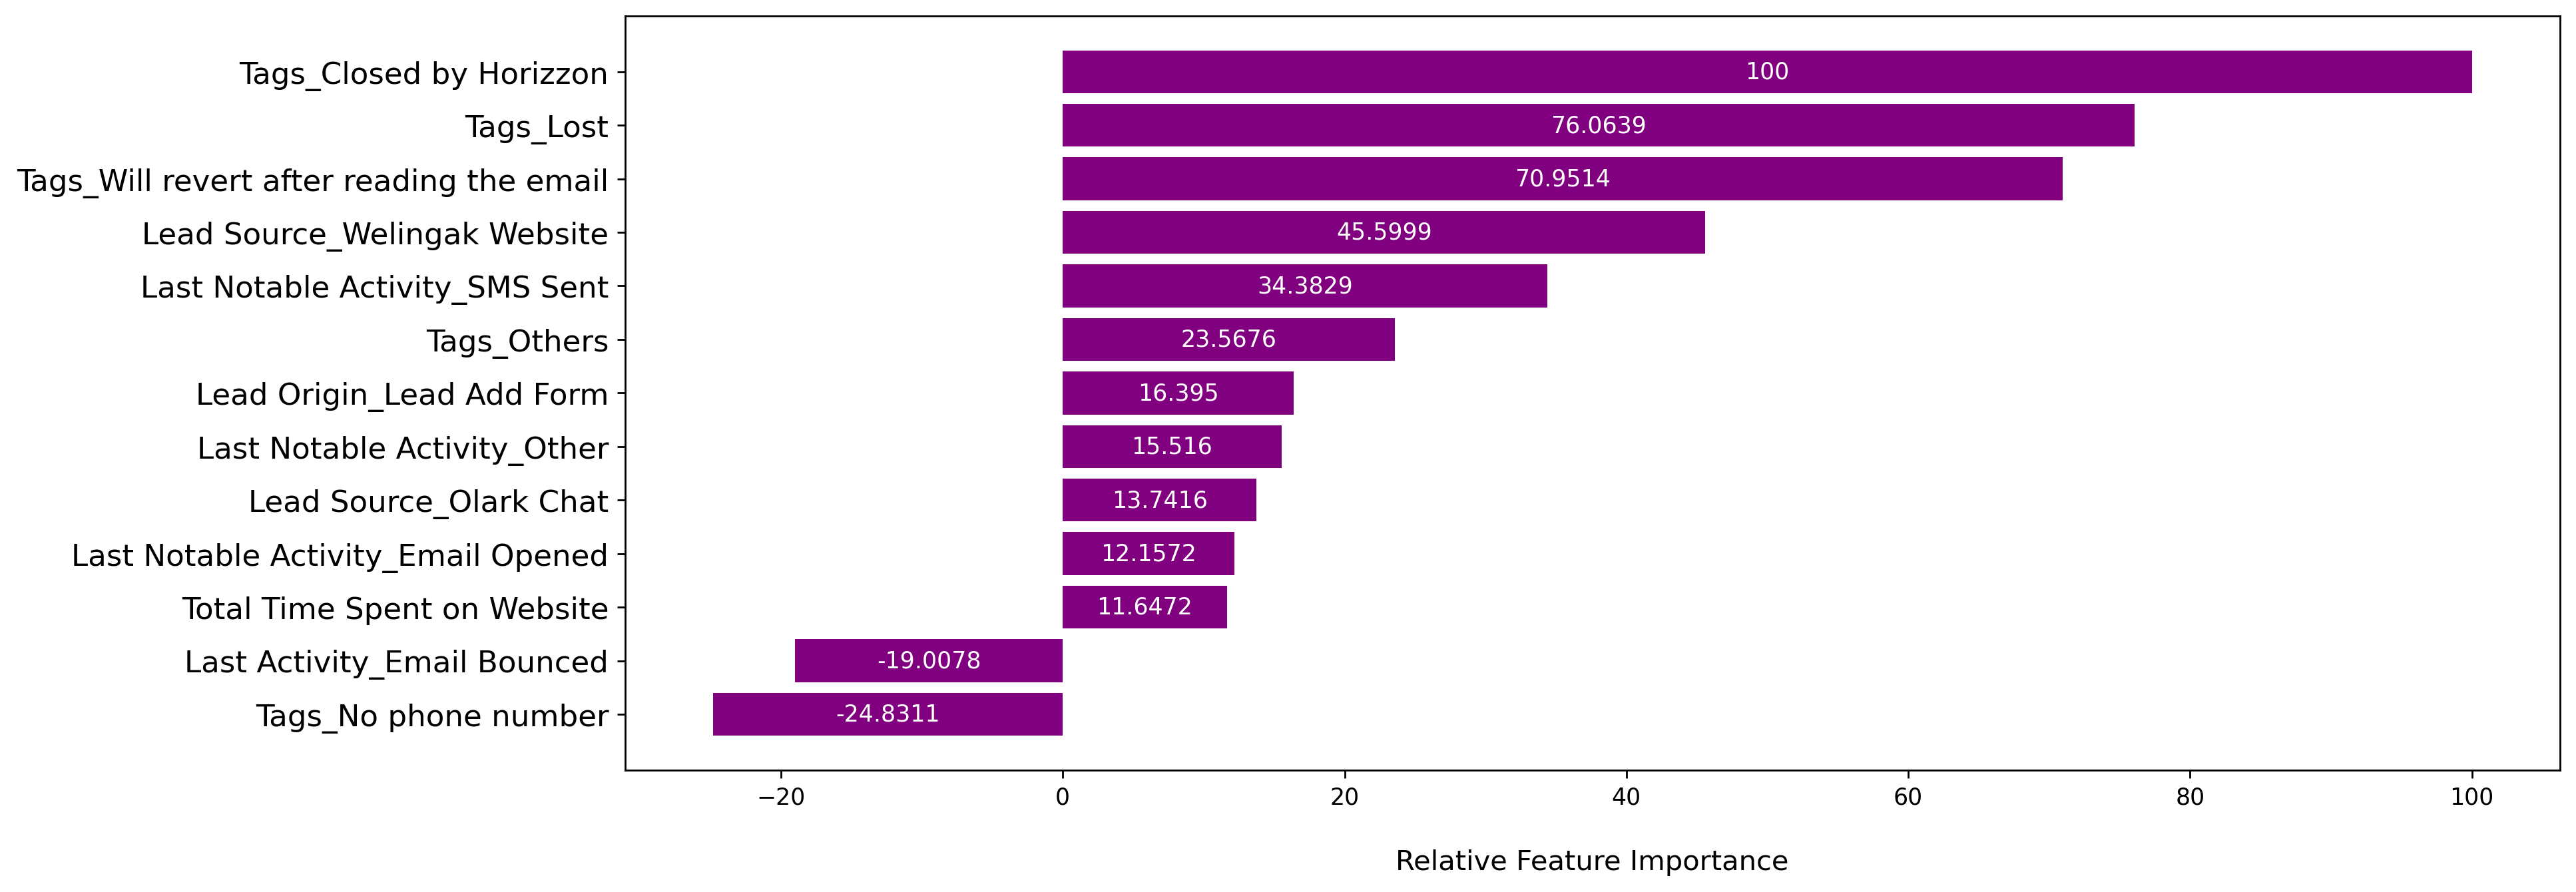

In [212]:
# To plot features with their relative importance

fig = plt.figure(figsize=(15,6),dpi=250)
ax = fig.add_subplot(1, 1, 1)
pos = np.arange(id_sorted.shape[0])
ax.barh(pos, feature_importance[id_sorted], color = 'purple')
for bars in ax.containers:
    ax.bar_label(bars,label_type='center',color='white')
ax.set_yticks(pos)
ax.set_yticklabels(np.array(X_train[col].columns)[id_sorted], fontsize=13)
ax.set_xlabel('\nRelative Feature Importance', fontsize=12) 
plt.savefig('top3vars.svg',transparent=True,bbox_inches='tight')
plt.show()

#### When the Company has `limited time and resources`, it should approach `Hot_leads` i.e. those leads who have more than 80% of conversion chances to achieve maximum conversion & to avoid useless phone calls.
#### When the company has `ample amount of resources and time` in its hand, then it should approach all the `Potential Leads`. But since it has sufficient time in its hand, it should also focus on customers who have lesser conversion rate to improve the overall conversion rate of the leads.